# House Price Analysis in King County, Washington

![king_county_.jpg](images/king_county_.jpg)

**Author**: Jordana Tepper

**Pace**: Live NYC

**Instructor**: Joseph Mata

## Overview

This project analyzes existing data about house sales in King County, Washington, from 2014 - 2015 in order to develop a predictive model that can aid a stakeholder in determining what zip code they should buy a house in based on their budget and preferences for their new home. The dataset used in this project includes information about various aspects of a home, such as the number of bedrooms, zip code, and square footage. After utilizing the process of exploratory data analysis, I create several linear regression models to eventually reach the model with the lowest error. Finally, I present the stakeholder with three zip codes and the respective predicted prices - all of which fall within the given budget - using the criteria they provided.

## Business Problem

An elderly couple, Bruce and Carol, are from King County, Washington, and want to downsize from their current home as there is no need for them to deal with the maintenance of a large house anymore. Nevertheless, in the past few years, Bruce and Carol have become grandparents and want a home with enough room for their two grandchildren to sleep over and play outside. Bruce and Carol have a set criteria for what they want in a house but do not know where in King County they should look to fulfill such preferences.

Therefore, the goal of this project is to build a predictive model based on existing data from house sales in King County, Washington, that can answer the following question: **In which zip code should the stakeholders purchase their home based on the criteria listed?**

## Data Understanding

The data that I use for my projects comes from a dataset from Kaggle about King County, Washington House Sales in 2014-2015. This source includes information such as square footage, number of bedrooms, number of bathrooms, zip code, number of floors, condition of the house, and quality of the view.

### Imports

In [1]:
# Importing necessary packages

# Basic imports
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Data visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import Image

# Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, PolynomialFeatures, MinMaxScaler

#Modeling
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Loading in data

In [2]:
# Loading in data from kc_house_data file, which includes information about King County House Sales

kc_house_df = pd.read_csv('data/kc_house_data.csv')
kc_house_df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0          5650     1.0        NaN  NONE  ...      7 Average       1180   
1          7242     2.0         NO  NONE  ...      7 Average       2170   
2         10000     1.0         NO  NONE  ...  6 Low Average        770   
3          5000     1.0         NO  NONE  ...      7 Average       1050   
4          8080     1.0         NO  NONE  ...         8 Good       1680   
...         ...     ...        ...   ...  ...            ...        ...   
21592      1131     3.0         NO  NONE  ...         8 Good       1530   
21593      5813     2.0         NO  NONE  ...         8 Good       2310   
21594      1350     2.0         NO  NONE  ...      7 Average       1020   
21595      2388     2.0        NaN  NONE  ...         8 Good       1600   
21596      1076     2.0         NO  NONE  ...      7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

### Using .info()

In [3]:
# Looking at the general structure and content of kc_house_df

kc_house_df.info()

# 21 columns and 21597 rows with missing values in 'waterfront', 'view', and 'yr_renovated'

# Datatypes in this DataFrame are int, object, and float

# For the columns with missing values, I will look at what percentage of the column this missing-ness accounts for
# After doing so, I will decide how to deal with the missing data

# 'date' is listed as type object, which is likely due to the way that the dates are formatted, 
# but I will further analyze this column to confirm

# It is also interesting that 'sqft_basement' is type object, so I will further explore this column.

# 'zipcode' is of type int, but I know that a zipcode represents a given area and is actually a categorical variable. 
# Therefore, after I Train-Test Split, I will use OneHotEncoder to create dummy variables for this column.
# Doing so will allow me to use 'zipcode' in my model despite it being a categorical variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Looking at missing values

In [4]:
# Looking at what percent of the data in 'waterfront' is missing
kc_house_df['waterfront'].isnull().sum()/len(kc_house_df['waterfront'])

# Dropping 11% of the data is a lot, so I will use the 'view' column in our Data Preparation to minimize the number
# of entries that I drop.

# The column 'view' refers to the quality of the view from the house.
# More specifically, if the house has a view of a body of water, 
# the 'view' column will have a value that indicates a quality other than 'NONE' ('NONE' signifies no view)

# Therefore, if an entry has a value of 'NONE' in 'view',
# I can assume that the value for 'waterfront' should be 'NO'

0.11001527989998611

In [5]:
# Looking at what percent of the data in 'view' is missing
kc_house_df['view'].isnull().sum()/len(kc_house_df['view'])

# Dropping 0.3% of the data will not make an impact on the rest of the data, so I will go ahead and drop the missing
# values from the 'view' column during my Data Preparation

0.0029170718155299346

In [6]:
# Looking at what percent of the data in 'yr_renovated' is missing
kc_house_df['yr_renovated'].isnull().sum()/len(kc_house_df['yr_renovated'])

# Dropping 17.8% of the data is a lot, but there is no other column that can provide me with this missing information,
# and I don't want to assume that missing data means that a house was not renovated.

# (Using 'yr_built' to fill in the missing data in 'yr_renovated' would be based upon the assumption that a missing
# entry means that the house was not renovated)

# Therefore, in conclusion, I'd rather have less (but still a good amount) data that is of higher accuracy 
# than slightly more data that is potentially wrong, so I will drop the missing values from 'yr_renovated' during
# my Data Preparation

0.17789507802009538

### Exploring the DataTypes of specific columns

In [7]:
# Exploring the 'date' column Datatype
print(kc_house_df['date'])
print('\n')
print("A single entry in column 'date' is of'", type(kc_house_df['date'][0]))

# This shows me that the entries in the 'date' column are strings, so during my Data Preparation, 
# I will clean up this column by splitting it into a month column and a year column

# After this, I will also confirm that this data is about houses sold in the years 2014 - 2015

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object


A single entry in column 'date' is of' <class 'str'>


In [8]:
# 'sqft_basement' is listed as an object, so I will look at the different values in the 'sqft_basement' column
print('Value Counts')
print(kc_house_df['sqft_basement'].value_counts())
print('\n')

print('Value Counts in Percentages')
print(kc_house_df['sqft_basement'].value_counts(normalize = True))

# I see that there are 454 entries in this column with the value '?' 
# This indicates that there is a placeholder in the 'sqft_basement' column to signify missing values

# Furthermore, when looking at the value counts as percentages, I can see that the '?' placeholders take up only 2.1%
# of the data, so during my data cleaning, it seems safe to drop these rows.

# After I drop these rows, I will convert the rest of the data from this column to floats

Value Counts
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
915.0         1
2350.0        1
283.0         1
243.0         1
792.0         1
Name: sqft_basement, Length: 304, dtype: int64


Value Counts in Percentages
0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
915.0     0.000046
2350.0    0.000046
283.0     0.000046
243.0     0.000046
792.0     0.000046
Name: sqft_basement, Length: 304, dtype: float64


### Using .describe() on the numerical columns

In [9]:
# Deactivating scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Looking at the descriptive statistics for the numerical columns 
# (not including 'sqft_basement' because I haven't dropped the '?' placeholders or changed the other values to floats)

kc_house_df.describe()

# I see that many columns have outliers:
#  - 'price' has outliers for both the min ($78,000) and max ($7,700,000)

#  - 'bedrooms' has a max outlier (33) which I will probably remove during my Data Preparation

#  - 'bathrooms' has a max outlier (8)

#  - 'sqft_living' has outliers for both the min (370) and max (13,540)

#  - 'sqft_lot' has outliers for both the min (520) and max (1,651,359)

#  - 'sqft_above' has outliers for both the min (370) and max (9,410)

#  - Something interesting about 'yr_renovated' is that the max is 2015 
#    but the min and 25%, 50%, and 75% quartiles are 0.
#    This likely indicates that a value of 0 means that the house has not been renovated, 
#    but I will do further analysis of this.

#  - 'sqft_living15' - which is the square footage of interior housing living space for the nearest 15 neighbors -
#    has outliers for both the min (399) and max (6,210)

#  - 'sqft_lot15' - which is the square footage of the land lots of the nearest 15 neighbors -
#    has outliers for both the min (651) and max (871,200)

# After I clean the 'sqft_basement' column in my Data Preparation, I will repeat the .describe() step

# Furthermore, this information shows me that I will eventually need to use StandardScaler 
# because the values in different columns are not of the same magnitude

id         price    bedrooms   bathrooms  sqft_living  \
count      21597.00000   21597.00000 21597.00000 21597.00000  21597.00000   
mean  4580474287.77099  540296.57351     3.37320     2.11583   2080.32185   
std   2876735715.74778  367368.14010     0.92630     0.76898    918.10613   
min      1000102.00000   78000.00000     1.00000     0.50000    370.00000   
25%   2123049175.00000  322000.00000     3.00000     1.75000   1430.00000   
50%   3904930410.00000  450000.00000     3.00000     2.25000   1910.00000   
75%   7308900490.00000  645000.00000     4.00000     2.50000   2550.00000   
max   9900000190.00000 7700000.00000    33.00000     8.00000  13540.00000   

           sqft_lot      floors  sqft_above    yr_built  yr_renovated  \
count   21597.00000 21597.00000 21597.00000 21597.00000   17755.00000   
mean    15099.40876     1.49410  1788.59684  1970.99968      83.63678   
std     41412.63688     0.53968   827.75976    29.37523     399.94641   
min       520.00000     1.00000   370.00000  1900.00000       0.00000   
25%      5040.00000     1.00000  1190.00000  1951.00000       0.00000   
50%      7618.00000     1.50000  1560.00000  1975.00000       0.00000   
75%     10685.00000     2.00000  2210.00000  1997.00000       0.00000   
max   1651359.00000     3.50000  9410.00000  2015.00000    2015.00000   

          zipcode         lat        long  sqft_living15   sqft_lot15  
count 21597.00000 21597.00000 21597.00000    21597.00000  21597.00000  
mean  98077.95185    47.56009  -122.21398     1986.62032  12758.28351  
std      53.51307     0.13855     0.14072      685.23047  27274.44195  
min   98001.00000    47.15590  -122.51900      399.00000    651.00000  
25%   98033.00000    47.47110  -122.32800     1490.00000   5100.00000  
50%   98065.00000    47.57180  -122.23100     1840.00000   7620.00000  
75%   98118.00000    47.67800  -122.12500     2360.00000  10083.00000  
max   98199.00000    47.77760  -121.31500     6210.00000 871200.00000

### Clarification work after .describe() on the numerical columns

In [10]:
# Examing the 'yr_renovated' column to see if a value of 0 represents no renovation

kc_house_df[['yr_built','yr_renovated']].sort_values(by = 'yr_built').head(30)

# It seems as though a value of 0 signifies no renovations because I can see that there are both NaN values and 0 values
# This means that a value of NaN represents missing data, and a value of 0 must mean the absence of renovations

# Note: I included 'yr_built' in this evaluation because I thought that maybe a value of zero 
#       was specifically for newer houses that did not need renovations,
#       but as seen from the data, older homes also have values of 0.

yr_built  yr_renovated
14069      1900       0.00000
14783      1900       0.00000
10973      1900       0.00000
115        1900           nan
4693       1900           nan
15283      1900       0.00000
8849       1900    1996.00000
18061      1900       0.00000
5231       1900       0.00000
12357      1900       0.00000
16070      1900       0.00000
18901      1900           nan
18882      1900       0.00000
4201       1900    1955.00000
939        1900       0.00000
10253      1900       0.00000
1927       1900    2003.00000
12751      1900           nan
4434       1900           nan
17168      1900       0.00000
18765      1900       0.00000
11522      1900       0.00000
12146      1900    1980.00000
8996       1900       0.00000
537        1900       0.00000
12122      1900       0.00000
13670      1900           nan
16720      1900       0.00000
19048      1900           nan
15036      1900       0.00000

### Using .describe() on the categorical columns

In [11]:
# Looking at the descriptive statistics for the categorical columns
# This will include sqft_basement because it is still formatted as an object

kc_house_df.describe(include=[object])

# For each categorical variable, the value with the highest frequency is as follows:
#  - 'date': '6/23/2014'
#  - 'waterfront': 'NO'
#  - 'view': 'NONE'
#  - 'condition': 'Average'
#  - 'grade': '7 Average'
#  - 'sqft_basement': '0.0'

date waterfront   view condition      grade sqft_basement
count       21597      19221  21534     21597      21597         21597
unique        372          2      5         5         11           304
top     6/23/2014         NO   NONE   Average  7 Average           0.0
freq          142      19075  19422     14020       8974         12826

### Clarification work after .describe() on the categorical columns

In [12]:
# According to the table above, 'grade' has 11 distinct values, so I will take a look at those
print(kc_house_df['grade'].value_counts())

# Looking further at the 'Luxury' and 'Mansion' values
kc_house_df.groupby('grade')['price'].mean().sort_values(ascending = False)

# Based on this data, I am going to drop '13 Mansion' and '12 Luxury' during my Data Preparation.

# I am choosing to do this because while '13 Mansion' and '12 Luxury' are present in only 102 of the entries, 
# I think that, based on the mean prices for these two categories, they will skew the dataset.

# Furthermore, I do not think the average home buyer will be looking at mansions and luxury homes, and therefore,
# these categories are not relevant to my model.

# Also, there is only one house with the grade '3 poor', 
# so I will add it to the '4 low' category in my Data Preparation

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64


grade
13 Mansion      3710769.23077
12 Luxury       2202528.08989
11 Excellent    1497792.37845
10 Very Good    1072347.46737
9 Better         773738.22218
8 Good           542986.80000
7 Average        402594.57277
6 Low Average    301916.57066
3 Poor           262000.00000
5 Fair           248523.97107
4 Low            212001.85185
Name: price, dtype: float64

### Correlation table of numerical values

In [13]:
# Looking at the correlations between the variables (target ('price') and numerical predictor variables) 
# which will be useful when I begin my modeling section

kc_house_df.corr()

# 'price' seems to have the highest correlation with 'sqft_living' out of all the numerical variables (0.70)

# 'sqft_living' and 'sqft_above' are highly correlated with one another (0.88)

# 'sqft_living' and 'bathrooms' seem to be relatively highly correlated with one another (0.76)


# 'sqft_living' and 'sqft_living15' seem to be relatively highly correlated with one another (0.76)
# Similarly, 'sqft_lot' and 'sqft_lot15' seem to be relatively highly correlated with one another (0.72)

# These are all important correlations that may suggest colinearity 
# and should thus be taken into account during my modeling

# After I do the necessary data cleaning, I will redo this correlation table as well as a heatmap during my modeling

id    price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.00000 -0.01677   0.00115    0.00516     -0.01224  -0.13191   
price         -0.01677  1.00000   0.30879    0.52591      0.70192   0.08988   
bedrooms       0.00115  0.30879   1.00000    0.51451      0.57821   0.03247   
bathrooms      0.00516  0.52591   0.51451    1.00000      0.75576   0.08837   
sqft_living   -0.01224  0.70192   0.57821    0.75576      1.00000   0.17345   
sqft_lot      -0.13191  0.08988   0.03247    0.08837      0.17345   1.00000   
floors         0.01861  0.25680   0.17794    0.50258      0.35395  -0.00481   
sqft_above    -0.01080  0.60537   0.47939    0.68667      0.87645   0.18414   
yr_built       0.02162  0.05395   0.15567    0.50717      0.31815   0.05295   
yr_renovated  -0.01201  0.12960   0.01849    0.05105      0.05566   0.00451   
zipcode       -0.00821 -0.05340  -0.15409   -0.20479     -0.19980  -0.12959   
lat           -0.00180  0.30669  -0.00995    0.02428      0.05216  -0.08551   
long           0.02067  0.02204   0.13205    0.22490      0.24121   0.23023   
sqft_living15 -0.00270  0.58524   0.39341    0.56988      0.75640   0.14476   
sqft_lot15    -0.13856  0.08284   0.03069    0.08830      0.18434   0.71820   

                floors  sqft_above  yr_built  yr_renovated  zipcode      lat  \
id             0.01861    -0.01080   0.02162      -0.01201 -0.00821 -0.00180   
price          0.25680     0.60537   0.05395       0.12960 -0.05340  0.30669   
bedrooms       0.17794     0.47939   0.15567       0.01849 -0.15409 -0.00995   
bathrooms      0.50258     0.68667   0.50717       0.05105 -0.20479  0.02428   
sqft_living    0.35395     0.87645   0.31815       0.05566 -0.19980  0.05216   
sqft_lot      -0.00481     0.18414   0.05295       0.00451 -0.12959 -0.08551   
floors         1.00000     0.52399   0.48919       0.00354 -0.05954  0.04924   
sqft_above     0.52399     1.00000   0.42404       0.02214 -0.26157 -0.00120   
yr_built       0.48919     0.42404   1.00000      -0.22521 -0.34721 -0.14837   
yr_renovated   0.00354     0.02214  -0.22521       1.00000  0.06985  0.03215   
zipcode       -0.05954    -0.26157  -0.34721       0.06985  1.00000  0.26674   
lat            0.04924    -0.00120  -0.14837       0.03215  0.26674  1.00000   
long           0.12594     0.34484   0.40999      -0.07216 -0.56426 -0.13537   
sqft_living15  0.28010     0.73177   0.32638      -0.00025 -0.27930  0.04868   
sqft_lot15    -0.01072     0.19508   0.07078       0.00385 -0.14729 -0.08614   

                  long  sqft_living15  sqft_lot15  
id             0.02067       -0.00270    -0.13856  
price          0.02204        0.58524     0.08284  
bedrooms       0.13205        0.39341     0.03069  
bathrooms      0.22490        0.56988     0.08830  
sqft_living    0.24121        0.75640     0.18434  
sqft_lot       0.23023        0.14476     0.71820  
floors         0.12594        0.28010    -0.01072  
sqft_above     0.34484        0.73177     0.19508  
yr_built       0.40999        0.32638     0.07078  
yr_renovated  -0.07216       -0.00025     0.00385  
zipcode       -0.56426       -0.27930    -0.14729  
lat           -0.13537        0.04868    -0.08614  
long           1.00000        0.33563     0.25559  
sqft_living15  0.33563        1.00000     0.18352  
sqft_lot15     0.25559        0.18352     1.00000

## Data Preparation

### Dropping the missing values in 'view'

In [14]:
# Dropping the missing values from 'view'
kc_house_df.dropna(subset = ['view'], axis = 0, inplace = True)
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     19164 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   17704 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long  

### Filling in the missing values from 'waterfront' using the data from 'view'

In [15]:
# When 'view' has a value of 'NONE', assign the corresponding value of 'waterfront' to 'NO' 
# (including those that already have a value of 'NO')

kc_house_df.loc[kc_house_df['view'] == 'NONE', 'waterfront'] = 'NO'

In [16]:
# Checking how many missing values there are in 'waterfront' after this imputation
kc_house_df['waterfront'].isna().sum()/len(kc_house_df['waterfront'])

# I will drop the rest of the missing values in 'waterfront' because they only account for 1.2% of the data

0.012073929599702795

In [17]:
# Dropping the remaining missing values in 'waterfront'
kc_house_df.dropna(subset = ['waterfront'], axis = 0, inplace = True)
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21274 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21274 non-null  int64  
 1   date           21274 non-null  object 
 2   price          21274 non-null  float64
 3   bedrooms       21274 non-null  int64  
 4   bathrooms      21274 non-null  float64
 5   sqft_living    21274 non-null  int64  
 6   sqft_lot       21274 non-null  int64  
 7   floors         21274 non-null  float64
 8   waterfront     21274 non-null  object 
 9   view           21274 non-null  object 
 10  condition      21274 non-null  object 
 11  grade          21274 non-null  object 
 12  sqft_above     21274 non-null  int64  
 13  sqft_basement  21274 non-null  object 
 14  yr_built       21274 non-null  int64  
 15  yr_renovated   17493 non-null  float64
 16  zipcode        21274 non-null  int64  
 17  lat            21274 non-null  float64
 18  long  

### Dropping missing values from 'yr_renovated'

In [18]:
# Dropping the missing values from 'yr_renovated'
kc_house_df.dropna(subset = ['yr_renovated'], axis = 0, inplace = True)
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17493 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17493 non-null  int64  
 1   date           17493 non-null  object 
 2   price          17493 non-null  float64
 3   bedrooms       17493 non-null  int64  
 4   bathrooms      17493 non-null  float64
 5   sqft_living    17493 non-null  int64  
 6   sqft_lot       17493 non-null  int64  
 7   floors         17493 non-null  float64
 8   waterfront     17493 non-null  object 
 9   view           17493 non-null  object 
 10  condition      17493 non-null  object 
 11  grade          17493 non-null  object 
 12  sqft_above     17493 non-null  int64  
 13  sqft_basement  17493 non-null  object 
 14  yr_built       17493 non-null  int64  
 15  yr_renovated   17493 non-null  float64
 16  zipcode        17493 non-null  int64  
 17  lat            17493 non-null  float64
 18  long  

### Cleaning the 'date' column

In [19]:
# Making a new column 'month_sold' that includes only the month value from the corresponding 'date' entry

# Splitting the 'date' entries at the '/' to make each entry a list that consists of three values: month, day, year
kc_house_df['month_sold'] = kc_house_df['date'].str.split('/')

# Using .apply so that each entry in the new column 'month_sold' includes only the month in which the house was sold
kc_house_df['month_sold'] = kc_house_df['month_sold'].apply(lambda x : x[0])

In [20]:
# Making a new column 'year_sold' that includes only the year value from the corresponding 'date' entry
# This is a very similar process to making the 'month_sold' column

# Splitting the 'date' entries at the '/' to make each entry a list that consists of three values: month, day, year
kc_house_df['year_sold'] = kc_house_df['date'].str.split('/')

# Using .apply so that each entry in the new column 'year_sold' includes only the year in which the house was sold
kc_house_df['year_sold'] = kc_house_df['year_sold'].apply(lambda x : x[2])

In [21]:
# Confirming for my own understanding that the house sales in the dataset are from the years 2014-2015
print(kc_house_df['year_sold'].min())
print(kc_house_df['year_sold'].max())

2014
2015


In [22]:
# Because I separated 'date' into month and year, I will drop the 'date' column
kc_house_df.drop(columns = ['date'], inplace = True)

### Cleaning the 'sqft_basement' column

In [23]:
# Reassigning the original DataFrame so that it only includes the entries where 'sqft_basement' does not have a '?'
kc_house_df = kc_house_df.loc[kc_house_df['sqft_basement'] != '?']

In [24]:
# Converting the remaining values in 'sqft_basement' to floats using .apply()
kc_house_df['sqft_basement'] = kc_house_df['sqft_basement'].apply(lambda x : float(x))

In [25]:
# During my Data Understanding, I mentioned that I would repeat the .describe() step 
# after I cleaned the 'sqft_basement' column and converted the remaining values to floats.

# I already examined the outliers from the rest of the numerical columns, so here I will focus on 'sqft_basement'.

kc_house_df.describe()

# sqft_basement has an outlier as its max (4820)

# The fact that the min of 'sqft_basement' is 0 tells me that this value signifies that there is no basement.

# Therefore, I will make a new column called 'basement' with values 1 and 0 
# where 1 means there is a basement and 0 means there is no basement.

id         price    bedrooms   bathrooms  sqft_living  \
count      17131.00000   17131.00000 17131.00000 17131.00000  17131.00000   
mean  4590416961.06252  536565.66067     3.37634     2.11650   2077.14261   
std   2875969100.33560  364046.53305     0.93122     0.76462    912.38306   
min      1000102.00000   80000.00000     1.00000     0.50000    370.00000   
25%   2126059294.50000  320000.00000     3.00000     1.75000   1430.00000   
50%   3905040040.00000  450000.00000     3.00000     2.25000   1910.00000   
75%   7334401020.00000  640000.00000     4.00000     2.50000   2540.00000   
max   9895000040.00000 7700000.00000    33.00000     8.00000  13540.00000   

           sqft_lot      floors  sqft_above  sqft_basement    yr_built  \
count   17131.00000 17131.00000 17131.00000    17131.00000 17131.00000   
mean    15172.34149     1.49533  1788.91997      288.22264  1971.19187   
std     41961.30101     0.53859   825.31818      440.37654    29.29859   
min       520.00000     1.00000   370.00000        0.00000  1900.00000   
25%      5037.00000     1.00000  1200.00000        0.00000  1952.00000   
50%      7607.00000     1.50000  1560.00000        0.00000  1975.00000   
75%     10624.00000     2.00000  2210.00000      550.00000  1997.00000   
max   1651359.00000     3.50000  9410.00000     4820.00000  2015.00000   

       yr_renovated     zipcode         lat        long  sqft_living15  \
count   17131.00000 17131.00000 17131.00000 17131.00000    17131.00000   
mean       81.33296 98077.51427    47.55960  -122.21286     1983.31849   
std       394.66046    53.40234     0.13868     0.14070      681.14260   
min         0.00000 98001.00000    47.15590  -122.51900      399.00000   
25%         0.00000 98033.00000    47.46920  -122.32700     1490.00000   
50%         0.00000 98065.00000    47.57140  -122.22800     1840.00000   
75%         0.00000 98117.00000    47.67790  -122.12400     2360.00000   
max      2015.00000 98199.00000    47.77760  -121.31500     6210.00000   

        sqft_lot15  
count  17131.00000  
mean   12773.73989  
std    27453.25674  
min      659.00000  
25%     5100.00000  
50%     7620.00000  
75%    10074.50000  
max   871200.00000

In [26]:
# Making the new column 'basement' where 0 means no basement and 1 means yes basement

# When 'sqft_basement' is greater than 0, the value of the new column 'basement' is 1
kc_house_df.loc[kc_house_df['sqft_basement'] > 0, 'basement'] = 1

# When 'sqft_basement' equals 0, the value of the new column 'basement' is 0
kc_house_df.loc[kc_house_df['sqft_basement'] == 0, 'basement'] = 0

# Making the 1's and 0's in the 'basement' column integers instead of floats
kc_house_df['basement'] = kc_house_df['basement'].apply(lambda x: int(x))

In [27]:
# Dropping 'sqft_basement' now that I have the boolean 'basement' column
#kc_house_df = kc_house_df.drop(columns = ['sqft_basement'])

### Removing '13 Mansion' and '12 Luxury' from 'grade'

In [28]:
kc_house_df = kc_house_df.loc[kc_house_df['grade'] != '12 Luxury']
kc_house_df = kc_house_df.loc[kc_house_df['grade'] != '13 Mansion']

### Joining '3 Poor' and '4 Low' from 'grade'

In [29]:
kc_house_df.loc[kc_house_df['grade'] == '3 Poor', 'grade'] = '4 Low'

In [30]:
# Confirming that the code above worked
kc_house_df['grade'].value_counts()

7 Average        7155
8 Good           4798
9 Better         2076
6 Low Average    1631
10 Very Good      884
11 Excellent      304
5 Fair            184
4 Low              19
Name: grade, dtype: int64

### Removing all outliers from numerical columns

In [31]:
Q1 = kc_house_df.quantile(0.25)
Q3 = kc_house_df.quantile(0.75)
IQR = Q3 - Q1

In [32]:
print("Old data set shape with Outliers ", kc_house_df.shape)
kc_house_df_out = kc_house_df[~((kc_house_df < (Q1 - 1.5 * IQR)) |(kc_house_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("New data set shape without Outliers ",kc_house_df_out.shape)

Old data set shape with Outliers  (17051, 23)
New data set shape without Outliers  (13027, 23)


In [33]:
# Renaming kc_house_df_out back to kc_house_df
kc_house_df = kc_house_df_out
kc_house_df.shape

(13027, 23)

## Data Analysis

Before I begin my modeling, I want to visualize some of the trends in the data.

### Visualizing the relationship between price and the number of floors

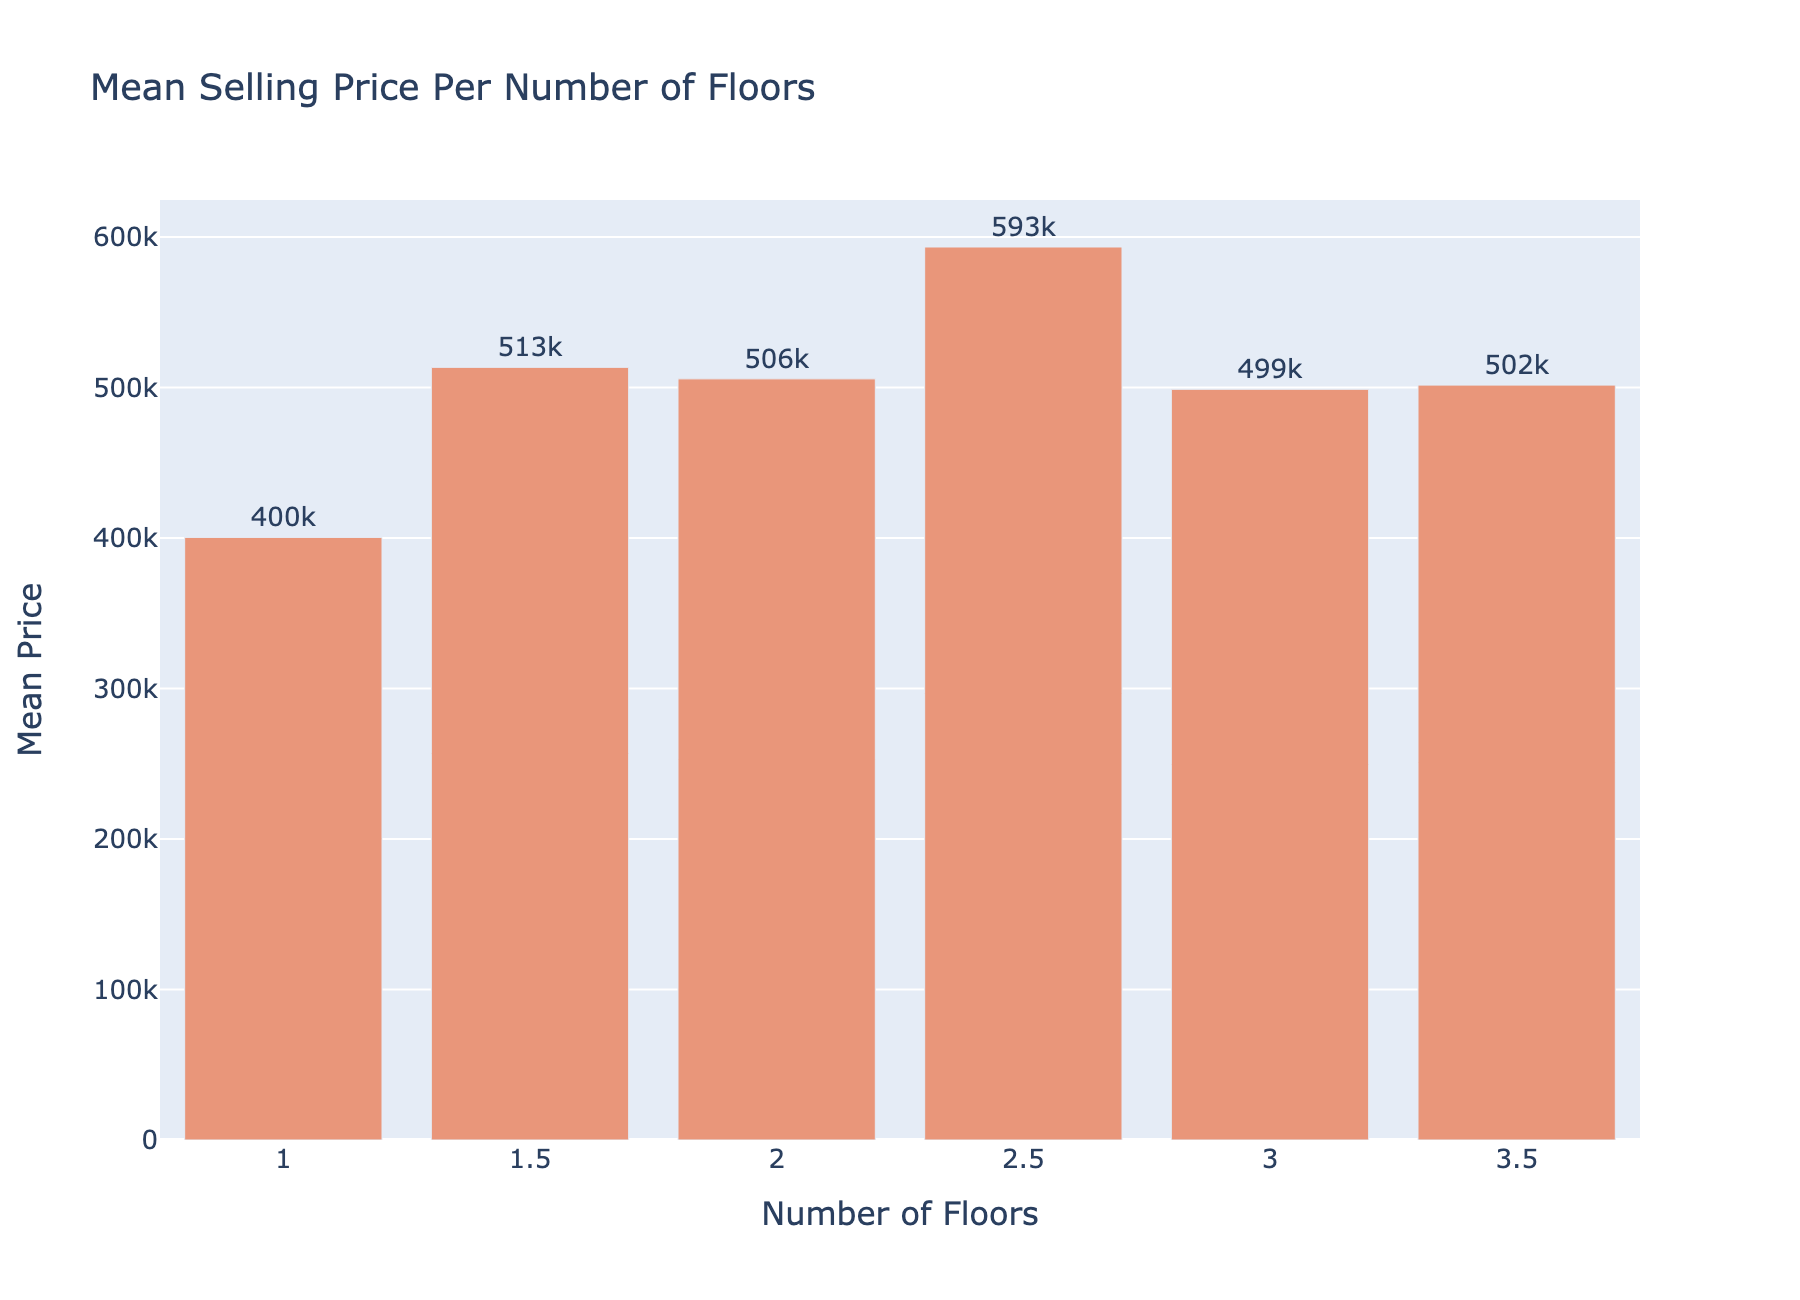

In [34]:
# Making a new DataFrame that shows the mean selling price per number of floors
price_x_floors = kc_house_df.groupby('floors')['price'].mean()
price_x_floors = pd.DataFrame(price_x_floors)

# Renaming the columns for clarity
price_x_floors = price_x_floors.rename(columns = {'price': 'Mean Price', 'floors': 'Floors'})
price_x_floors = price_x_floors.rename_axis('Number of Floors')

# Graphing this relationship using a bar graph where x is the number of floors and y is the mean price
fig = px.bar(price_x_floors, price_x_floors.index, 'Mean Price', text = 'Mean Price', 
             title='Mean Selling Price Per Number of Floors', width=900, height = 650)

# Formating the text and color of the graph
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside', marker_color='darksalmon')
fig.update_layout(font=dict(size=13))

# Converting the visualizations to an image, so it displays in GitHub
img_bytes = fig.to_image(format="png", width=900, height=650, scale=2)
Image(img_bytes)

### Visualizing the relationship between price and month sold in 2014 - 2015

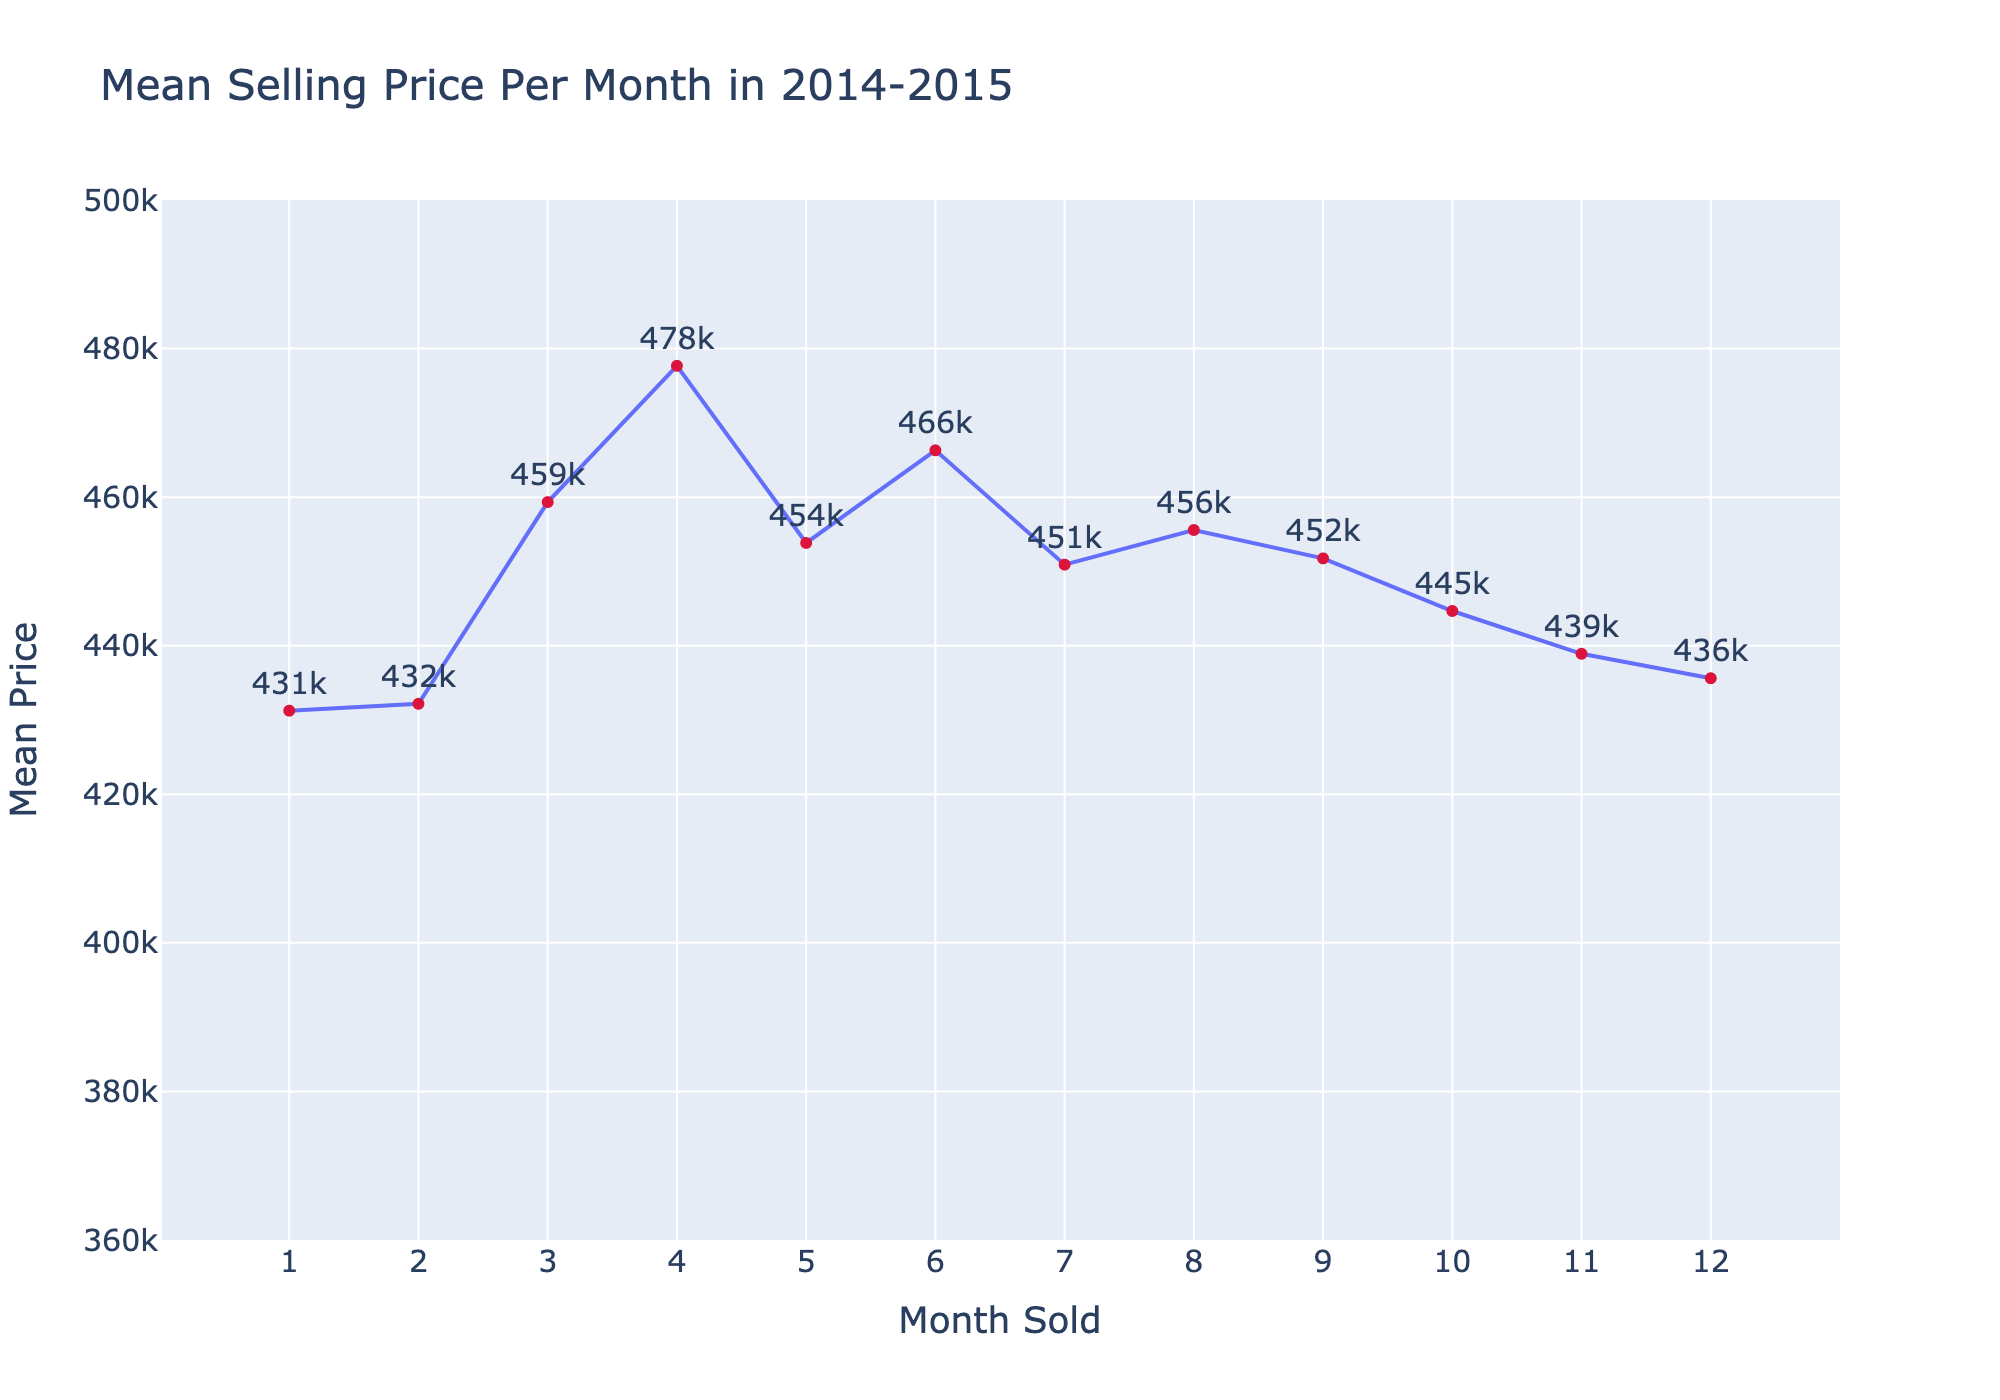

In [35]:
#HELP
# Making a new DataFrame that shows the mean selling price per month in 2014-2015
# price_x_month_2014 = kc_house_df.loc[kc_house_df['year_sold'] == '2014']
price_x_month = kc_house_df.groupby('month_sold')['price'].mean()
price_x_month = pd.DataFrame(price_x_month)
price_x_month = price_x_month.reset_index()

# Converting the values in month_sold to int so I can order them in the DataFrame
price_x_month['month_sold'] = price_x_month['month_sold'].apply(lambda x: int(x))

# Sorting the month_sold values in descending order
price_x_month = price_x_month.sort_values(by = 'month_sold', ascending = False)

# Renaming the columns for clarity
price_x_month = price_x_month.rename(columns = {'price': 'Mean Price', 'month_sold': 'Month Sold'})

# Setting the index to 'Month Sold'
price_x_month = price_x_month.set_index('Month Sold')

# Graphing this relationship using a bar graph where x is the month and y is the mean price
fig = px.line(price_x_month, price_x_month.index, 'Mean Price', text = 'Mean Price',
                 title='Mean Selling Price Per Month in 2014-2015', width=1000, height = 700)


# Formating the text and color of the graph as well as the y-axis values
fig.update_traces(marker_color='crimson', texttemplate='%{text:.3s}', textposition='top center')
fig.update_yaxes(range=[360000, 500000])
fig.update_xaxes(range=[0, 13], tickvals=[1,2,3,4,5,6,7,8,9,10,11,12])
fig.update_layout(font=dict(size=15))

# Converting the visualizations to an image, so it displays in GitHub
img_bytes = fig.to_image(format="png", width=1000, height=700, scale=2)
Image(img_bytes)

### Visualizing the relationship between price and view quality (Excellent, Good, Average, Fair, None)

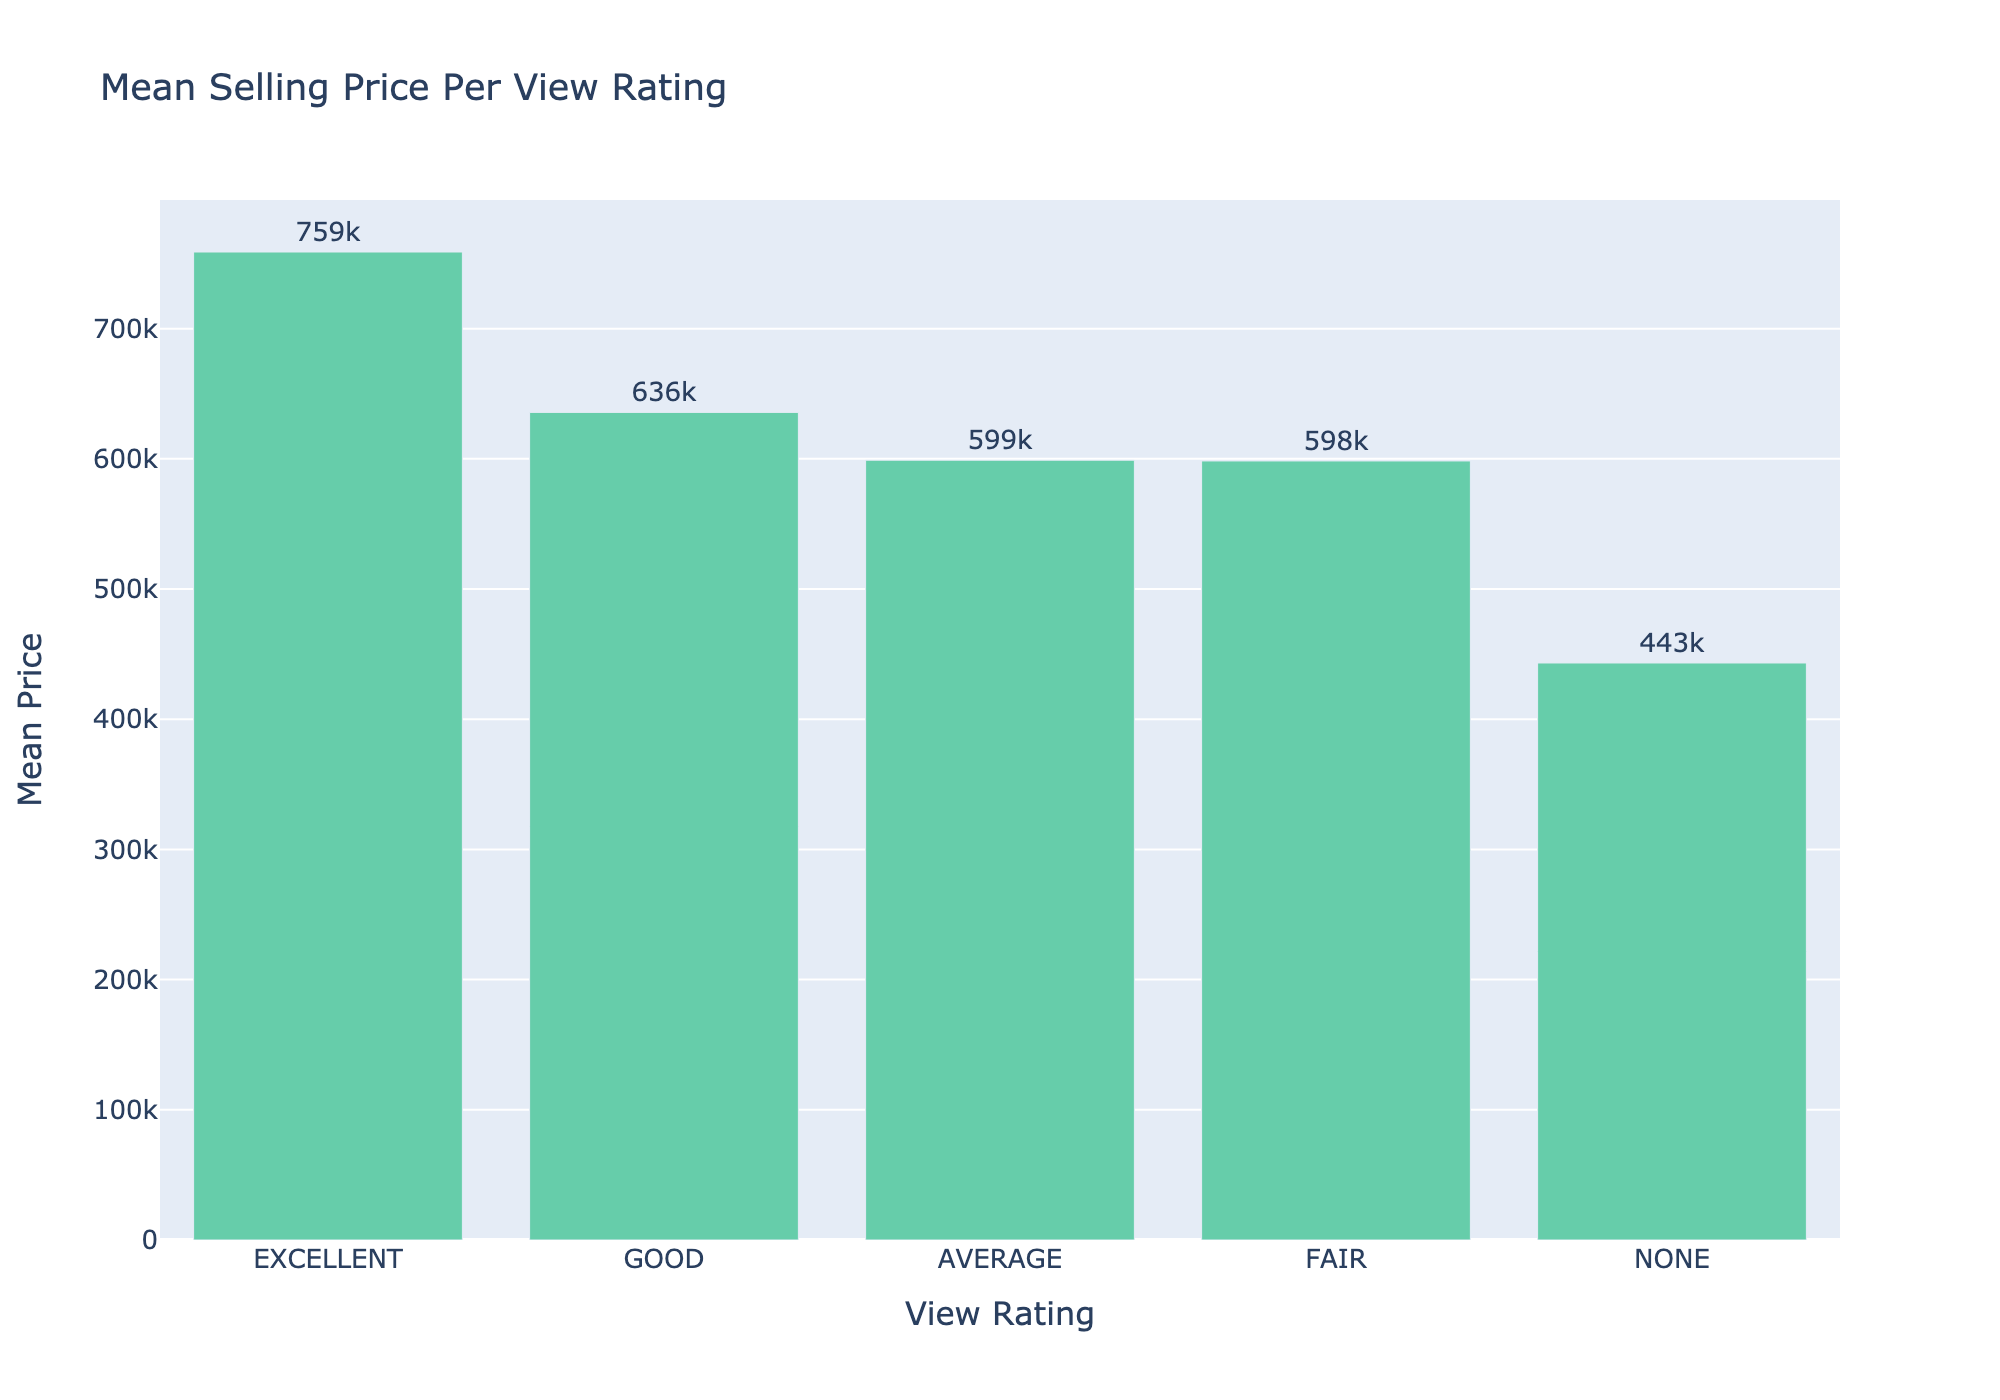

In [36]:
# Grouping each view level (Excellent, Good, Average, Fair, None) by mean price
price_x_view = kc_house_df.groupby('view')['price'].mean()

# Turning this series into a DataFrame and sorting by price
price_x_view = pd.DataFrame(price_x_view).sort_values(by = 'price')

# Renaming for clarity
price_x_view = price_x_view.rename(columns = {'price': 'Mean Price'})
price_x_view = price_x_view.rename_axis('View Rating')

# Graphing this relationship using a bar graph where x is the view rating and y is the mean price
fig = px.bar(price_x_view, price_x_view.index, 'Mean Price', text = 'Mean Price', 
             title='Mean Selling Price Per View Rating', width=1000, height = 700)

fig.update_traces(texttemplate='%{text:.3s}', textposition='outside', marker_color='mediumaquamarine')

fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['EXCELLENT', 'GOOD', 'AVERAGE', 'FAIR', 'NONE']},
                  font=dict(size=13),
                  showlegend = False
     )

# Converting the visualizations to an image, so it displays in GitHub
img_bytes = fig.to_image(format="png", width=1000, height=700, scale=2)
Image(img_bytes)

### Visualizing the relationship between price and condition (Very Good, Good, Average, Fair/Poor)

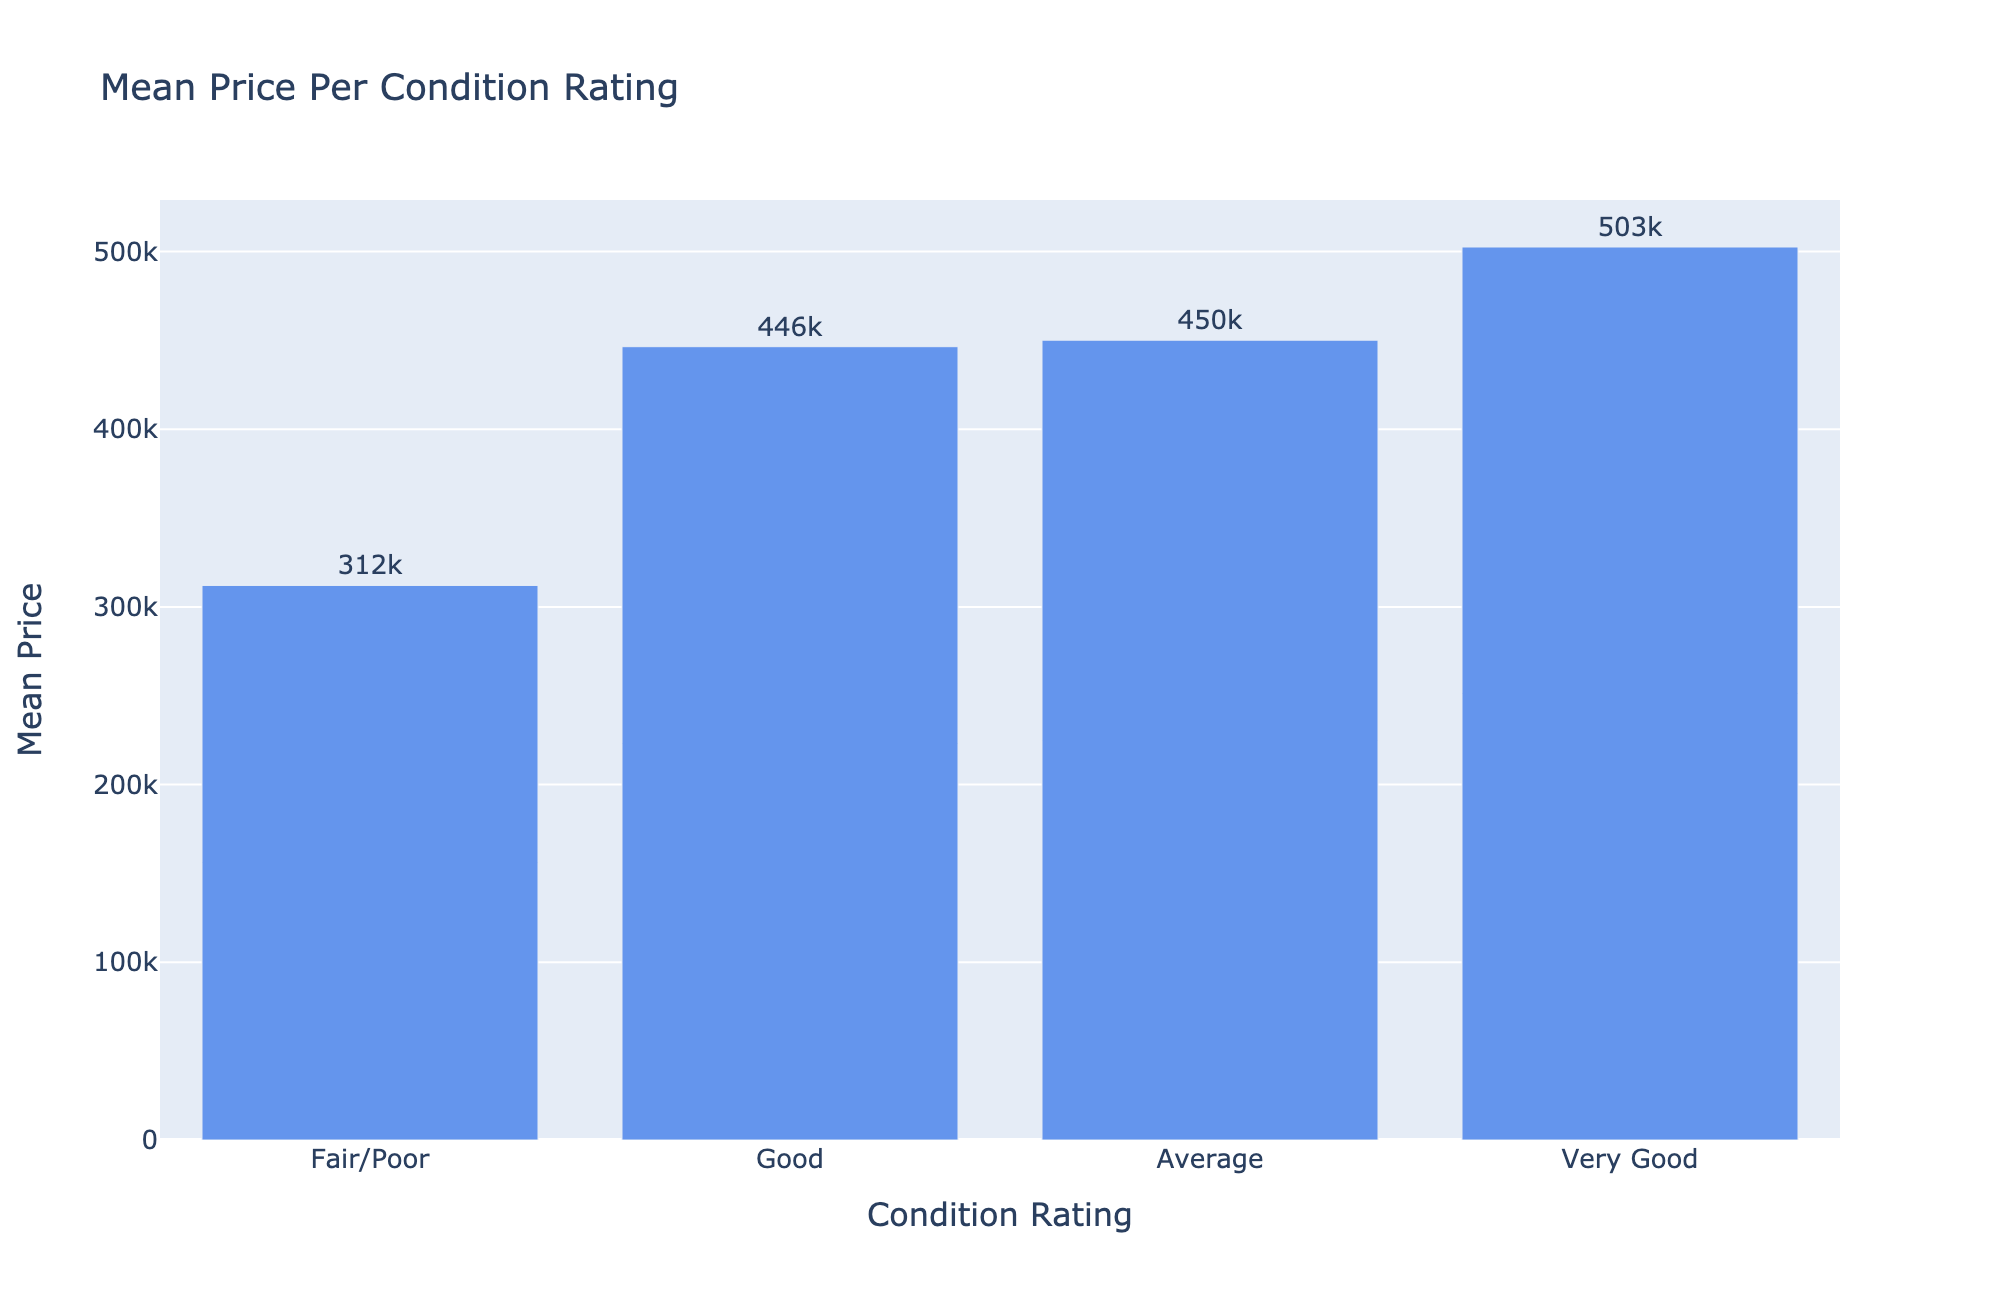

In [37]:
# Looking at the value counts for 'condition'
condition = kc_house_df['condition']
condition.value_counts()

# Because there are significantly fewer houses rated as 'Poor' and 'Fair', I will combine these two columns
price_x_condition = kc_house_df[['condition', 'price']]
price_x_condition.loc[(price_x_condition['condition'] == 'Fair')|(price_x_condition['condition'] == 'Poor'), \
                      'condition'] = 'Fair/Poor'

# Grouping each condition level (Very Good, Good, Average, Fair/Poor) by mean price
price_x_condition = price_x_condition.groupby('condition')['price'].mean()

# Turning this series into a DataFrame
price_x_condition = pd.DataFrame(price_x_condition)

# Renaming for clarity
price_x_condition = price_x_condition.rename(columns = {'price': 'Mean Price'})
price_x_condition = price_x_condition.rename_axis('Condition Rating')

# Graphing this relationship using a bar graph where x is the condition rating and y is the mean price
fig = px.bar(price_x_condition, price_x_condition.index, 'Mean Price', text = 'Mean Price', 
             title='Mean Price Per Condition Rating', width=1000, height = 650)

fig.update_traces(texttemplate='%{text:.3s}', textposition='outside', marker_color='cornflowerblue')

fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['Fair/Poor', 'Good', 'Average', 'Very Good']},
                  font=dict(size=13),
                  showlegend = False
                  )

# Converting the visualizations to an image, so it displays in GitHub
img_bytes = fig.to_image(format="png", width=1000, height=650, scale=2)
Image(img_bytes)

### Visualizing the relationship between zip code and price

In [38]:
# Importing the necessary packages
import folium
import json
import os
from folium.plugins import MarkerCluster

# Loading in a file that will create the borders of the zip codes
kc_json = os.path.join(os.getcwd(),'data', 'zipcode_kc.geojson') 
kc_json = json.load(open(kc_json))

# Making a copy of kc_house_df
map_df = kc_house_df.copy()
map_df = map_df.reset_index()

# Creating a base map
map = folium.Map(location=[47.7776, -122.503], default_zoom_start=15)

# Creating a choropleth map that colors the different zip codes by price 
# Red = mean sales price of houses in the zip code is on the lower end
# Green = mean sales price of houses in the zip code is on the higher end

folium.Choropleth(geo_data=kc_json,
               data=map_df, 
               columns=['zipcode', 'price'], 
               key_on='feature.properties.ZIP', 
               fill = True,
               fill_color='RdYlGn',fill_opacity=0.7,line_opacity=0.4,
               legend_name='Mean House Sales Price in Zip Code').add_to(map)

# Adding markers to make this map more interactive and shows the number of houses in an area, the zipcode, and price
marker_cluster = MarkerCluster().add_to(map)
for i in range((map_df.shape[0])):
    location = [map_df['lat'][i], map_df['long'][i]]
    tooltip = "Zipcode: {}".format(map_df["zipcode"][i])
    folium.Marker(location, 
                  popup="""
                  <i>Sales price: </i> <br> <b>${}</b> 
                  """.format(round(map_df['price'][i],2)),
                  tooltip=tooltip).add_to(marker_cluster)

# Uncomment 'map' to view interactive map --> commented out for the sake of GitHub
# map

#### This interactive map will not show in Github. In order to view, please download the notebook and uncomment 'map' at the bottom of the code above.

#### Below is a preview of the map:

![interactive_map](images/interactive_map.png)

## Modeling

After doing some data cleaning, I perform a 70%-30% Train-Test Split on the data with price as the target variable and all other variables as the predictors. Next, I create several linear regression models. 

The process that I use to reach my final model involves the following steps:
* Making categorical columns more interpretable (ex: date, zip code, condition) through One Hot Encoding and Ordinal Encoding
* Standard Scaling the predictor variables
* Normalizing the target variable
* Checking for predictors with the strongest and weakest impacts on price
* Looking at relationships between predictors
* Consistently checking the error

### Train-Test Split

In [39]:
# Train-Test split with 70% of the data in the train data and 30% in the test data

# Target variable is 'price'
y = kc_house_df['price']

# Predictor variables are every variable except 'price'
X = kc_house_df.drop(columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

X_test_n = X_test.copy()

In [40]:
# Checking the size of the train data and the test data, respectively
print(len(X_train))
print(len(X_test))

9118
3909


### Baseline Model

In [41]:
# Baseline model with only the continuous and discrete numerical values
base  = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 
         'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 
         'sqft_lot15', 'month_sold', 'year_sold']

lr = LinearRegression()

lr.fit(X_train[base], y_train)

LinearRegression()

In [42]:
# Checking the R-squared of my model
r_squared = lr.score(X_train[base], y_train)
r_squared

0.6097309348970411

In [43]:
adj_r2 = 1 - (1-r_squared) * ((len(y)-1)/(len(y)-X_train.shape[1]-1))
adj_r2

0.6090706827106165

In [44]:
# Checking my model for overfitting
lr.score(X_test[base], y_test)

# Confirmed not overfitting

0.6140040810610292

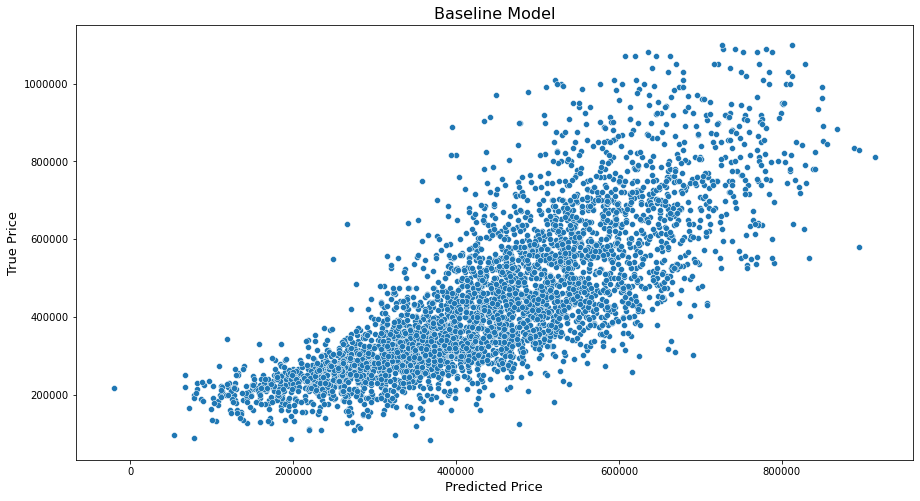

In [45]:
# Creating the y predictions
y_pred = lr.predict(X_test[base])

# Plotting the y predictions against the y test
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x =y_pred,y=  y_test)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Predicted Price', fontsize=13)
plt.ylabel('True Price', fontsize=13)
plt.title('Baseline Model', fontsize=16);

In [46]:
# Looking at errors
MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error =', MAE,'USD')

RMSE = mean_squared_error(y_test, y_pred, squared = False)
print('Root Mean Square Error =', RMSE,'USD')

Mean Absolute Error = 91417.36465305726 USD
Root Mean Square Error = 120635.47600609528 USD


###### Comments about the baseline model

An R-squared of 61% and an adjusted R-squared of 60.68% are not great, and the errors (MAE and RMSE) are too high.

For my next model, I will use One Hot Encoding and Ordinal Coding in order to allow myself to add categorical variables into my model.

I will also use StandardScaler to standardize and scale my X_train and X_test, as well as np.log to normalize my y_train.

_Note_: It is a good sign that the MAE is less than the RMSE. It would be an issue if the MAE was larger than the RMSE, so this is something to look out for.

### Model 2

#### One Hot Encoding

In [47]:
# Using OneHotEncoder to make columns for each category in 'zipcode' and 'waterfront' for both the train and test data
# I specified drop = 'first' to drop the first column as a way to avoid the dummy variable trap.
# The dropped column will become the reference category
onehot_enc = OneHotEncoder(handle_unknown = 'error', drop = 'first', sparse = False)

# Nominal columns from the dataset
nom_col = ['zipcode', 'waterfront', 'month_sold', 'year_sold']

# One Hot Encoding
nom_cats_train = onehot_enc.fit_transform(X_train[nom_col])
nom_cats_test = onehot_enc.transform(X_test[nom_col])

# Assigning the column names of the dummy variables to columns
columns = onehot_enc.get_feature_names_out()

# Turning the One Hot Encoded data into DataFrames (one for train, one for test)
nom_cats_train = pd.DataFrame(nom_cats_train, columns = columns)
nom_cats_test = pd.DataFrame(nom_cats_test, columns = columns)

# Concating X_train and nom_cats_train to make one large DataFrame and reassigning it to X_train
X_train = pd.concat([X_train.reset_index(), nom_cats_train], axis = 1)

# Concating X_test and nom_cats_test to make one large DataFrame and reassigning it to X_test
X_test = pd.concat([X_test.reset_index(), nom_cats_test], axis = 1)

In [48]:
# Because I One Hot Encoded 'zipcode' and 'waterfront', I can drop the original 'zipcode' and 'waterfront' columns
# I'll do this to both the train data and the test data

# Dropping 'zipcode' and 'waterfront' from the train data
X_train.drop(columns = ['zipcode', 'waterfront', 'month_sold', 'year_sold'], inplace = True)

# Dropping 'zipcode' and 'waterfront' from the test data
X_test.drop(columns = ['zipcode', 'waterfront', 'month_sold', 'year_sold'], inplace = True)

# I can also drop 'index' and 'id' because they are not relevant
X_train.drop(columns = ['index', 'id'], inplace = True)
X_test.drop(columns = ['index', 'id'], inplace = True)

#### Ordinal Encoding

In [49]:
# Using Ordinal Encoding to make the values of ordinal variables numerical

# Ordinal columns in the dataset
ord_cat_selector = ['view', 'condition', 'grade']

# Creating the train and test subsets that only include the relevant columns
ord_cat_subset_train = X_train[ord_cat_selector]
ord_cat_subset_test = X_test[ord_cat_selector]

# Correctly ordering the values of the ordinal columns
view_ord = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']
condition_ord = ['Poor', 'Fair', 'Average', 'Good','Very Good']
grade_ord = ['4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent']

# Defining ord_enc using OrdinalEncoder
ord_enc = OrdinalEncoder(categories = [view_ord, condition_ord, grade_ord])

# Ordinal Encoding
ord_enc.fit_transform(ord_cat_subset_train)
ord_enc.transform(ord_cat_subset_test)

# Turning the Ordinal Encoded data into DataFrames (one for train, one for test)
ord_cat_subset_train = pd.DataFrame(ord_enc.transform(ord_cat_subset_train),
                        columns = ord_cat_subset_train.columns)

ord_cat_subset_test = pd.DataFrame(ord_enc.transform(ord_cat_subset_test),
                        columns = ord_cat_subset_test.columns)

# Concating X_train and ord_cat_subset_train to make one large DataFrame and reassigning it to X_train
X_train = pd.concat([X_train, ord_cat_subset_train], axis = 1)

# Concating X_test and ord_cat_subset_test to make one large DataFrame and reassigning it to X_test
X_test = pd.concat([X_test, ord_cat_subset_test], axis = 1)

In [50]:
#Including only the columns that have numerical values 
#(this is essentially taking out the original 'view', 'condition', and 'grade' columns without dropping them)

X_train = X_train.select_dtypes(include='number')
X_test = X_test.select_dtypes(include='number')

#### Standard Scaling X

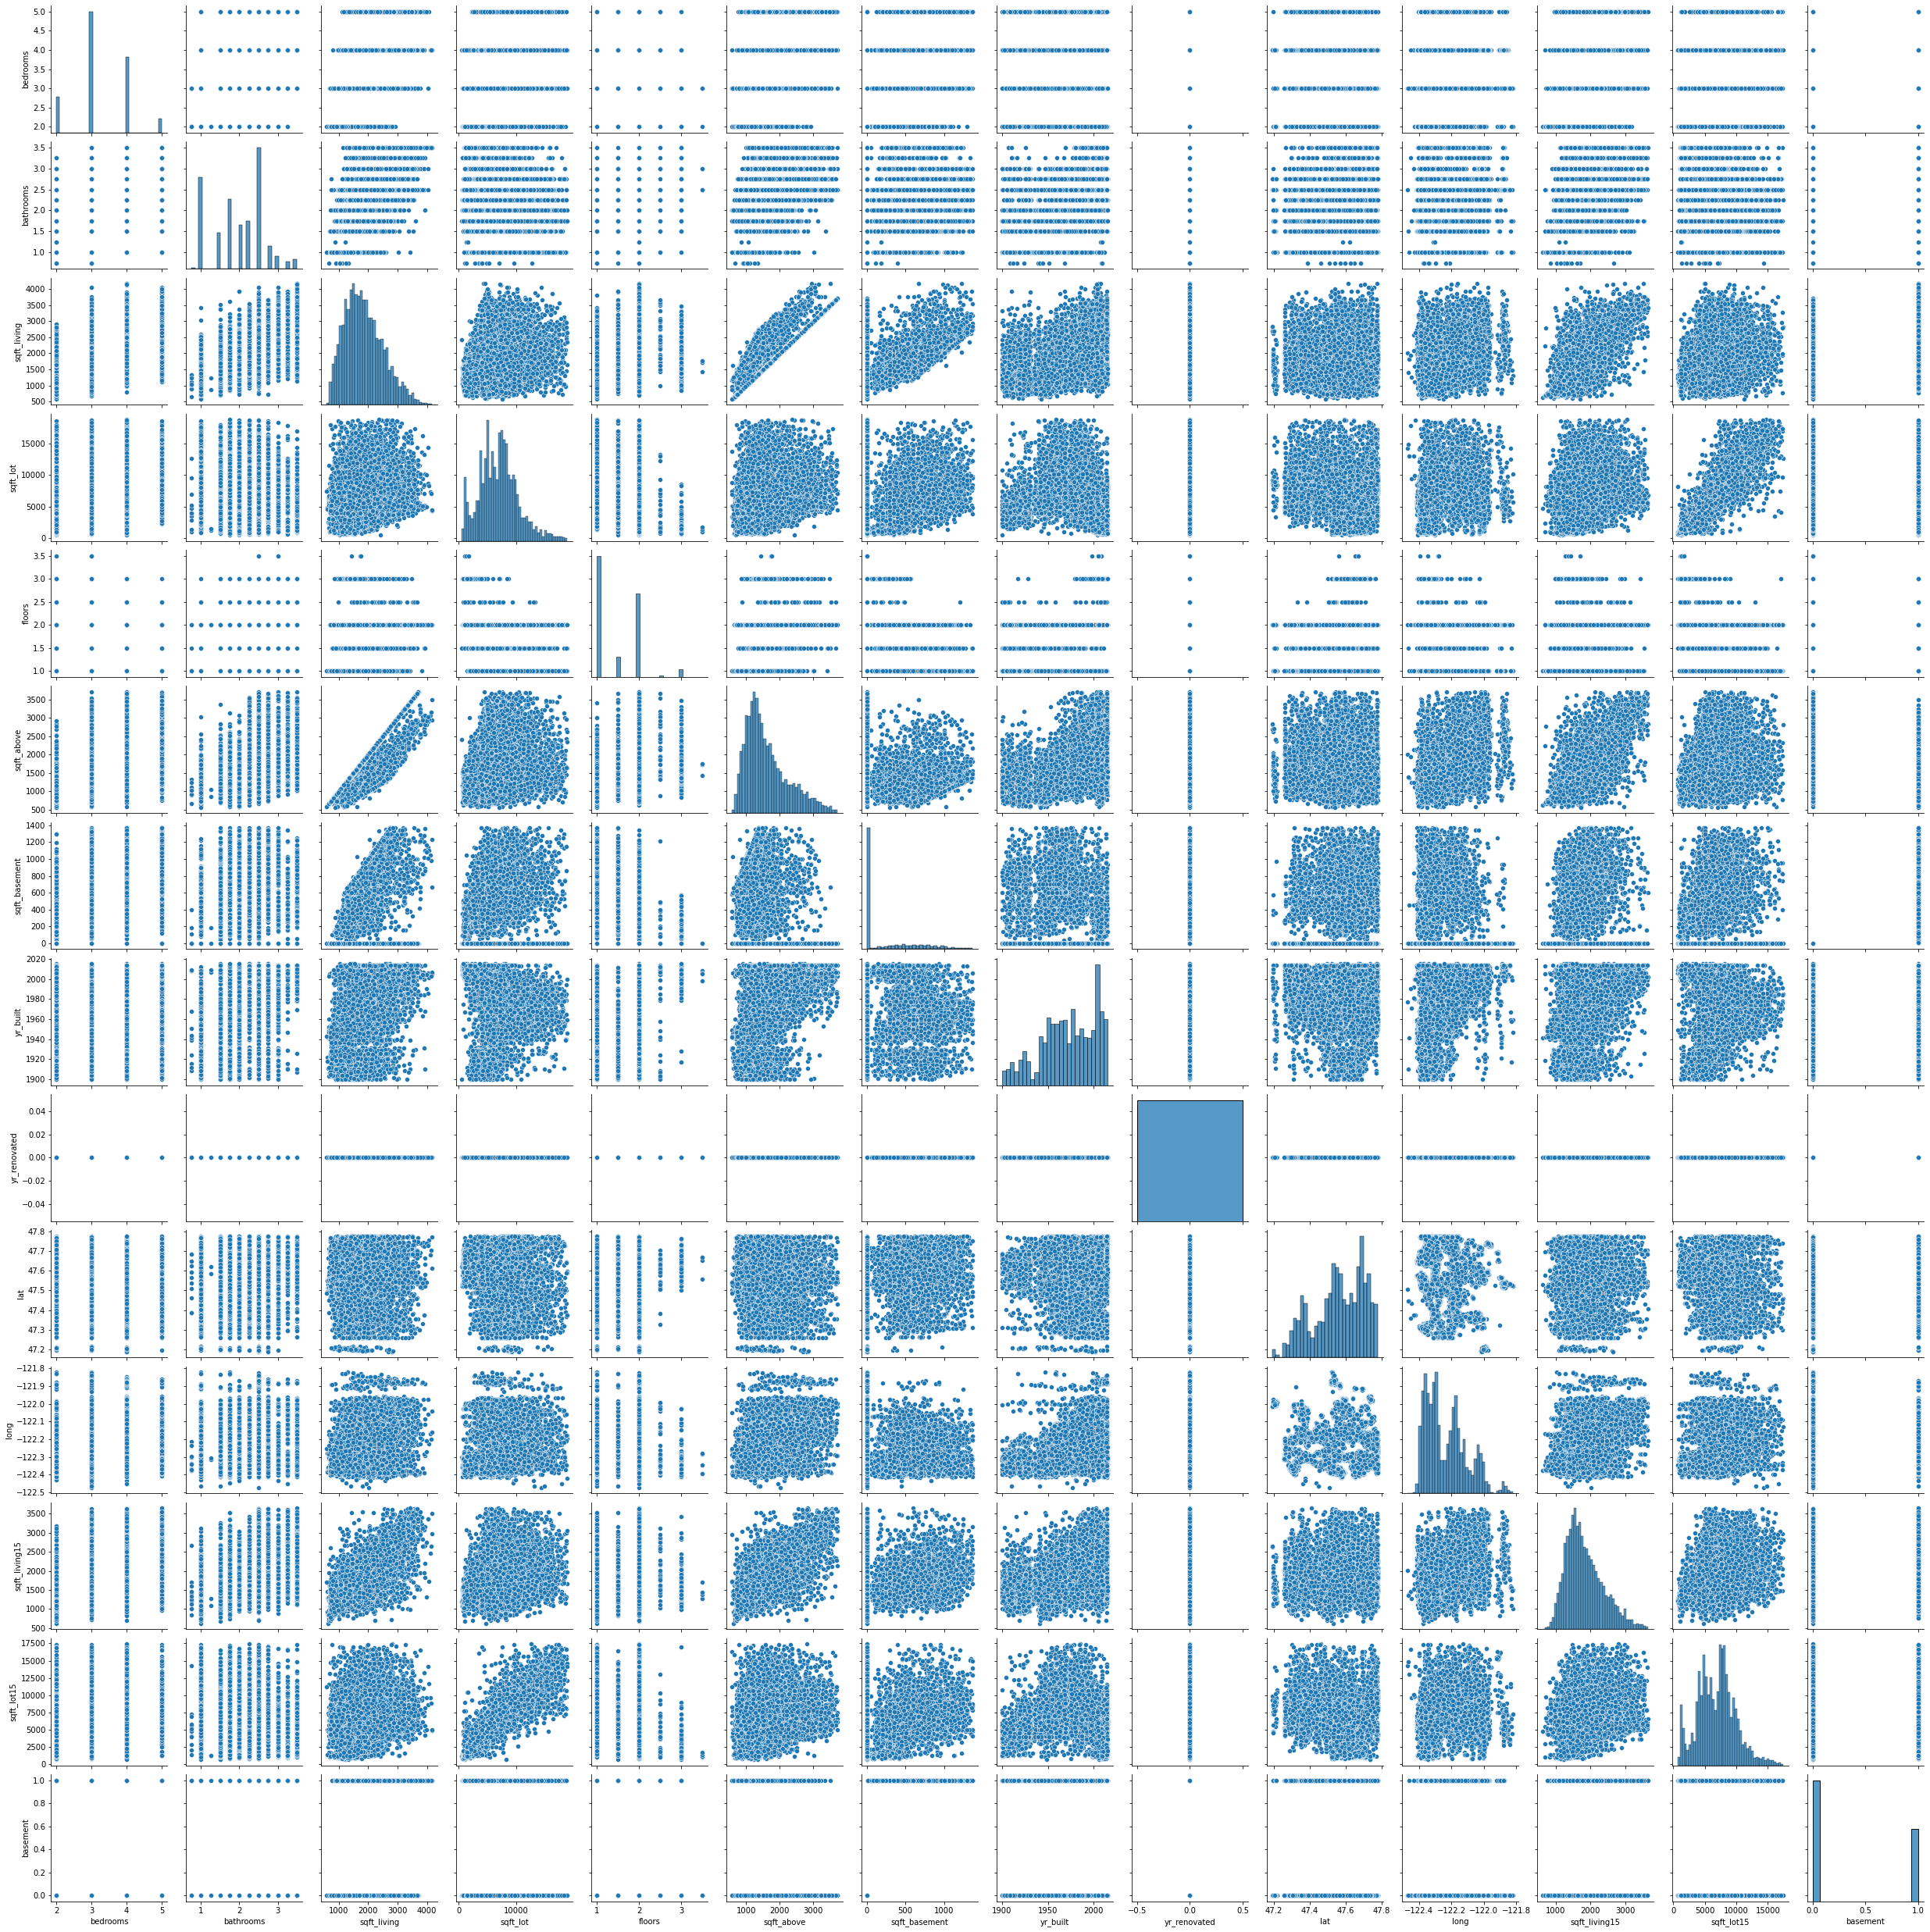

In [51]:
#Looking at the distributions of the X columns that were not encoded
X_train_not_encoded = X_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above',
                              'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
                              'sqft_lot15', 'basement']]
sns.pairplot(X_train_not_encoded)
plt.show()

In [52]:
# Saving the unscaled data as new variables
X_train_unscaled = X_train.copy()
X_test_unscaled = X_test.copy()

In [53]:
# Standard scaling all continuous X_train columns

# Instantiating a new scaler
scaler = StandardScaler()

X_train[['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']] \
         = scaler.fit_transform \
           (X_train[['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']])

In [54]:
# Standard scaling all continuous X_test columns

X_test[['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']] \
         = scaler.transform(X_test[['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement',
                                   'sqft_living15', 'sqft_lot15']])

#### Normalizing Y

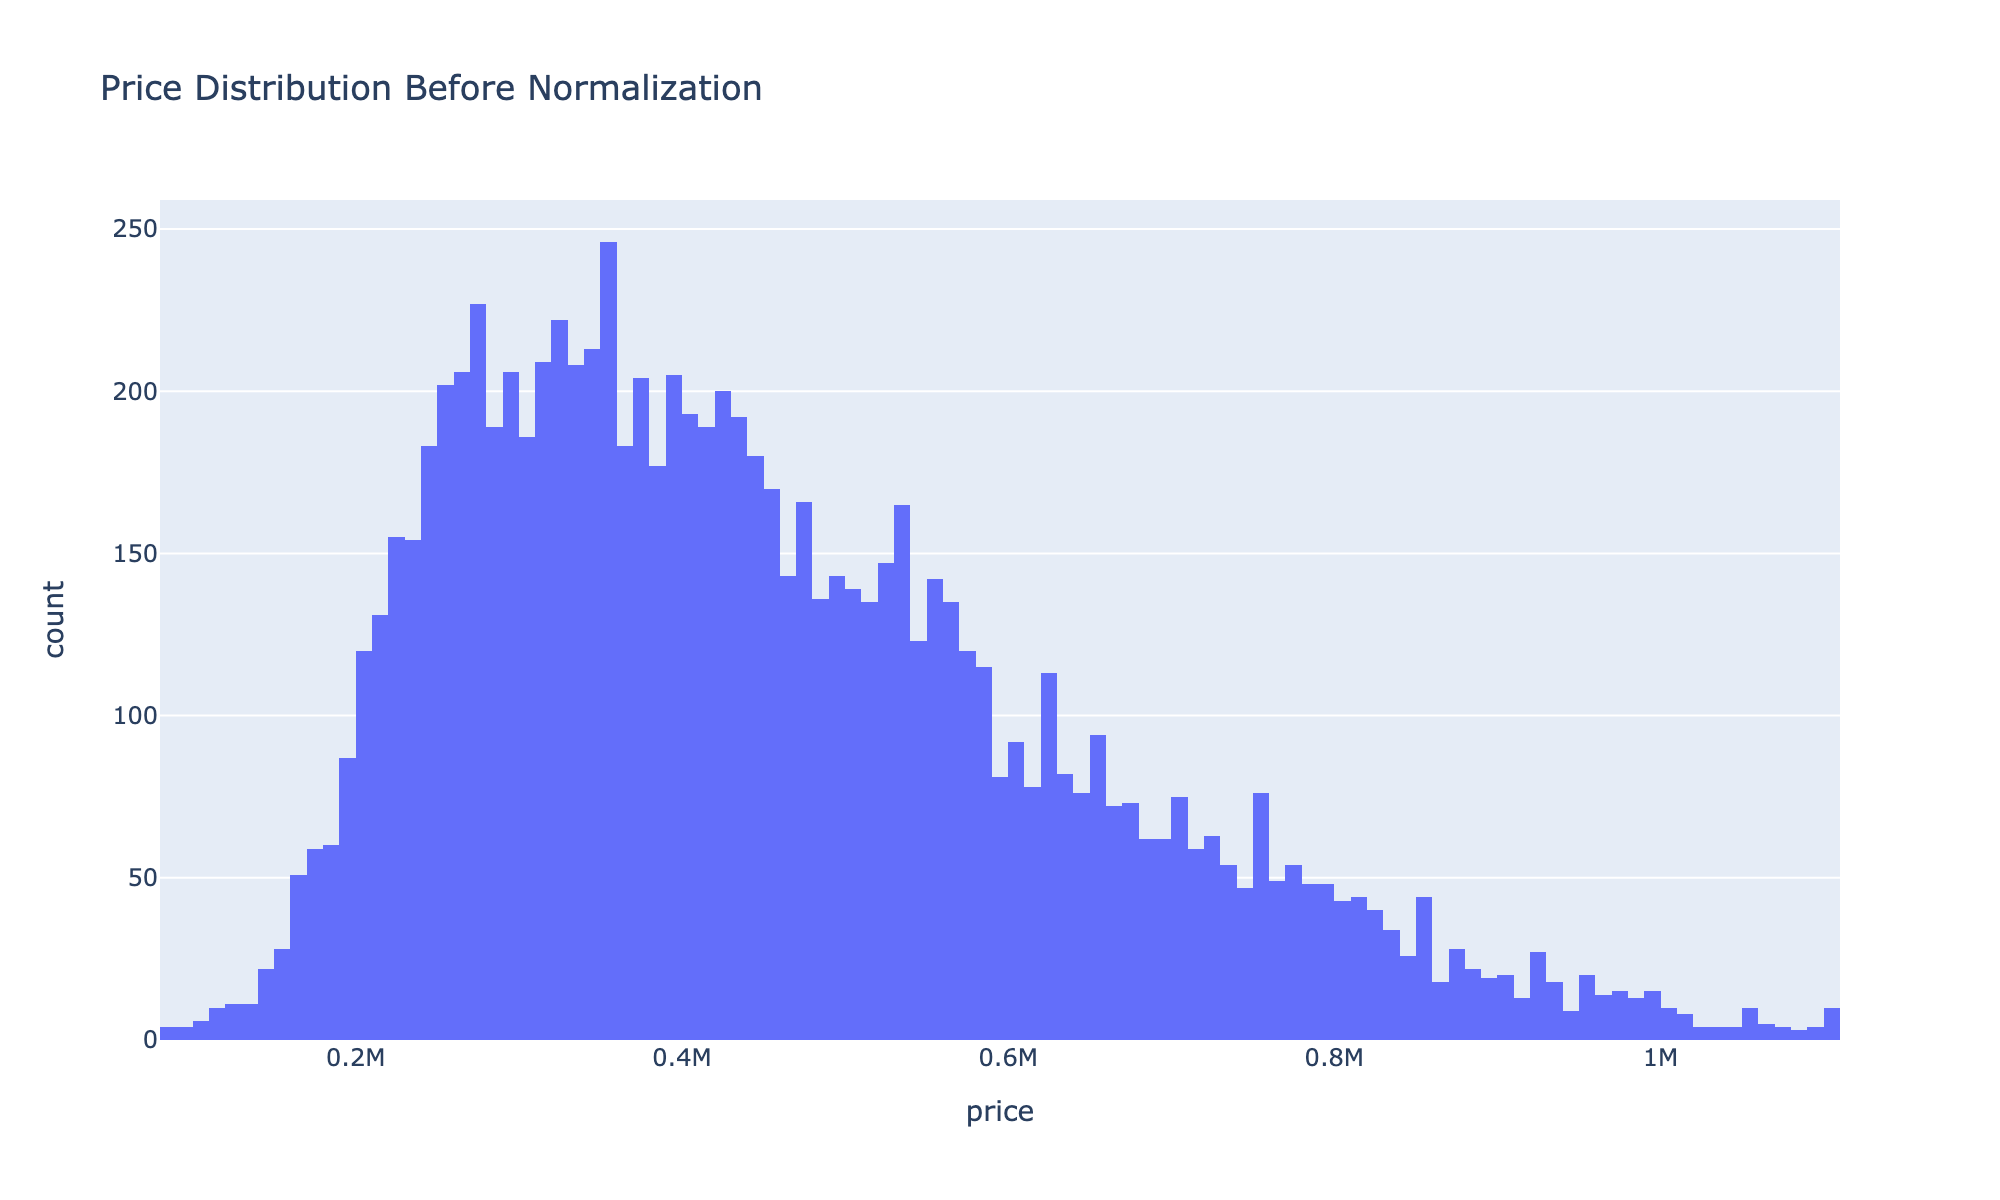

In [55]:
# Visualizing the y_train to see if I need to normalize the data

fig = px.histogram(x = y_train,  labels = {'x':'price'},
                   title="Price Distribution Before Normalization")

# Converting the visualizations to an image, so it displays in GitHub
img_bytes = fig.to_image(format="png", width=1000, height=600, scale=2)
Image(img_bytes)

# Based on this plot, I will go ahead and normalize the y_train

In [56]:
# Using np.log to normalize y_train
y_train_log = np.log(y_train)

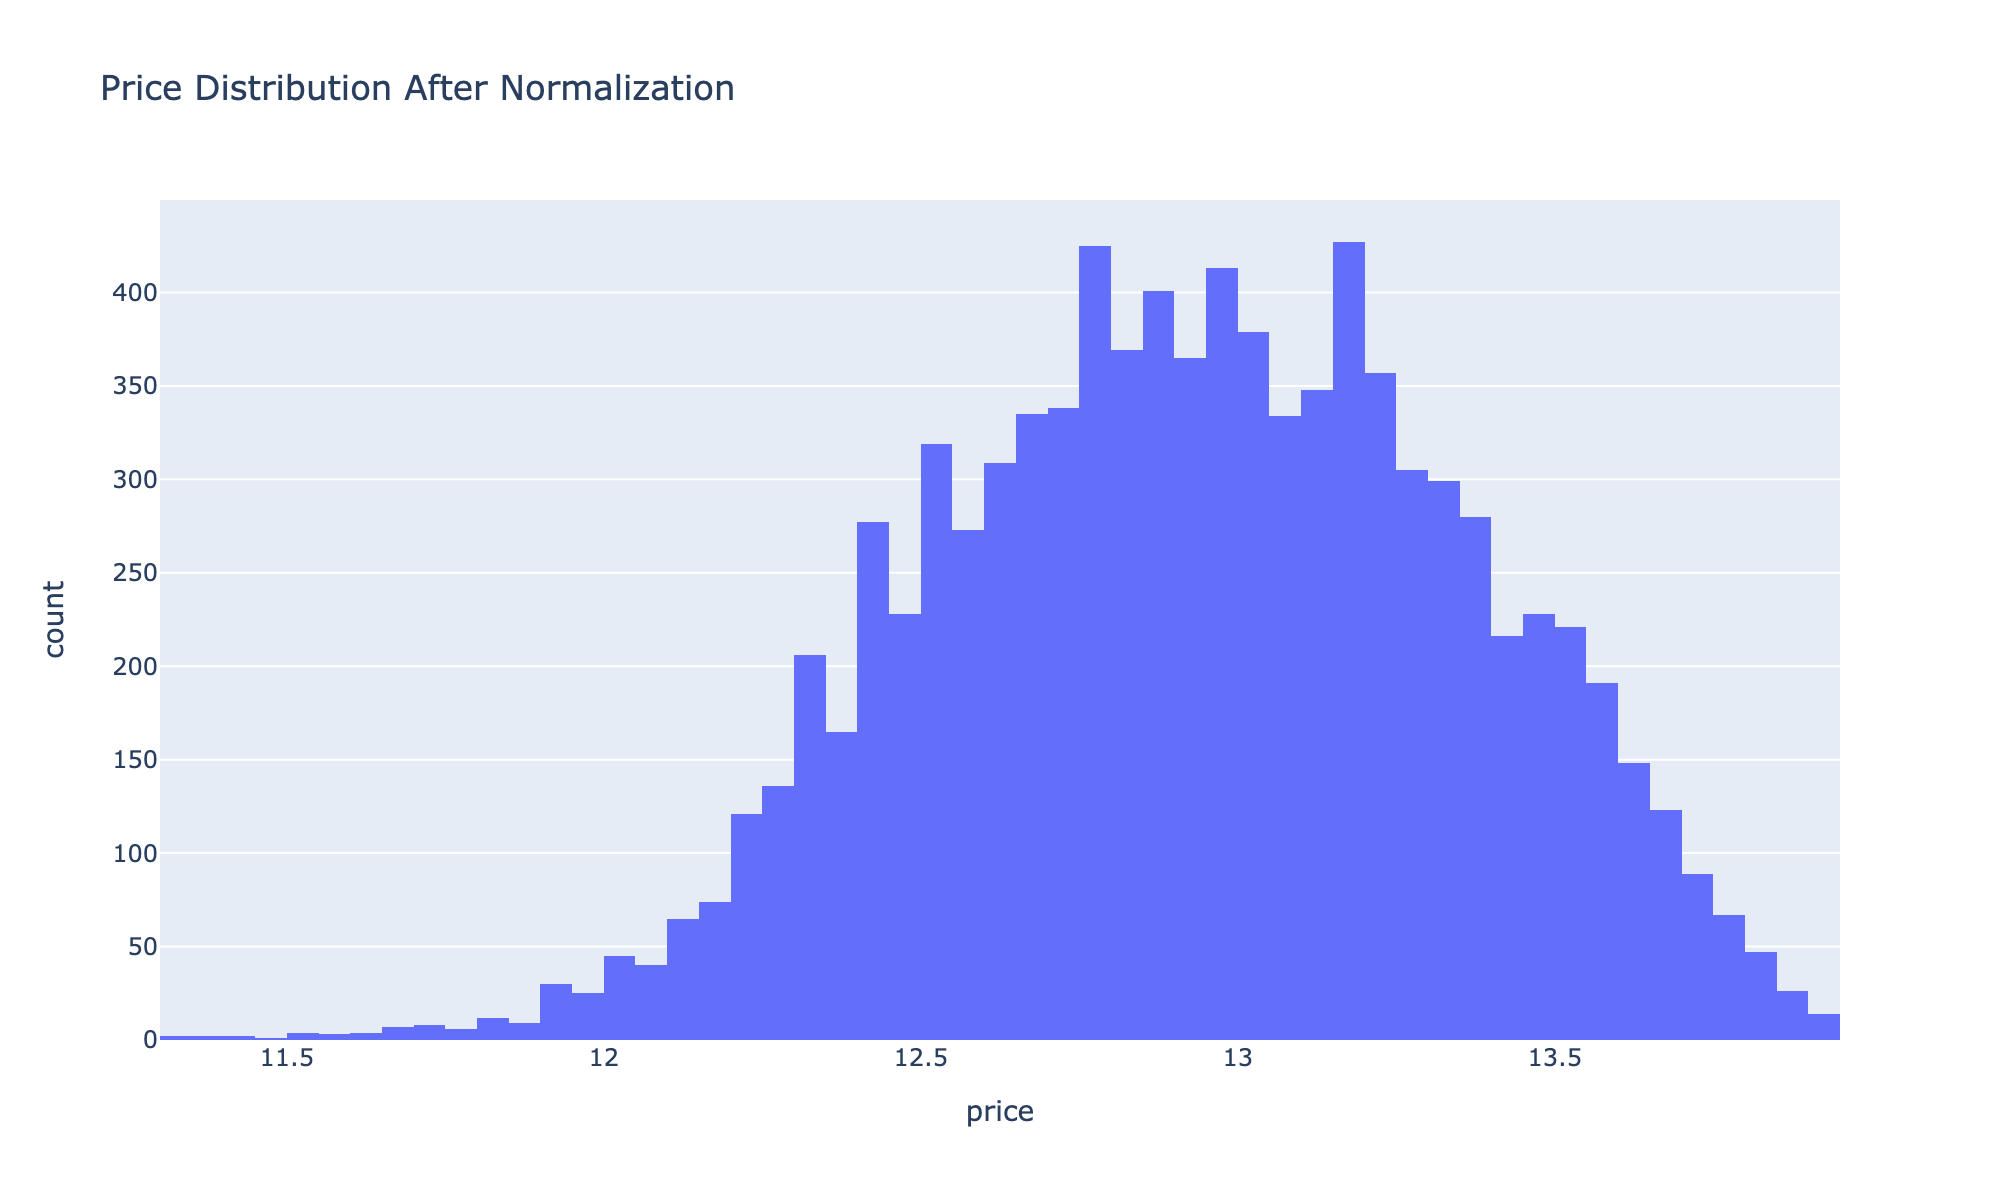

In [57]:
# Confirming that y_train_log is now normalized

fig = px.histogram(x = y_train_log, labels = {'x':'price'},  
                   title="Price Distribution After Normalization")

# Converting the visualizations to an image, so it displays in GitHub
img_bytes = fig.to_image(format="png", width=1000, height=600, scale=2)
Image(img_bytes)

#### Building Model 2

In [58]:
X_train_2 = X_train
X_test_2 = X_test

In [59]:
lr = LinearRegression()

lr.fit(X_train_2, y_train_log)

LinearRegression()

In [60]:
# Checking the R-squared of Model 2
r_squared = lr.score(X_train_2, y_train_log)
r_squared

0.8554641518849041

In [61]:
# Calculating the Adjusted R-squared for Model 2 
adj_r2 = 1 - (1-r_squared) * ((len(y)-1)/(len(y)-X_train_2.shape[1]-1))
adj_r2

0.8543685057590316

In [62]:
# Checking for overfitting

#Have to turn y_test into log form to check the score
y_test_log = np.log(y_test)

r_squared_test = lr.score(X_test_2, y_test_log)
r_squared_test

# Confirmed not overfitting

0.8561083253523882

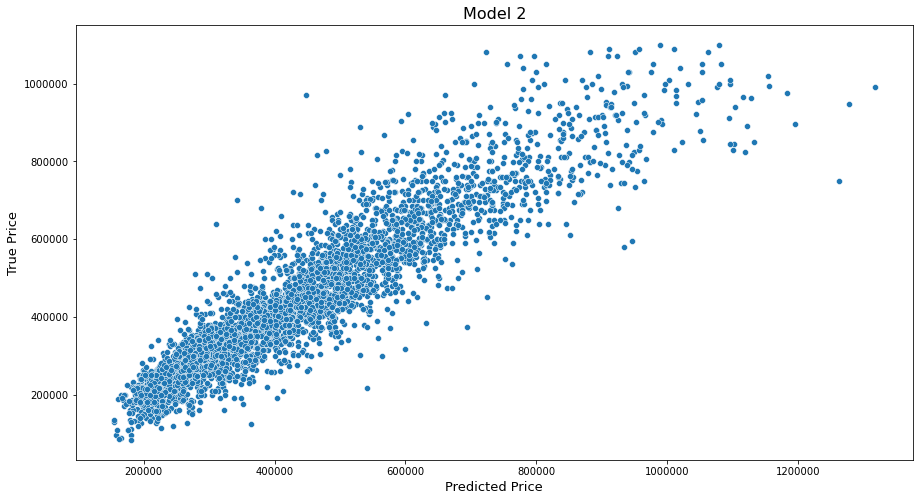

In [63]:
# Creating the y predictions
y_pred_2 = lr.predict(X_test_2)

#Back-transforming the y prediction values since they are in log form and are thus mismatched from the y test values
y_pred_2 = np.exp(y_pred_2)

# Plotting the y predictions against the y test
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x = y_pred_2, y = y_test)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Predicted Price', fontsize=13)
plt.ylabel('True Price', fontsize=13)
plt.title('Model 2', fontsize=16);

In [64]:
# Looking at errors
MAE = mean_absolute_error(y_test, y_pred_2)
print('Mean Absolute Error =', MAE,'USD')

RMSE = mean_squared_error(y_test, y_pred_2, squared = False)
print('Root Mean Square Error =', RMSE,'USD')

Mean Absolute Error = 52791.9741980704 USD
Root Mean Square Error = 75066.14180546845 USD


##### Comments about Model 2

An adjusted R-squared of 85.44% is good, but the errors (MAE and RMSE) are still too high. These values, however, are all better than they were in the baseline model.

Next, I want to see if accounting for multicollinearity will improve both my adjusted R-squared and errors. If this is not the case (i.e., Model 2 is still better), then I will assume that the multicollinearity of the predictor variables is not severe enough to weaken my model.

_Note_: MAE remains less than the RMSE.

In [65]:
# Making a correlation table to assess multicollinearity
correlation_table = X_train_2.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# Zip the variable name columns (which were only named level_0 and level_1 by default) in a new column named 'pairs'
correlation_table['pairs'] = list(zip(correlation_table.level_0, correlation_table.level_1))

# Set index to 'pairs'
correlation_table.set_index(['pairs'], inplace = True)

# Drop level columns
correlation_table.drop(columns=['level_1', 'level_0'], inplace = True)

# Rename correlation column as cc rather than 0
correlation_table.columns = ['cc']

# Limiting the correlation table to show the highest correlations - not including those that are equal to 1
correlation_table = correlation_table.loc[(correlation_table['cc']>.7) & (correlation_table['cc'] <1)]

# Dropping duplicates
correlation_table.drop_duplicates(inplace = True)

correlation_table

cc
pairs                               
(sqft_lot, sqft_lot15)       0.87702
(basement, sqft_basement)    0.85590
(sqft_above, sqft_living)    0.84224
(sqft_living, sqft_living15) 0.74491
(sqft_above, sqft_living15)  0.72100

The correlation table shows me that I should drop one variable from each of the pairs to avoid multicollinearity in the next model **(Model 3)**:

**'sqft_lot' vs. sqft_lot15'**: 'sqft_lot' represents the total square footage of the lot of a house. 'sqft_lot_15' represents the average square footage of the lots of houses of the nearest 15 neighbors. When thinking about which of these two is more important to the goal of my model, 'sqft_lot' is the clear answer. Therefore, I will drop 'sqft_lot15'

**'basement' vs. 'sqft_basement'**: I will drop 'basement' because 'sqft_basement' can provide more information than 'basement' from just one column. Not only does 'sqft_basement" include the size of the basement, but it also implies whether or not a house has a basement.

**'sqft_above' vs. 'sqft_living'**: I will drop 'sqft_above' because, as mentioned, 'sqft_living' represents the square footage of the whole house, whereas 'sqft_above' represents the square footage of the house apart from the basement. In other words, keeping 'sqft_living' simplifies the model because it can provide more information than 'sqft_above' from just one column.

**'sqft_living' vs. 'sqft_living15'**: Similarly to the case with 'sqft_lot' vs. 'sqft_lot15', it seems more appropriate to drop 'sqft_living15'


**'sqft_above' vs. 'sqft_living15'**: I will be dropping both of these columns based on the other pairings above.


_Alternate Changes_: After creating a model with such variables, I will make another model **(Model 4)** in which I instead drop 'sqft_living' and keep 'sqft_above'. In this alternate model, I will still be dropping 'basement', 'sqft_living15', and 'sqft_lot15'.


### Model 3

In [66]:
# Dropping the columns mentioned above

X_train_3 = X_train.drop(columns = ['sqft_above', 'basement', 'sqft_living15', 'sqft_lot15'])
X_test_3 = X_test.drop(columns = ['sqft_above', 'basement', 'sqft_living15', 'sqft_lot15'])

In [67]:
# In addition to dropping the columns mentioned above, an additional edit that I would 
# like to do at this point in my modeling is to make a boolean column in both X_train_3 and X_test_3
# called 'renovation' where a value of 1 means that the house has been renovated and 
# a value of 0 means that the house has not been renovated

X_train_3.loc[X_train_3['yr_renovated'] == 0, 'renovations'] = 0
X_train_3.loc[X_train_3['yr_renovated'] != 0, 'renovations'] = 1

X_test_3.loc[X_test_3['yr_renovated'] == 0, 'renovations'] = 0
X_test_3.loc[X_test_3['yr_renovated'] != 0, 'renovations'] = 1


# Now dropping 'yr_renovated' because I made the new 'renovations' column
X_train_3 = X_train_3.drop(columns = ['yr_renovated'])
X_test_3 = X_test_3.drop(columns = ['yr_renovated'])

In [68]:
lr = LinearRegression()

lr.fit(X_train_3, y_train_log)

LinearRegression()

In [69]:
# Checking the R-squared of Model 3
r_squared = lr.score(X_train_3, y_train_log)
r_squared

0.8509449597720405

In [70]:
# Calculating the Adjusted R-squared for Model 3 
adj_r2 = 1 - (1-r_squared) * ((len(y)-1)/(len(y)-X_train_3.shape[1]-1))
adj_r2

0.8498615098972008

In [71]:
# Checking for overfitting

#Have to turn y_test into log form to check the score
y_test_log = np.log(y_test)

r_squared = lr.score(X_test_3, y_test_log)
r_squared

# Confirmed not overfit

0.851953749697584

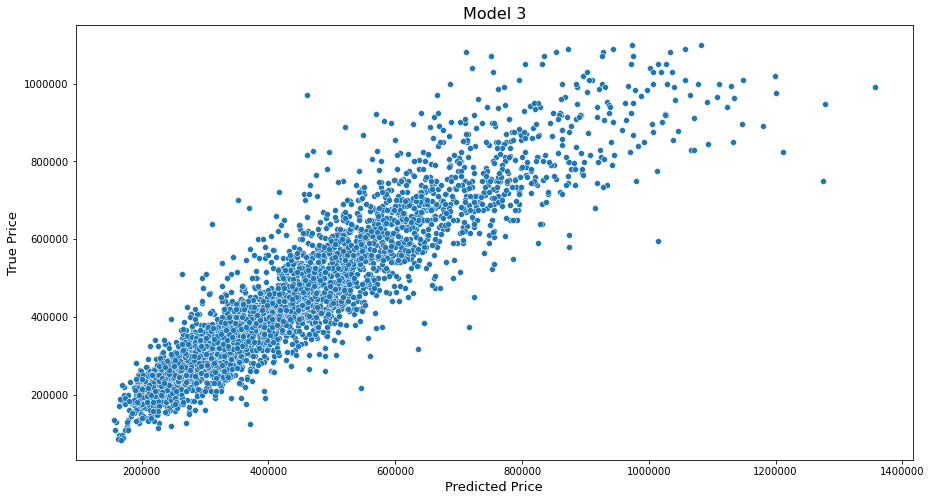

In [72]:
# Creating the y predictions
y_pred_3 = lr.predict(X_test_3)

#Back-transforming the y prediction values since they are in log form and are thus mismatched from the y test values
y_pred_3 = np.exp(y_pred_3)

# Plotting the y predictions against the y test
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x = y_pred_3, y = y_test)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Predicted Price', fontsize=13)
plt.ylabel('True Price', fontsize=13)
plt.title('Model 3', fontsize=16);

In [73]:
# Looking at errors
MAE = mean_absolute_error(y_test, y_pred_3)
print('Mean Absolute Error =', MAE,'USD')

RMSE = mean_squared_error(y_test, y_pred_3, squared = False)
print('Root Mean Square Error =', RMSE,'USD')

Mean Absolute Error = 53909.12355533806 USD
Root Mean Square Error = 76564.6576676939 USD


##### Comments about Model 3

The adjusted R-squared for this model is 85% which is slightly less than the previous model.

Similarly, the errors (MAE and RMSE) increased compared to the previous model.

This tells me that the changes I made for Model 3 were not necessarily effective in minimizing error and maximizing the adjusted R-squared value.

### Model 4

In [74]:
# For this model, I will do the alternate model that I had mentioned previously
# I will drop 'sqft_living' instead of 'sqft_above'
# I will still drop 'basement', 'sqft_living15', and 'sqft_lot15' like I did in model 3

# Dropping the mentioned columns
X_train_4 = X_train.drop(columns = ['sqft_living' ,'sqft_living15', 'sqft_lot15', 'basement'])
X_test_4 = X_test.drop(columns = ['sqft_living', 'sqft_living15', 'sqft_lot15', 'basement'])

In [75]:
# As I did in model 3, I will make a boolean column in both X_train_4 and X_test_4
# called 'renovation' where a value of 1 means that the house has been renovated and 
# a value of 0 means that the house has not been renovated

X_train_4.loc[X_train_4['yr_renovated'] == 0, 'renovations'] = 0
X_train_4.loc[X_train_4['yr_renovated'] != 0, 'renovations'] = 1

X_test_4.loc[X_test_4['yr_renovated'] == 0, 'renovations'] = 0
X_test_4.loc[X_test_4['yr_renovated'] != 0, 'renovations'] = 1


# Now dropping 'yr_renovated' because I made the new 'renovations' column
X_train_4 = X_train_4.drop(columns = ['yr_renovated'])
X_test_4 = X_test_4.drop(columns = ['yr_renovated'])

In [76]:
lr = LinearRegression()

lr.fit(X_train_4, y_train_log)

LinearRegression()

In [77]:
# Checking the R-squared of Model 4
r_squared = lr.score(X_train_4, y_train_log)
r_squared

0.8509449597720407

In [78]:
# Calculating the Adjusted R-squared for Model 4
adj_r2 = 1 - (1-r_squared) * ((len(y)-1)/(len(y)-X_train_4.shape[1]-1))
adj_r2

0.8498615098972009

In [79]:
# Checking for overfitting

#Have to turn y_test into log form to check the score
y_test_log = np.log(y_test)

r_squared = lr.score(X_test_4, y_test_log)
r_squared

# Confirmed not overfit

0.8519537496975835

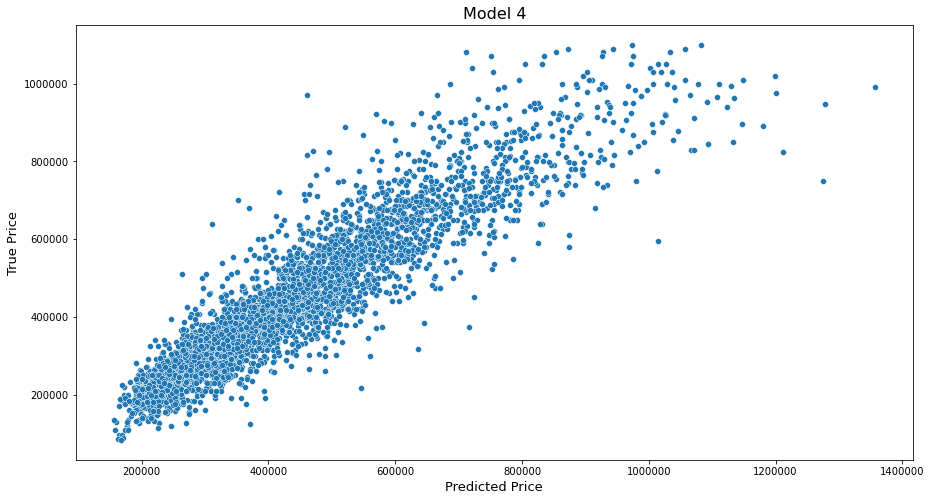

In [80]:
# Creating the y predictions
y_pred_4 = lr.predict(X_test_4)

#Back-transforming the y prediction values since they are in log form and are thus mismatched from the y test values
y_pred_4 = np.exp(y_pred_4)

# Plotting the y predictions against the y test
plt.figure(figsize=(15,8))
ax = sns.scatterplot(y_pred_4, y_test)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Predicted Price', fontsize=13)
plt.ylabel('True Price', fontsize=13)
plt.title('Model 4', fontsize=16);

In [81]:
# Looking at errors
MAE = mean_absolute_error(y_test, y_pred_4)
print('Mean Absolute Error =', MAE,'USD')

RMSE = mean_squared_error(y_test, y_pred_4, squared = False)
print('Root Mean Square Error =', RMSE,'USD')

Mean Absolute Error = 53909.12355533817 USD
Root Mean Square Error = 76564.65766769528 USD


##### Comments about Model 4

Interestingly, the adjusted R-squared for this model is essentially the same as that of Model 3. When rounded, both models have an adjusted R-squared of 85%.

Also, the differences in errors (both MAE and RMSE) between Model 3 and Model 4 are trivial as the values round to the same number in both models.

Nevertheless, the model with the highest adjusted R-squared and the lowest errors is Model 2 (Adj. R-Squared = 85.44%, MAE = 52791.97 USD, RMSE = 75066.14 USD).

This indicates that the multicollinearity of the predictor variables in Model 2 was not severe enough to weaken my model.

Therefore, for my next model, I will build upon Model 2.

### Model 5 - Built based on Model 2

In [82]:
# Setting X_train_5 and X_test_5 equal to X_train_2 and X_test_2, respectively
X_train_5 = X_train_2
X_test_5 = X_test_2

In [83]:
# Using Polynomial Features to get all the interactions between predictor variables
poly = PolynomialFeatures(2, include_bias = False)

# # Adding these interactions to the original X_train_5 and X_test_5 DataFrames
X_train_5 = pd.DataFrame(poly.fit_transform(X_train_5), columns = poly.get_feature_names_out())
X_test_5 = pd.DataFrame(poly.transform(X_test_5), columns = poly.get_feature_names_out())

In [84]:
# Creating new DataFrames that only include the interactions
X_train_5_interactions = X_train_5.iloc[:, 98:]
X_test_5_interactions = X_test_5.iloc[:, 98:]

In [85]:
# Fitting just X_train_5_interactions rather than X_train_5 solely so I can see the coefficients of these interactions
# and determine which are the strongest

lr = LinearRegression()

lr.fit(X_train_5_interactions, y_train_log)

LinearRegression()

In [86]:
# Checking the coefficients of just the interactions
model_5_coefs = lr.coef_

# Highest coefficients (strongest interactions)
model_5_coefs_w_labels_strongest = sorted(list(zip(model_5_coefs, X_train_5_interactions.columns)), 
                                          reverse = True)[0:40]
model_5_coefs_w_labels_strongest

# 'bedrooms' x 'sqft_living' has the highest coefficient by far, so I will only include this interaction in my model
# I will also add 'sqft_above yr_built' and 'sqft_basement yr_built' because these values are high as well

[(311249.20763463597, 'bedrooms sqft_living'),
 (42199.41025745479, 'sqft_above yr_built'),
 (23984.95063816574, 'sqft_basement yr_built'),
 (6719.04252646857, 'bedrooms zipcode_98024'),
 (6579.620265426264, 'zipcode_98014 month_sold_5'),
 (6501.938256246705, 'zipcode_98024 month_sold_8'),
 (5975.635414347346, 'sqft_lot15 zipcode_98024'),
 (5473.969369239328, 'bathrooms sqft_above'),
 (5365.606162617306, 'bedrooms zipcode_98014'),
 (4428.575226370421, 'sqft_living15 zipcode_98014'),
 (3199.1584214042477, 'zipcode_98014 month_sold_9'),
 (3111.268604032249, 'bathrooms sqft_basement'),
 (2734.382325956387, 'sqft_living long'),
 (2322.8238423166026, 'bedrooms zipcode_98039'),
 (2201.195183394189, 'zipcode_98024 grade'),
 (2195.311787195085, 'bedrooms zipcode_98077'),
 (2115.341292716604, 'zipcode_98014 grade'),
 (1995.3719658111022, 'zipcode_98010 condition'),
 (1695.9206744454657, 'zipcode_98024 month_sold_6'),
 (1679.548217322489, 'zipcode_98024 month_sold_5'),
 (1647.8133434667984, 'zip

In [87]:
X_train_5.iloc[:, 100:]
X_test_5.iloc[:, 100:]

#'bedroom sqft_living' is at column index 100

bedrooms sqft_living  bedrooms sqft_lot  bedrooms floors  \
0                 -1.09291           -1.72862          3.00000   
1                  4.95881            7.01064          5.00000   
2                 -2.07737           -2.65603          4.00000   
3                  4.26739           -2.69769          6.00000   
4                 -3.90054            2.93778          3.00000   
...                    ...                ...              ...   
3904               3.85207            9.25061          6.00000   
3905               4.64386            0.78031          4.00000   
3906               3.02143           -2.86014          6.00000   
3907              -3.16220            3.98533          3.00000   
3908               0.64450            1.07031          4.00000   

      bedrooms sqft_above  bedrooms sqft_basement  bedrooms yr_built  \
0                -2.31252                 2.10294         3856.00000   
1                -0.51343                 9.82237         9855.00000   
2                -1.36902                -1.32773         4010.00000   
3                 5.49446                -1.99160         6027.00000   
4                -2.85551                -1.99160         5907.00000   
...                   ...                     ...                ...   
3904              5.06989                -1.99160         5991.00000   
3905              0.53275                 7.41523         7908.00000   
3906              4.22074                -1.99160         6021.00000   
3907             -2.10071                -1.99160         5880.00000   
3908             -3.99605                 8.18990         7784.00000   

      bedrooms yr_renovated  bedrooms lat  bedrooms long  \
0                   0.00000      94.97140     -244.40000   
1                   0.00000     237.84800     -610.63500   
2                   0.00000      94.70020     -244.04000   
3                   0.00000     143.20440     -365.89800   
4                   0.00000     142.13700     -366.87000   
...                     ...           ...            ...   
3904                0.00000     142.96200     -366.26400   
3905                0.00000     190.26360     -488.35600   
3906                0.00000     143.09610     -366.28800   
3907                0.00000     142.26330     -366.87000   
3908                0.00000     190.93040     -489.16400   

      bedrooms sqft_living15  ...  year_sold_2015^2  year_sold_2015 view  \
0                   -1.99936  ...           0.00000              0.00000   
1                    6.87632  ...           1.00000              0.00000   
2                   -1.96225  ...           1.00000              0.00000   
3                    0.28506  ...           0.00000              0.00000   
4                   -1.10651  ...           0.00000              0.00000   
...                      ...  ...               ...                  ...   
3904                 9.85906  ...           0.00000              0.00000   
3905                 3.12611  ...           0.00000              0.00000   
3906                 3.79182  ...           0.00000              0.00000   
3907                -1.60747  ...           0.00000              0.00000   
3908                -4.07294  ...           0.00000              0.00000   

      year_sold_2015 condition  year_sold_2015 grade  view^2  view condition  \
0                      0.00000               0.00000 0.00000         0.00000   
1                      3.00000               4.00000 0.00000         0.00000   
2                      2.00000               2.00000 0.00000         0.00000   
3                      0.00000               0.00000 0.00000         0.00000   
4                      0.00000               0.00000 0.00000         0.00000   
...                        ...                   ...     ...             ...   
3904                   0.00000               0.00000 9.00000         6.00000   
3905                   0.00000               0.00000 0.00000         0.000

In [88]:
# Dropping all the interaction columns from X_train_5 except for 'bedrooms sqft_living'

# # Dropping all columns after index 100
X_train_5 = X_train_5.iloc[:, :101]
X_test_5 = X_test_5.iloc[:, :101]

# # Dropping columns between index 97 and index 100 (i.e., dropping 'bedrooms^2' and 'bedrooms bathrooms')
X_train_5 = X_train_5.drop(columns = ['bedrooms^2','bedrooms bathrooms'])
X_test_5 = X_test_5.drop(columns = ['bedrooms^2','bedrooms bathrooms'])

In [89]:
# Adding 'sqft_above yr_built' to both X_train_5 and X_test_5
X_train_5['sqft_above yr_built'] = X_train_5['sqft_above'] * X_train_5['yr_built']
X_test_5['sqft_above yr_built'] = X_test_5['sqft_above'] * X_test_5['yr_built']

# Adding 'sqft_basement yr_built' to both X_train_5 and X_test_5
X_train_5['sqft_basement yr_built'] = X_train_5['sqft_basement'] * X_train_5['yr_built']
X_test_5['sqft_basement yr_built'] = X_test_5['sqft_basement'] * X_test_5['yr_built']

In [90]:
# I am also going to drop 'sqft_basement' as the zeros for the absence of a basement is likely skewing the data,
# and I will keep the boolean 'basement' column that I made earlier

X_train_5 = X_train_5.drop(columns = ['sqft_basement'])
X_test_5 = X_test_5.drop(columns =['sqft_basement'])

In [91]:
# Similarly, I will also drop 'yr_renovated' as the zeros for no renovation are likely skewing the data
# As I did with models 4 and 5, I will make a boolean 'renovations' column where a value of 1 means that 
# the house has been renovated, and a value of 0 means that the house has not been renovated

X_train_5.loc[X_train_5['yr_renovated'] == 0, 'renovations'] = 0
X_train_5.loc[X_train_5['yr_renovated'] != 0, 'renovations'] = 1

X_test_5.loc[X_test_5['yr_renovated'] == 0, 'renovations'] = 0
X_test_5.loc[X_test_5['yr_renovated'] != 0, 'renovations'] = 1


# Dropping 'yr_renovated' because it is redundant with the 'renovated' column
X_train_5 = X_train_5.drop(columns = ['yr_renovated'])
X_test_5 = X_test_5.drop(columns = ['yr_renovated'])

In [92]:
# Now fitting my X_train_5 model

lr.fit(X_train_5, y_train_log)

LinearRegression()

In [93]:
# Checking the R-squared of Model 5
r_squared = lr.score(X_train_5, y_train_log)
r_squared

0.857779029145852

In [94]:
# Calculating the Adjusted R-squared for Model 5
adj_r2 = 1 - (1-r_squared) * ((len(y)-1)/(len(y)-X_train_5.shape[1]-1))
adj_r2

0.8566787585992471

In [95]:
# Checking for overfitting

#Have to turn y_test into log form to check the score
y_test_log = np.log(y_test)

r_squared = lr.score(X_test_5, y_test_log)
r_squared

# Confirmed not overfit

0.8584837574675331

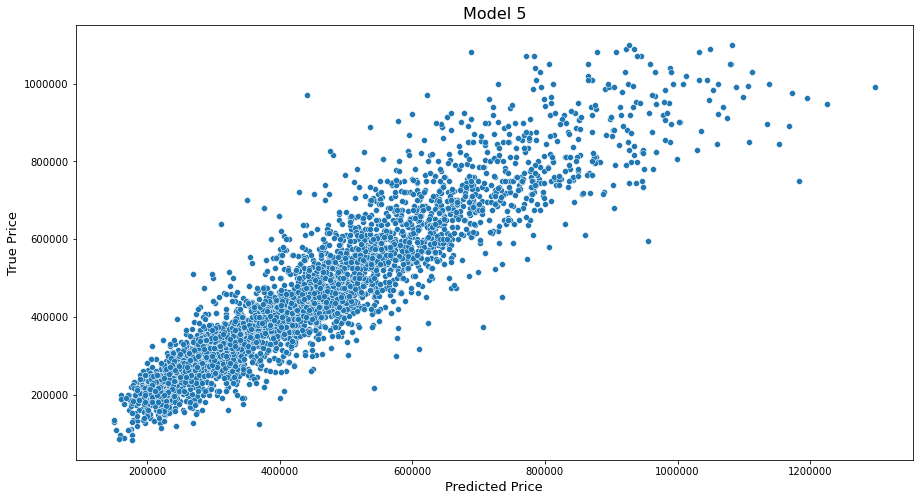

In [96]:
# Creating the y predictions
y_pred_5 = lr.predict(X_test_5)

#Back-transforming the y prediction values since they are in log form and are thus mismatched from the y test values
y_pred_5 = np.exp(y_pred_5)

# Plotting the y predictions against the y test
plt.figure(figsize=(15,8))
ax = sns.scatterplot(y_pred_5, y_test)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Predicted Price', fontsize=13)
plt.ylabel('True Price', fontsize=13)
plt.title('Model 5', fontsize=16);

In [97]:
# Looking at errors
MAE = mean_absolute_error(y_test, y_pred_5)
print('Mean Absolute Error =', MAE,'USD')

RMSE = mean_squared_error(y_test, y_pred_5, squared = False)
print('Root Mean Square Error =', RMSE,'USD')

Mean Absolute Error = 52224.05900004176 USD
Root Mean Square Error = 74017.02821655544 USD


##### Comments about Model 5

The adjusted R-squared for this model is 85.67% which is higher than all the previous models.

Similarly, the errors from this model are lower than all the other models (MAE = 52224.06 USD, RMSE = 74017.03 USD).

This will likely be my final model, but I want to explore one more idea.

_Note_: MAE is still less than the RMSE.

### Model 6

I will redo Train-Test Split and do the same One Hot Encoding and Ordinal Encoding, but I will not One Hot Encode 'zipcode' and then do everything as I did in Model 5.

In [98]:
# Train-Test Split with 70% of the data in the train data and 30% in the test data

# Target variable is price
y = kc_house_df['price']

# Predictor variables are every variable except price
X = kc_house_df.drop(columns=['price'])

X_train_6, X_test_6, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [99]:
# Checking the size of the train data and the test data, respectively
print(len(X_train_6))
print(len(X_test_6))

9118
3909


In [100]:
# Using OneHotEncoder to make columns for each category in 'zipcode' and 'waterfront' for both the train and test data
# I specified drop = 'first' to drop the first column as a way to avoid the dummy variable trap.
# The dropped column will become the reference category
onehot_enc = OneHotEncoder(handle_unknown = 'error', drop = 'first', sparse = False)

# Nominal columns from the dataset
nom_col = ['waterfront', 'month_sold', 'year_sold']

# One Hot Encoding
nom_cats_train = onehot_enc.fit_transform(X_train_6[nom_col])
nom_cats_test = onehot_enc.transform(X_test_6[nom_col])

# Assigning the column names of the dummy variables to columns
columns = onehot_enc.get_feature_names_out()

# Turning the One Hot Encoded data into DataFrames (one for train, one for test)
nom_cats_train = pd.DataFrame(nom_cats_train, columns = columns)
nom_cats_test = pd.DataFrame(nom_cats_test, columns = columns)

# Concating X_train and nom_cats_train to make one large DataFrame and reassigning it to X_train
X_train_6 = pd.concat([X_train_6.reset_index(), nom_cats_train], axis = 1)

# Concating X_test and nom_cats_test to make one large DataFrame and reassigning it to X_test
X_test_6 = pd.concat([X_test_6.reset_index(), nom_cats_test], axis = 1)

In [101]:
# Because I One Hot Encoded 'zipcode' and 'waterfront', I can drop the original 'zipcode' and 'waterfront' columns
# I'll do this to both the train data and the test data

# Dropping 'zipcode' and 'waterfront' from the train data
X_train_6.drop(columns = ['waterfront', 'month_sold', 'year_sold'], inplace = True)

# Dropping 'zipcode' and 'waterfront' from the test data
X_test_6.drop(columns = ['waterfront', 'month_sold', 'year_sold'], inplace = True)

# I can also drop 'index' and 'id' because they are not relevant
X_train_6.drop(columns = ['index', 'id'], inplace = True)
X_test_6.drop(columns = ['index', 'id'], inplace = True)

In [102]:
# Using Ordinal Encoding to make the values of ordinal variables numerical

# Ordinal columns in the dataset
ord_cat_selector = ['view', 'condition', 'grade']

# Creating the train and test subsets that only include the relevant columns
ord_cat_subset_train = X_train_6[ord_cat_selector]
ord_cat_subset_test = X_test_6[ord_cat_selector]

# Correctly ordering the values of the ordinal columns
view_ord = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']
condition_ord = ['Poor', 'Fair', 'Average', 'Good','Very Good']
grade_ord = ['4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent']

# Defining ord_enc using OrdinalEncoder
ord_enc = OrdinalEncoder(categories = [view_ord, condition_ord, grade_ord])

# Ordinal Encoding
ord_enc.fit_transform(ord_cat_subset_train)
ord_enc.transform(ord_cat_subset_test)

# Turning the Ordinal Encoded data into Dataframes (one for train, one for test)
ord_cat_subset_train = pd.DataFrame(ord_enc.transform(ord_cat_subset_train),
                        columns = ord_cat_subset_train.columns)

ord_cat_subset_test = pd.DataFrame(ord_enc.transform(ord_cat_subset_test),
                        columns = ord_cat_subset_test.columns)

# Concating X_train and ord_cat_subset_train to make one large Dataframe and reassigning it to X_train
X_train_6 = pd.concat([X_train_6, ord_cat_subset_train], axis = 1)

# Concating X_test and ord_cat_subset_test to make one large Dataframe and reassigning it to X_test
X_test_6 = pd.concat([X_test_6, ord_cat_subset_test], axis = 1)

In [103]:
#Including only the columns that have numerical values 
#(this is essentially taking out the original 'view', 'condition', and 'grade' columns without dropping them)

X_train_6 = X_train_6.select_dtypes(include='number')
X_test_6 = X_test_6.select_dtypes(include='number')

In [104]:
# Standard scaling all continuous X_train_6 columns

# Instantiating a new scaler
scaler = StandardScaler()

X_train_6[['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']] \
        = scaler.fit_transform \
            (X_train_6[['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']])

In [105]:
# Standard scaling all continuous X_test columns

X_test_6[['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']] \
        = scaler.transform(X_test_6[['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement',
                                   'sqft_living15', 'sqft_lot15']])

In [106]:
# Using np.log to normalize y_train
y_train_log = np.log(y_train)

In [107]:
# Using Polynomial Features to get all the interactions between predictor variables
poly = PolynomialFeatures(2, include_bias = False)

# Adding these interactions to the original X_train_5 and X_test_5 DataFrames
X_train_6 = pd.DataFrame(poly.fit_transform(X_train_6), columns = poly.get_feature_names_out())
X_test_6 = pd.DataFrame(poly.transform(X_test_6), columns = poly.get_feature_names_out())

In [108]:
# Creating new DataFrames that only include the interactions
X_train_6_interactions = X_train_6.iloc[:, 31:]
X_test_6_interactions = X_test_6.iloc[:, 31:]

In [109]:
# Fitting just X_train_6_interactions rather than X_train_6 solely so I can see the coefficients of these interactions
# and determine which are the strongest

lr = LinearRegression()

lr.fit(X_train_6_interactions, y_train_log)

LinearRegression()

In [110]:
###### Checking the coefficients of just the interactions
model_6_coefs = lr.coef_

# Highest coefficients (strongest interactions)
model_6_coefs_w_labels_strongest = sorted(list(zip(model_6_coefs, X_train_6_interactions.columns)), 
                                          reverse = True)[0:10]
model_6_coefs_w_labels_strongest

# 'bedrooms' x 'sqft_living' has the highest coefficient by far, so I will only include this interaction in my model

[(16206.442514107128, 'bedrooms sqft_living'),
 (687.9187094847857, 'sqft_living zipcode'),
 (536.8104863865832, 'bedrooms yr_renovated'),
 (238.07147510443573, 'bathrooms sqft_living'),
 (21.088503082157107, 'month_sold_8^2'),
 (15.842579300096247, 'sqft_above yr_built'),
 (13.283876333187353, 'month_sold_7^2'),
 (9.00420511690254, 'sqft_basement yr_built'),
 (8.358546335255804, 'month_sold_10^2'),
 (8.003605893369405, 'waterfront_YES grade')]

In [111]:
X_train_6.iloc[:, 33:]
X_test_6.iloc[:, 33:]

#'bedroom sqft_living' is at column index 33

bedrooms sqft_living  bedrooms sqft_lot  bedrooms floors  \
0                 -1.09291           -1.72862          3.00000   
1                  4.95881            7.01064          5.00000   
2                 -2.07737           -2.65603          4.00000   
3                  4.26739           -2.69769          6.00000   
4                 -3.90054            2.93778          3.00000   
...                    ...                ...              ...   
3904               3.85207            9.25061          6.00000   
3905               4.64386            0.78031          4.00000   
3906               3.02143           -2.86014          6.00000   
3907              -3.16220            3.98533          3.00000   
3908               0.64450            1.07031          4.00000   

      bedrooms sqft_above  bedrooms sqft_basement  bedrooms yr_built  \
0                -2.31252                 2.10294         3856.00000   
1                -0.51343                 9.82237         9855.00000   
2                -1.36902                -1.32773         4010.00000   
3                 5.49446                -1.99160         6027.00000   
4                -2.85551                -1.99160         5907.00000   
...                   ...                     ...                ...   
3904              5.06989                -1.99160         5991.00000   
3905              0.53275                 7.41523         7908.00000   
3906              4.22074                -1.99160         6021.00000   
3907             -2.10071                -1.99160         5880.00000   
3908             -3.99605                 8.18990         7784.00000   

      bedrooms yr_renovated  bedrooms zipcode  bedrooms lat  bedrooms long  \
0                   0.00000      196110.00000      94.97140     -244.40000   
1                   0.00000      490030.00000     237.84800     -610.63500   
2                   0.00000      196076.00000      94.70020     -244.04000   
3                   0.00000      294057.00000     143.20440     -365.89800   
4                   0.00000      294096.00000     142.13700     -366.87000   
...                     ...               ...           ...            ...   
3904                0.00000      294222.00000     142.96200     -366.26400   
3905                0.00000      392108.00000     190.26360     -488.35600   
3906                0.00000      294156.00000     143.09610     -366.28800   
3907                0.00000      294594.00000     142.26330     -366.87000   
3908                0.00000      392500.00000     190.93040     -489.16400   

      ...  year_sold_2015^2  year_sold_2015 view  year_sold_2015 condition  \
0     ...           0.00000              0.00000                   0.00000   
1     ...           1.00000              0.00000                   3.00000   
2     ...           1.00000              0.00000                   2.00000   
3     ...           0.00000              0.00000                   0.00000   
4     ...           0.00000              0.00000                   0.00000   
...   ...               ...                  ...                       ...   
3904  ...           0.00000              0.00000                   0.00000   
3905  ...           0.00000              0.00000                   0.00000   
3906  ...           0.00000              0.00000                   0.00000   
3907  ...           0.00000              0.00000                   0.00000   
3908  ...           0.00000              0.00000                   0.00000   

      year_sold_2015 grade  view^2  view condition  view grade  condition^2  \
0                  0.00000 0.00000         0.00000     0.00000      4.00000   
1                  4.00000 0.00000         0.00000     0.00000      9.00000   
2                  2.00000 0.00000         0.00000     0.00000      4.00000   
3                  0.00000 0.00000         0.00000     0.00000      4.00000   
4                  0.00000 0.00000         0.00000     0.00000      4.00000   


In [112]:
# Dropping all the interaction columns from X_train_6 except for 'bedrooms sqft_living'

# Dropping all columns after index 33
X_train_6 = X_train_6.iloc[:, :34]
X_test_6 = X_test_6.iloc[:, :34]

# Dropping columns between index 30 and index 33 (i.e., dropping 'bedrooms^2' and 'bedrooms bathrooms')
X_train_6 = X_train_6.drop(columns = ['bedrooms^2','bedrooms bathrooms'])
X_test_6 = X_test_6.drop(columns = ['bedrooms^2','bedrooms bathrooms'])

In [113]:
# I am also going to drop 'sqft_basement' as the zeros for the absence of a basement is likely skewing the data,
# and I will keep the boolean 'basement' column that I made earlier

X_train_6 = X_train_6.drop(columns = ['sqft_basement'])
X_test_6 = X_test_6.drop(columns =['sqft_basement'])

In [114]:
# Similarly, I will also drop 'yr_renovated' as the zeros for no renovation are likely skewing the data
# As I did with models 4 and 5, I will make a boolean 'renovations' column 'where a value of 1 means that 
# the house has been renovated, and a value of 0 means that the house has not been renovated

X_train_6.loc[X_train_6['yr_renovated'] == 0, 'renovations'] = 0
X_train_6.loc[X_train_6['yr_renovated'] != 0, 'renovations'] = 1

X_test_6.loc[X_test_6['yr_renovated'] == 0, 'renovations'] = 0
X_test_6.loc[X_test_6['yr_renovated'] != 0, 'renovations'] = 1


# Now dropping 'yr_renovated' because I made the new 'renovations' column
X_train_6 = X_train_6.drop(columns = ['yr_renovated'])
X_test_6 = X_test_6.drop(columns = ['yr_renovated'])

In [115]:
# Now fitting my X_train_6 model

lr.fit(X_train_6, y_train_log)

LinearRegression()

In [116]:
# Checking the R-squared of Model 6
r_squared = lr.score(X_train_6, y_train_log)
r_squared

0.7240206889147007

In [117]:
# Calculating the Adjusted R-squared for Model 6
adj_r2 = 1 - (1-r_squared) * ((len(y)-1)/(len(y)-X_train_6.shape[1]-1))
adj_r2

0.7233623311891413

In [118]:
# Checking for overfitting

#Have to turn y_test into log form to check the score
y_test_log = np.log(y_test)

r_squared = lr.score(X_test_6, y_test_log)
r_squared

# Confirmed not overfit

0.7349791449964415

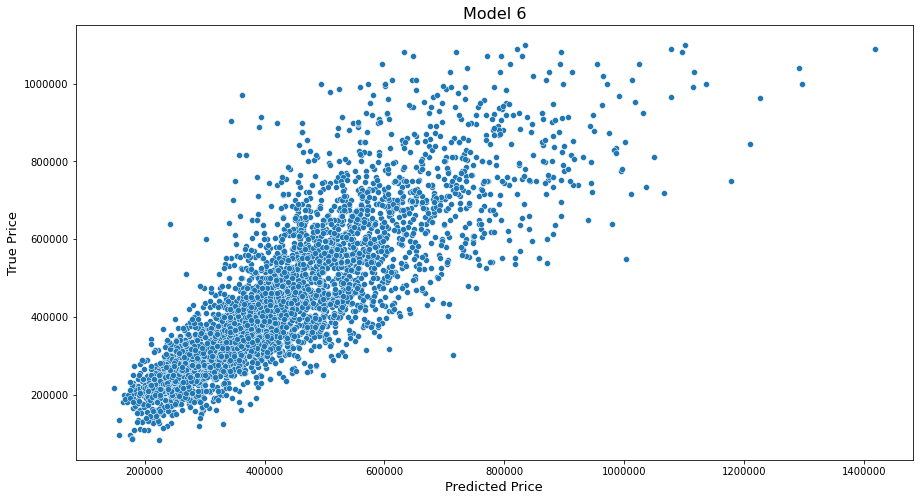

In [119]:
# Creating the y predictions
y_pred_6 = lr.predict(X_test_6)

#Back-transforming the y prediction values since they are in log form and are thus mismatched from the y test values
y_pred_6 = np.exp(y_pred_6)

# Plotting the y predictions against the y test
plt.figure(figsize=(15,8))
ax = sns.scatterplot(y_pred_6, y_test)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Predicted Price', fontsize=13)
plt.ylabel('True Price', fontsize=13)
plt.title('Model 6', fontsize=16);

In [120]:
# Looking at errors
MAE = mean_absolute_error(y_test, y_pred_6)
print('Mean Absolute Error =', MAE,'USD')

RMSE = mean_squared_error(y_test, y_pred_6, squared = False)
print('Root Mean Square Error =', RMSE,'USD')

Mean Absolute Error = 77690.84926403085 USD
Root Mean Square Error = 108126.59157047242 USD


##### Comments on Model 6

The adjusted R-Squared is 72.34%

The errors (MAE and RMSE) are much higher than those of Model 5.

Therefore, the decision to not One Hot Encode 'zipcode' resulted in a weaker model than when it was encoded.

**This tells me that I should stick to Model 5.**

### Model 7: Final Touches on Model 5

In [121]:
X_train_7 = X_train_5
X_test_7 = X_test_5

In [122]:
# Dropping 'year_sold_2015' because it is irrelevant to the stakeholder 
# even though it will likely increase error and decrease adjusted R-squared a bit

X_train_7 = X_train_7.drop(columns = ['year_sold_2015'])
X_test_7 = X_test_7.drop(columns = ['year_sold_2015'])

In [123]:
lr = LinearRegression()

lr.fit(X_train_7, y_train_log)

LinearRegression()

In [124]:
r_squared = lr.score(X_train_7, y_train_log)
r_squared

0.8562019423826922

In [125]:
adj_r2 = 1 - (1-r_squared) * ((len(y)-1)/(len(y)-X_train_7.shape[1]-1))
adj_r2

0.855100680859979

In [126]:
# Checking for overfitting

#Have to turn y_test into log form to check the score
y_test_log = np.log(y_test)

r_squared = lr.score(X_test_7, y_test_log)
r_squared

# Confirmed not overfit

0.857925324000624

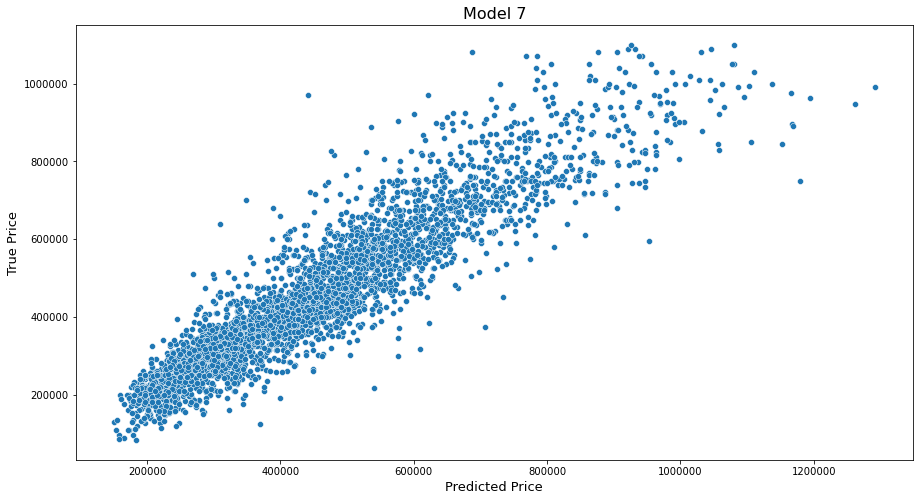

In [127]:
# Creating the y predictions
y_pred_7 = lr.predict(X_test_7)

#Back-transforming the y prediction values since they are in log form and are thus mismatched from the y test values
y_pred_7 = np.exp(y_pred_7)

# Plotting the y predictions against the y test
plt.figure(figsize=(15,8))
ax = sns.scatterplot(y_pred_7, y_test)
#ax.set(xlabel='Predicted Price', ylabel='True Price', title = 'Model 7')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Predicted Price', fontsize=13)
plt.ylabel('True Price', fontsize=13)
plt.title('Model 7', fontsize=16);

In [128]:
# Looking at errors
MAE = mean_absolute_error(y_test, y_pred_7)
print('Mean Absolute Error =', MAE,'USD')

RMSE = mean_squared_error(y_test, y_pred_7, squared = False)
print('Root Mean Square Error =', RMSE,'USD')

Mean Absolute Error = 52423.2178468942 USD
Root Mean Square Error = 74226.45065296389 USD


##### Comments on Model 7

The adjusted R-squared is 85.51%, and the errors (MAE and RMSE) are 52423.22 USD and 74226.45 USD, respectively.

Although the errors were slightly lower in Model 5, I believe that the removal of 'year_sold_2015' was necessary for the simplicity of my model. In other words, this risk of a bit more error allowed for a more applicable and interpretable model (i.e., it does not make sense for the stakeholder to be concerned about whether a house was sold in 2014 or 2015, given that this is a predictive model to be used for predicting the price of a house that has not been sold yet).

## Regression Results of Final Model: Model 7

In this section, I evaluate my model under the 4 assumptions of linear regression, interpret the coefficients with the strongest impact on price, and test the model using mock stakeholder inputs and an example from the test data.

The 4 assumptions of linear regression are as follows:
* Linearity
* Independence (Multicollinearity)
* Normality (of residuals)
* Equal Variance (Homoscedasticity)

In [129]:
lr = LinearRegression()

lr.fit(X_train_7, y_train_log)

y_train_7_preds = lr.predict(X_train_7)
y_test_7_preds = lr.predict(X_test_7)

#y_test_7_preds is in log form
#y_train_log is in log form
#y_test was never in log form

### Plotting predictions vs. test data and checking for linearity

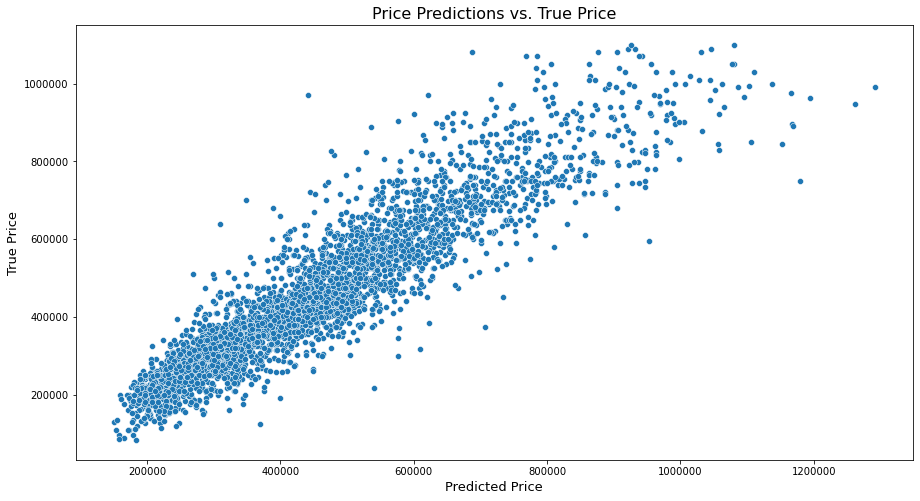

In [130]:
#Need to convert y_test_7_preds back to exponential form

plt.figure(figsize=(15,8))
ax = sns.scatterplot(np.exp(y_test_7_preds), y_test)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Predicted Price', fontsize=13)
plt.ylabel('True Price', fontsize=13)
plt.title('Price Predictions vs. True Price', fontsize=16);

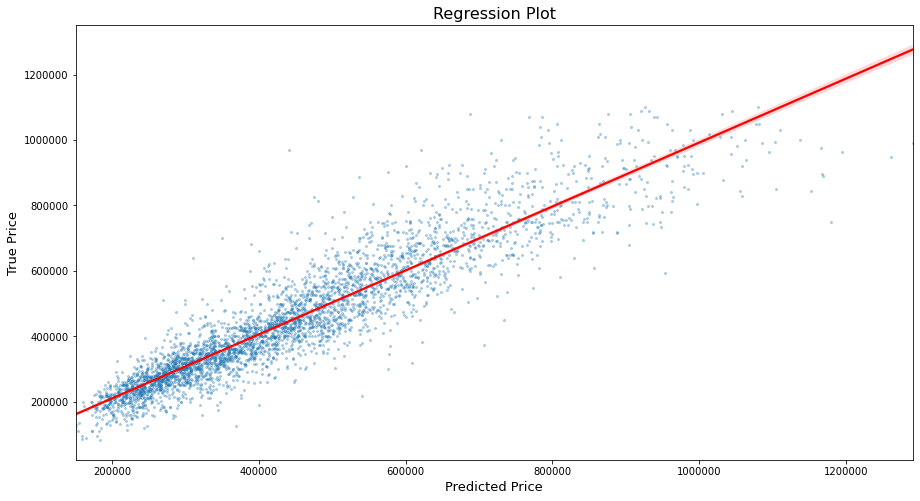

In [131]:
#Need to convert y_test_7_preds back to exponential form

fig, ax = plt.subplots(figsize=(15, 8))
sns.regplot(ax = ax, 
            x = np.exp(y_test_7_preds), 
            y = y_test,
            scatter_kws={'s':4, 'alpha': 0.3},
            line_kws={'color': 'red'})
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Predicted Price', fontsize=13)
plt.ylabel('True Price', fontsize=13)
plt.title('Regression Plot', fontsize=16);


#### Comments about linearity

The regression plot shows an overall linear relationship between the true price values and the predicted price values, which indicates that the model is relatively accurate.

### Checking for independence (multicollinearity)

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Checking multicollinearity using VIF (Variance Inflation Factor)
# A value of 5 or higher indicates that multicollinearity with the given variable exists

vif = [variance_inflation_factor(X_train_7.values, i) for i in range(X_train_7.shape[1])]

vif_series = pd.Series(vif, index=X_train_7.columns, name="Variance Inflation Factor")
print(f"Count:  {len(vif_series.loc[vif_series > 5])}")
vif_series.loc[vif_series > 5]

Count:  49


bedrooms                      33.54126
bathrooms                     32.72590
sqft_living                22212.00498
floors                        26.63794
sqft_above                 25896.99499
yr_built                   16400.90583
lat                      8828758.29845
long                     8733460.56626
sqft_lot15                     5.19497
basement                       7.20291
zipcode_98006                  8.78612
zipcode_98008                  9.92825
zipcode_98011                 10.24328
zipcode_98019                  9.71078
zipcode_98027                  7.39773
zipcode_98028                 13.82690
zipcode_98029                 11.18259
zipcode_98033                 14.45802
zipcode_98034                 25.20513
zipcode_98052                 22.43369
zipcode_98053                 13.45123
zipcode_98056                  7.16678
zipcode_98058                  5.12650
zipcode_98059                  7.05599
zipcode_98065                 10.40041
zipcode_98072            

#### Comments about multicollinearity

49 of the 99 features in the final model have a VIF value of > 5, which indicates that for each of these variables, multicollinearity with another variable(s) exists. While this is problematic, it is important to note that I was aware of some of the high correlations between predictors in my model (as seen in Model 2), but due to the decreased error that occurred with the inclusion of such predictors, I decided to keep them in my final model. Similarly, with the incorporation of polynomial features, multicollinearity is expected, but again, the inclusion of these features decreased the error of my final model. 

Additionally, some of the predictors in my models are inherently related, such as latitude, longitude, and various zip codes, as well as the square footage of the whole house and the square footage of the house above ground (i.e., not including the basement)

Nevertheless, multicollinearity is a violation of one of the 4 assumptions of linear regression, and therefore, it is crucial to proceed with caution when drawing conclusions on the basis of these predictors.

### Checking for a normal distribution of residuals

In [133]:
# Need to convert y_test_7_preds back to the original form

test_7_residuals = np.exp(y_test_7_preds) - y_test

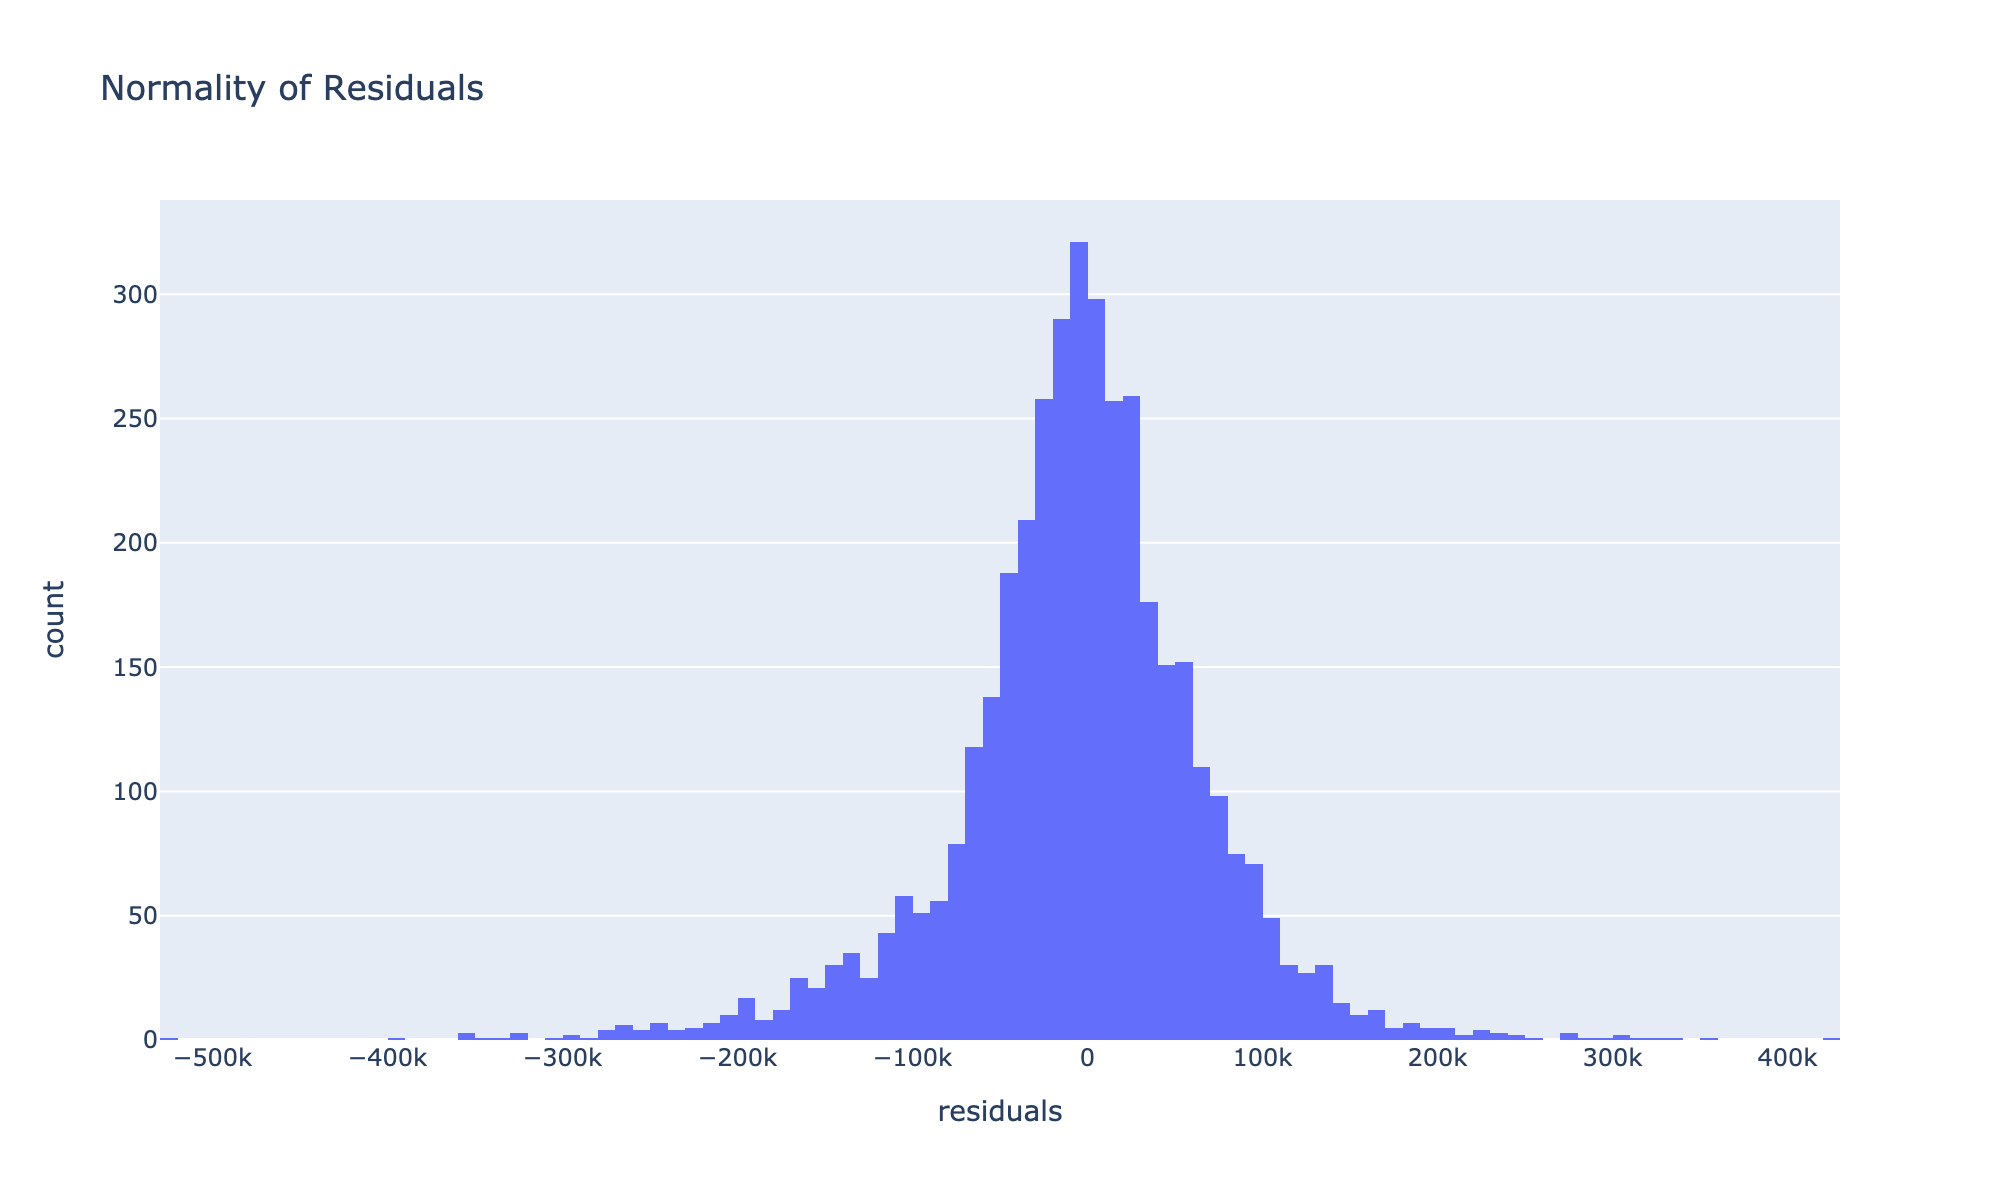

In [134]:
fig = px.histogram(x = test_7_residuals, title = "Normality of Residuals", labels = {'x':'residuals'})

# Converting the visualizations to an image, so it displays in GitHub
img_bytes = fig.to_image(format="png", width=1000, height=600, scale=2)
Image(img_bytes)

# residuals appear normal

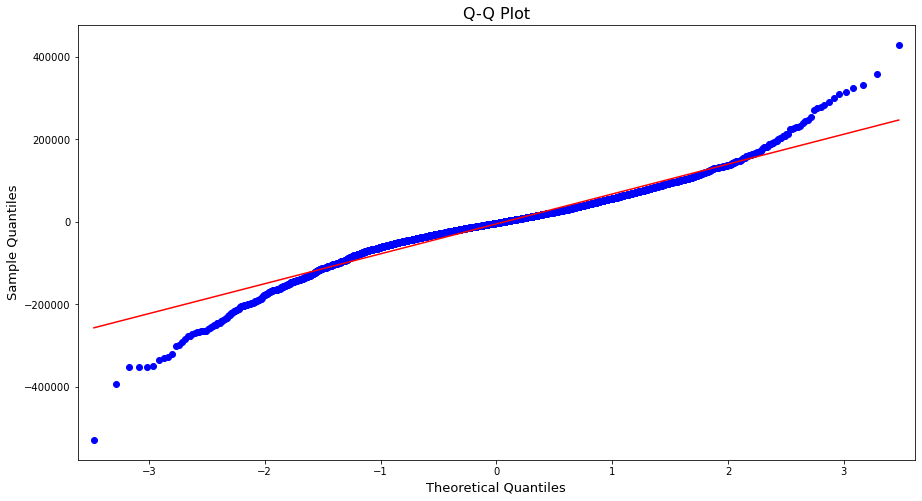

In [135]:
fig, ax = plt.subplots(figsize=(15,8))

fig = sm.qqplot(test_7_residuals, line = 'r', ax = ax)
plt.xlabel('Theoretical Quantiles', fontsize=13)
plt.ylabel('Sample Quantiles', fontsize=13)
plt.title('Q-Q Plot', fontsize=16);

# the q-q plot also indicates the normality of residuals

#### Comments about the normality of residuals

Both the distribution plot and Q-Q plot indicate that the residuals are normally distributed (bell-shaped), and thus, the model does not violate the assumption of normality.

### Plotting residuals and checking for homoscedasticity

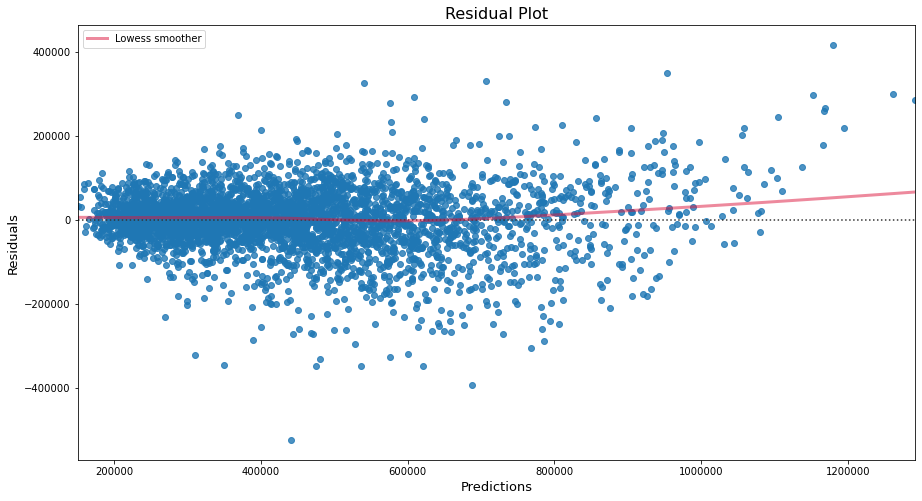

In [136]:
plt.figure(figsize=(15,8))

ax = sns.residplot(np.exp(y_test_7_preds), test_7_residuals, lowess = True, 
                   line_kws={'color': 'crimson', 'alpha': 0.5, 'lw': 3, 'label':'Lowess smoother'})

plt.xlabel('Predictions', fontsize=13)
plt.ylabel('Residuals', fontsize=13)
plt.title('Residual Plot', fontsize=16)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.legend()
plt.show()

# Overall, the residuals appear homoscedastic 
# (i.e., the relationship appears linear, and overall, there is no fanning of the points)

#### Comments about homoscedasticity

This residual plot indicates that overall the residuals are homoscedastic (i.e., the relationship appears linear, and for the most part, there is no fanning of the points). Nevertheless, it is significant to note that as the price predictions increase past the price of around 850,000 USD, the points begin to fan out, indicating a potential problem. Therefore, when the model predicts a price larger than 850,000 USD, it is important to take into account this shortcoming of the model.

### Graphing the top two predictors with the largest impact on price based on coefficients

In [137]:
coefficients_cols = sorted(list(zip(lr.coef_, X_train_7.columns)), reverse = True)
coefficients_cols_no_zip = []

for x in coefficients_cols:
    if x[1].startswith('z') == False:
        coefficients_cols_no_zip.append(x)
        
coefficients_cols_no_zip

[(0.5150331406774638, 'waterfront_YES'),
 (0.1995003789586004, 'lat'),
 (0.0840984036464734, 'month_sold_4'),
 (0.07532505323229777, 'grade'),
 (0.0601597165519937, 'view'),
 (0.057265803406728155, 'month_sold_3'),
 (0.056664168374329305, 'condition'),
 (0.04317355975248849, 'sqft_living15'),
 (0.04162248467253679, 'basement'),
 (0.0407157022941155, 'bathrooms'),
 (0.03529138715124197, 'month_sold_2'),
 (0.03250042070682302, 'month_sold_5'),
 (0.01831316356715984, 'month_sold_6'),
 (0.014601388428306272, 'month_sold_7'),
 (0.012226681312104908, 'sqft_lot'),
 (0.01013391575035677, 'month_sold_8'),
 (0.004557707333395583, 'month_sold_11'),
 (0.003815841242739829, 'bedrooms'),
 (0.0005610776713419474, 'sqft_above yr_built'),
 (5.6723566400393444e-05, 'sqft_basement yr_built'),
 (0.0, 'renovations'),
 (-0.0004895450496702203, 'yr_built'),
 (-0.0007238758420557989, 'month_sold_12'),
 (-0.0011100532064102775, 'month_sold_10'),
 (-0.0012326002426048394, 'sqft_lot15'),
 (-0.001733527157129322,

In [138]:
# Interpreting the 'waterfront_YES' coefficient
# Because the target variable has been log-transformed, I need to interpret the coefficient in a specific way
# To do so, I take the exponential value of the coefficient, subtract one, then multiply it by 100
(np.exp(0.5150331406774638) - 1)*100

67.3693968230401

In [139]:
# Interpreting the 'sqft_above' coefficient in the same way I did for 'waterfront_YES'
(np.exp(-0.8271146255866375) - 1)*100

-56.26907313384979

In [140]:
# Interpreting the 'lat' coefficient in the same way
(np.exp(0.1995003789586004) - 1)*100

22.079267206078647

In [141]:
# Interpreting the 'long' coefficient in the same way
(np.exp(-0.21246982394044067) - 1)*100

-19.141528414614584

##### Comments about the coefficients

Based on this data, the predictors with the greatest impact on price are 'waterfront_YES' and 'sqft_above'.

**'waterfront_YES'**: 'waterfront_YES' has a positive correlation with 'price'. Since 'waterfront_YES' is a categorical variable, the interpretation is as follows: Compared to houses that are not on a waterfront, we see an associated increase of about 67.37% in price for houses that _are_ on a waterfront.

**'sqft_above'**: Oddly, 'sqft_above' has a negative impact on 'price', meaning that when 'sqft_above' goes up, 'price' goes down and vice versa. One would think that the price of a house would increase the square footage of the house (excluding the basement) increases. After reviewing my models, I traced this strange finding back to after I included interactions in my model - one of which includes 'sqft_above'. I am not sure as to why this occurred, but given that my error decreased after I incorporated these interactions, I am going to assume that such a finding is accurate. Perhaps this means that the size of a house is not the primary indicator of price. Maybe it is more dependent on location or the amount of land?

Nevertheless, in technical terms, the coefficient of 'sqft_above' means that for every increase in 1 standard deviation of 'sqft_above', 'price' decreases by 56.27%.

**'lat' and 'long'**: Since the finding regarding 'sqft_above' is complex, I will be focusing on the next most impactful predictors: 'lat' and 'long'. While 'lat' and 'price' have a positive relationship, 'long' and 'price' have a negative relationship. This means that as the latitude goes up and the longitude goes down, the price goes up, and as the latitude goes down and the longitude goes up, the price goes down. 

In technical terms, the coefficient of 'lat' means that for every increase in 1 standard deviation of 'lat', 'price' increases by 22%. Similarly, for every increase in 1 standard deviation of 'long', 'price' decreases by 19.14%.

_Note_: An increase in latitude means going more north, and an increase in longitude means going more east. Therefore, the most expensive houses should be in the northwest of King County, and the least expensive houses should be in the southeast of King County.


##### Visualizing the relationship between 'waterfront' and 'price'

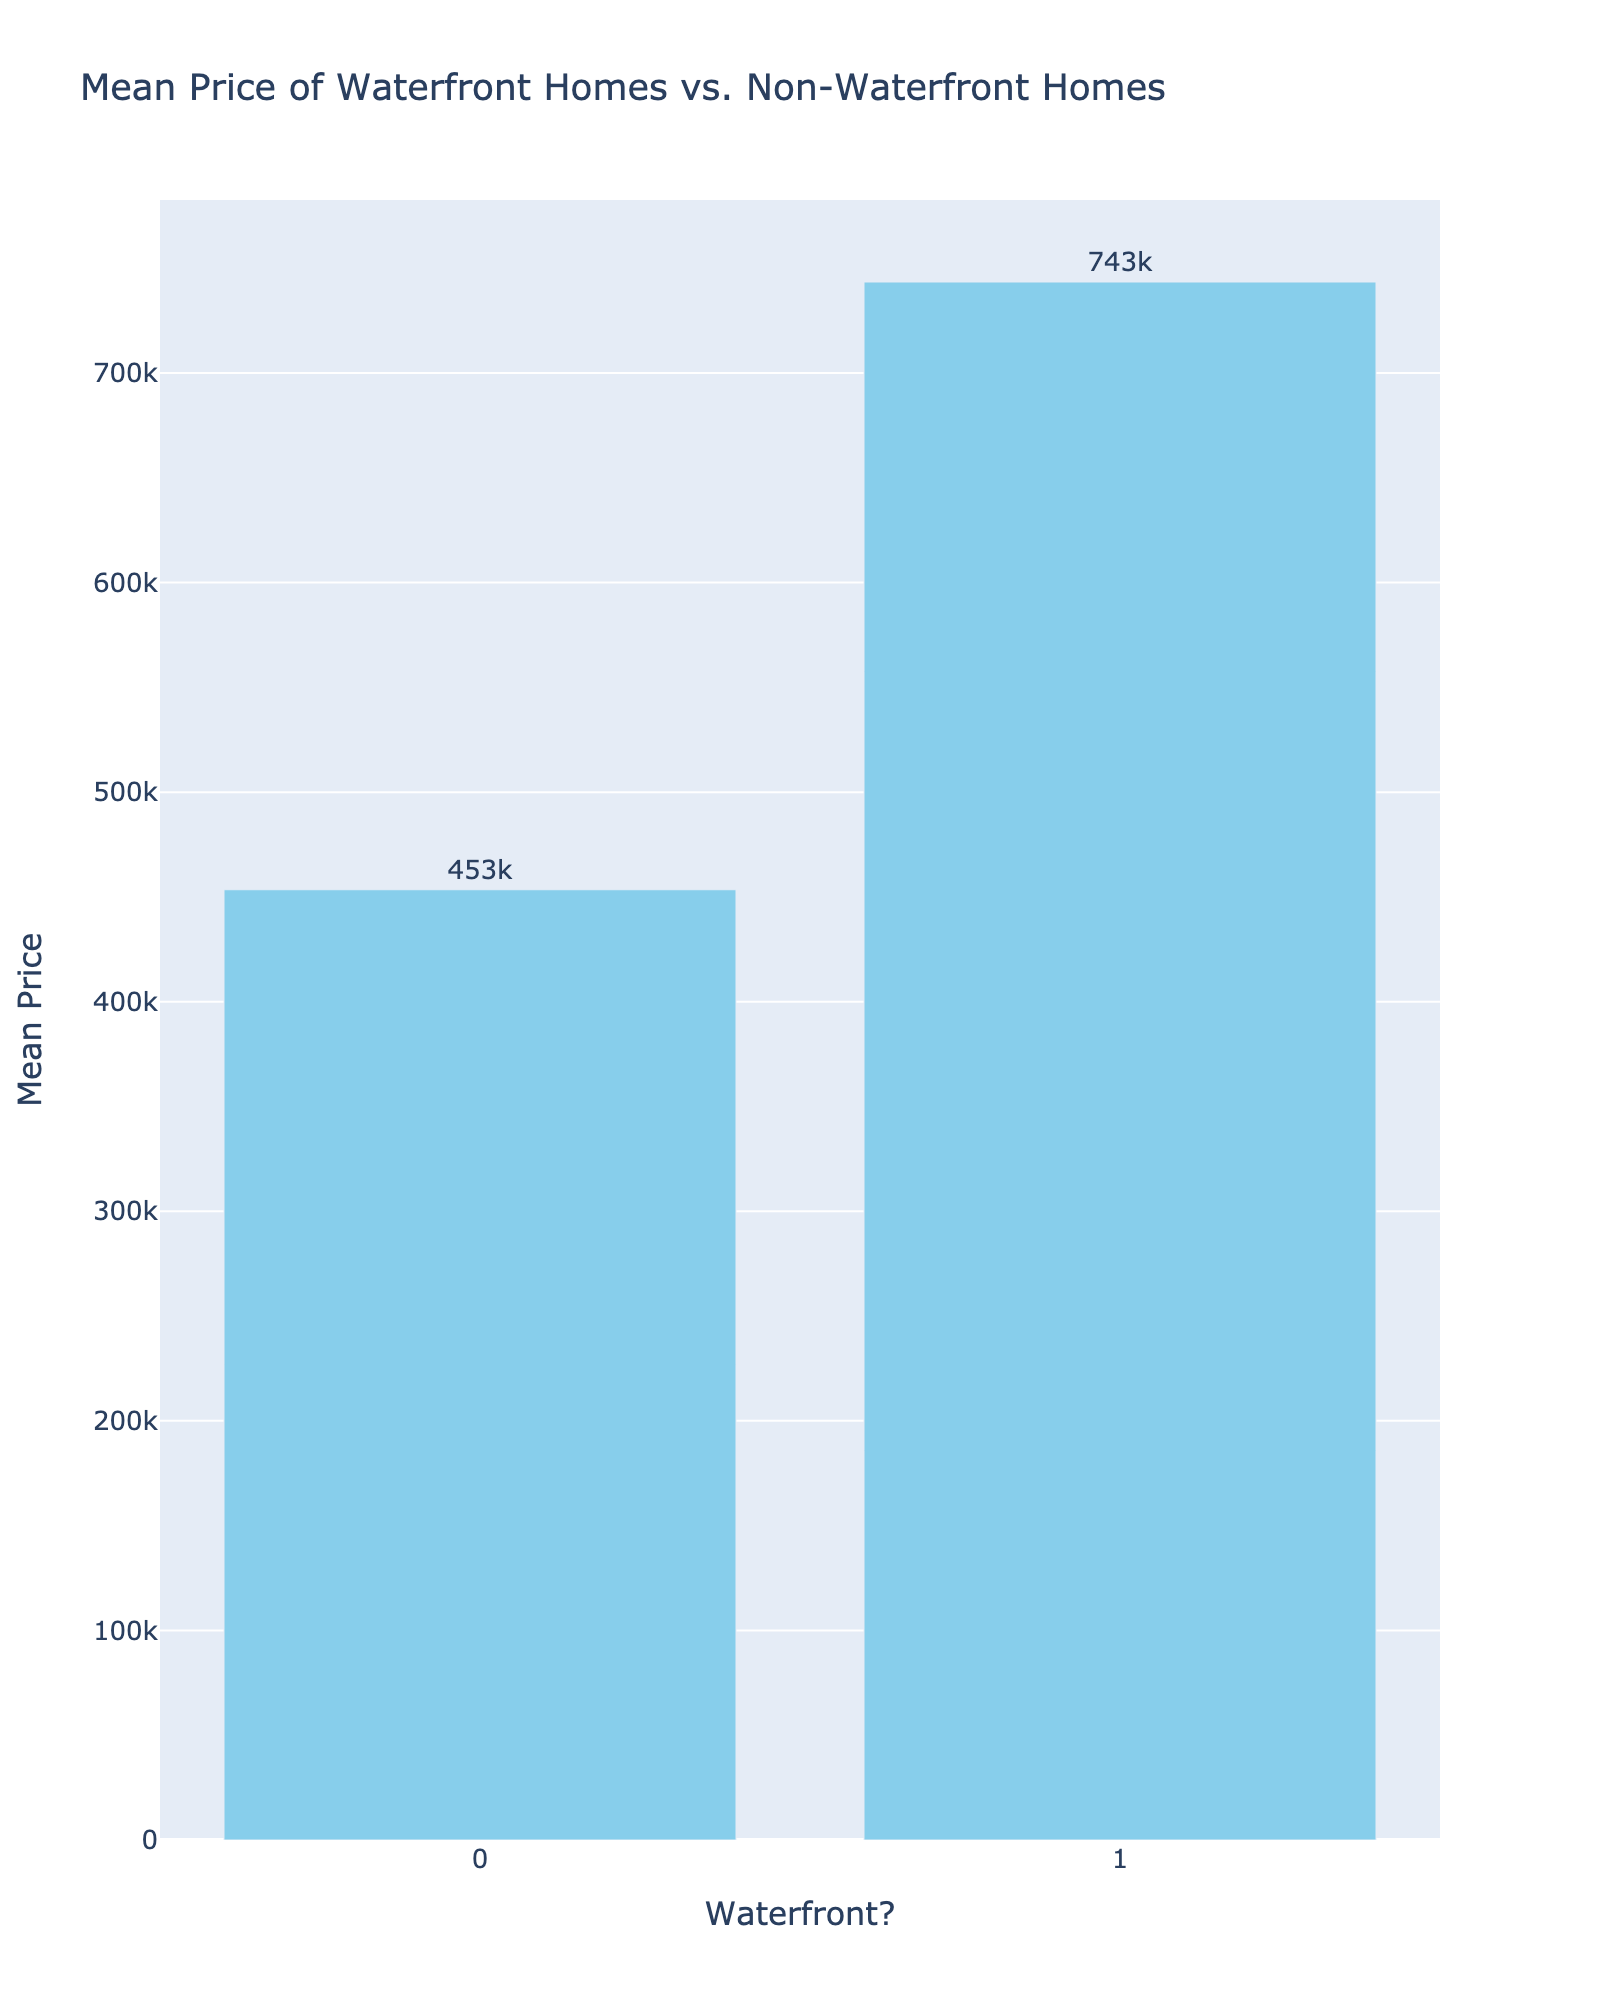

In [142]:
# Selecting 'waterfront_YES' from X_train_7 and making a DataFrame
waterfront = X_train_7['waterfront_YES']

# Creating a DataFrame of the price from y_train_log
price = pd.DataFrame(np.exp(y_train_log))
price = price.reset_index()

# Concating lat_long and price
waterfront_price = pd.concat([waterfront, price], axis = 1)

no_mean = waterfront_price.groupby('waterfront_YES')['price'].mean()[0]
yes_mean = waterfront_price.groupby('waterfront_YES')['price'].mean()[1]

percent_increase = ((yes_mean - no_mean)/no_mean) * 100 # 63.95%

waterfront_price = pd.DataFrame(waterfront_price.groupby('waterfront_YES')['price'].mean())

waterfront_price = waterfront_price.rename(columns = {'price': 'Mean Price'})
waterfront_price = waterfront_price.rename_axis('Waterfront?')

fig = px.bar(waterfront_price, waterfront_price.index, waterfront_price['Mean Price'], text = 'Mean Price',
             title='Mean Price of Waterfront Homes vs. Non-Waterfront Homes', height = 800, width = 1000)

# Formating the text and color of the graph
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside', marker_color='skyblue')
fig.update_layout(font=dict(size=13), showlegend = False)
fig.update_xaxes(nticks=3)

# Converting the visualizations to an image, so it displays in GitHub
img_bytes = fig.to_image(format="png", width=800, height=1000, scale=2)
Image(img_bytes)

# A 67.37% increase in the mean price of houses not on a waterfront results in a value very close
# to the mean price of houses that are on a waterfront

# More specifically, the percent increase from the mean price of houses not on a waterfront 
# to the mean of houses that are on a waterfront is 63.95%

##### Visualizing the relationships between 'lat', 'long', and 'price'

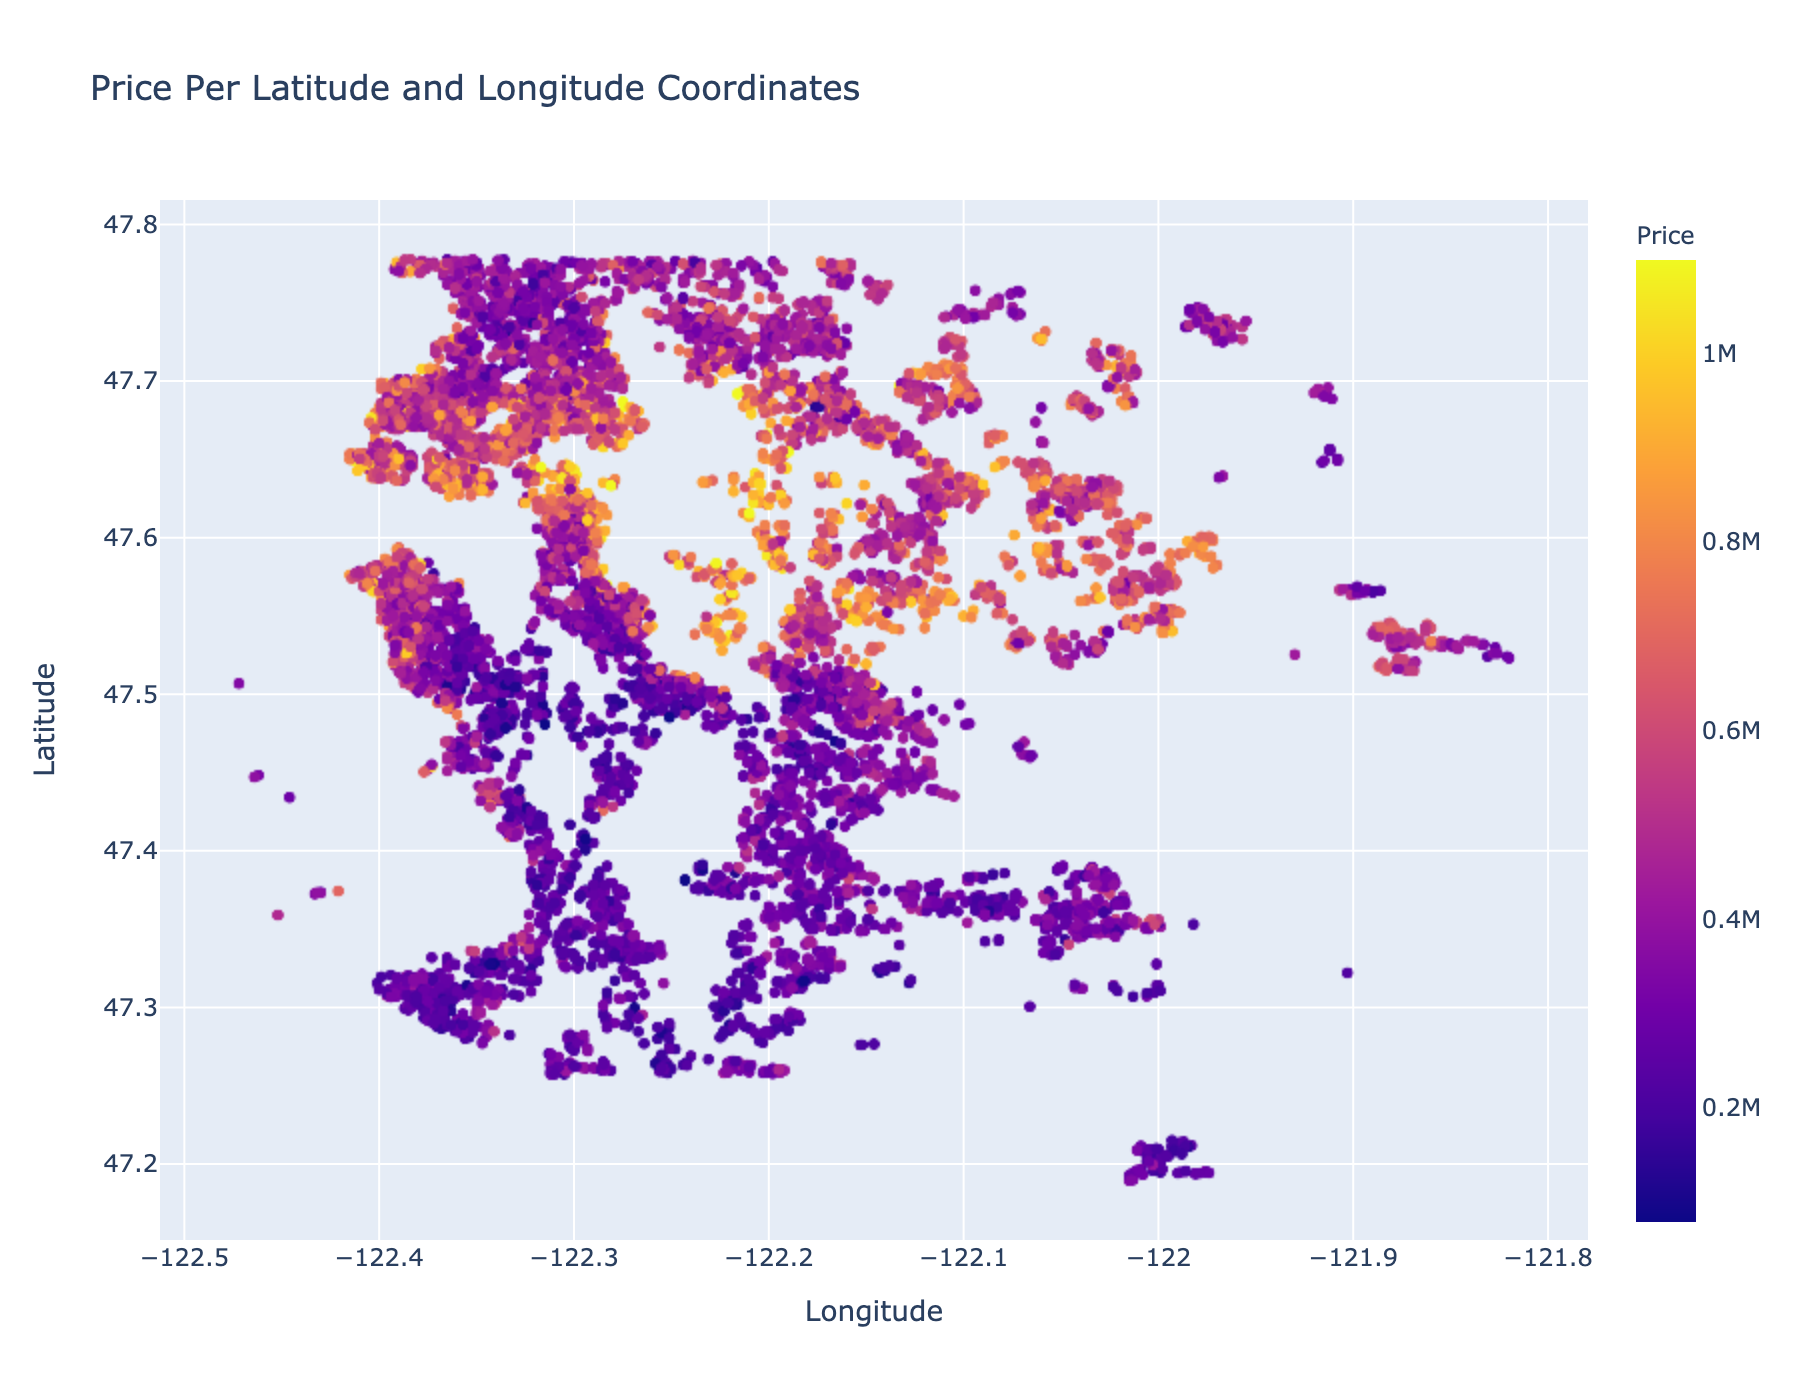

In [143]:
# Selecting 'lat' and 'long' from X_train_7 and making a DataFrame
lat_long = pd.DataFrame(X_train_7[['lat','long']])

# Creating a DataFrame of the price from y_train_log
price = pd.DataFrame(np.exp(y_train_log))
price = price.reset_index()

# Concating lat_long and price
lat_long_price_ = pd.concat([lat_long, price], axis = 1)

# Graphing latitude and longitude and coloring the markers based on price
fig = px.scatter(lat_long_price_, 'long', 'lat', height = 700, color = 'price', 
                 labels = {'lat':'Latitude', 'long': 'Longitude', 'price': 'Price'},
                 title = 'Price Per Latitude and Longitude Coordinates')

# Converting the visualizations to an image, so it displays in GitHub
img_bytes = fig.to_image(format="png", width =  900, height = 700, scale=2)
Image(img_bytes)

### Testing the model using an example input from the test data

In [144]:
# Selecting an entry from the test data
examp_idx = 8
single_examp = X_test_7.iloc[examp_idx].values

In [145]:
# Reshaping the entry into a 2D array and predicting the price
np.exp(lr.predict((single_examp.reshape(1,-1))))

array([220949.05748575])

In [146]:
# Looking at the actual price for this entry
y_test.iloc[examp_idx]

# The predicted price value is very close to the true price value as it is only off by a little over 4,000 dollars

224975.0

### Testing the model using mock stakeholder input

In [147]:
# Using this entry as a comparison
kc_house_df.iloc[2]

id                1954400510
price           510000.00000
bedrooms                   3
bathrooms            2.00000
sqft_living             1680
sqft_lot                8080
floors               1.00000
waterfront                NO
view                    NONE
condition            Average
grade                 8 Good
sqft_above              1680
sqft_basement        0.00000
yr_built                1987
yr_renovated         0.00000
zipcode                98074
lat                 47.61680
long              -122.04500
sqft_living15           1800
sqft_lot15              7503
month_sold                 2
year_sold               2015
basement                   0
Name: 4, dtype: object

In [148]:
# Building a dictionary of the inputs above as if they were the stakeholder inputs
# To see how well the model replicates the true price
stakeholder_dict = {'bedrooms': 3, 'bathrooms': 2, 'sqft_living': 1680, 'sqft_lot': 8080, 'floors': 1,
       'sqft_above': 1680, 'yr_built': 1987, 'lat': 47.61680, 'long': -122.04500, 'sqft_living15': 1800, 
        'sqft_lot15': 7503, 'basement': 0, 'zipcode_98002': 0, 'zipcode_98003': 0, 'zipcode_98004': 0,
       'zipcode_98005': 0, 'zipcode_98006': 0, 'zipcode_98007': 0, 'zipcode_98008': 0,
       'zipcode_98010': 0, 'zipcode_98011': 0, 'zipcode_98014': 0, 'zipcode_98019': 0,
       'zipcode_98022': 0, 'zipcode_98023': 0, 'zipcode_98024': 0, 'zipcode_98027': 0,
       'zipcode_98028': 0, 'zipcode_98029': 0, 'zipcode_98030': 0, 'zipcode_98031': 0,
       'zipcode_98032': 0, 'zipcode_98033': 0, 'zipcode_98034': 0, 'zipcode_98038': 0,
       'zipcode_98039': 0, 'zipcode_98040': 0, 'zipcode_98042': 0, 'zipcode_98052': 0,
       'zipcode_98053': 0, 'zipcode_98055': 0, 'zipcode_98056': 0, 'zipcode_98058': 0,
       'zipcode_98059': 0, 'zipcode_98065': 0, 'zipcode_98070': 0, 'zipcode_98072': 0,
       'zipcode_98074': 1, 'zipcode_98075': 0, 'zipcode_98077': 0, 'zipcode_98092': 0,
       'zipcode_98102': 0, 'zipcode_98103': 0, 'zipcode_98105': 0, 'zipcode_98106': 0,
       'zipcode_98107': 0, 'zipcode_98108': 0, 'zipcode_98109': 0, 'zipcode_98112': 0,
       'zipcode_98115': 0, 'zipcode_98116': 0, 'zipcode_98117': 0, 'zipcode_98118': 0,
       'zipcode_98119': 0, 'zipcode_98122': 0, 'zipcode_98125': 0, 'zipcode_98126': 0,
       'zipcode_98133': 0, 'zipcode_98136': 0, 'zipcode_98144': 0, 'zipcode_98146': 0,
       'zipcode_98148': 0, 'zipcode_98155': 0, 'zipcode_98166': 0, 'zipcode_98168': 0,
       'zipcode_98177': 0, 'zipcode_98178': 0, 'zipcode_98188': 0, 'zipcode_98198': 0,
       'zipcode_98199': 0, 'waterfront_YES': 0, 'month_sold_10': 0, 'month_sold_11': 0,
       'month_sold_12': 0, 'month_sold_2': 1, 'month_sold_3': 0, 'month_sold_4': 0,
       'month_sold_5': 0, 'month_sold_6': 0, 'month_sold_7': 0, 'month_sold_8': 0,
       'month_sold_9': 0, 'view': 0, 'condition': 2, 'grade': 4, 'renovations':0}


# Reshaping the dictionary into a DataFrame
stakeholder = pd.Series(stakeholder_dict)

stakeholder = stakeholder.to_frame().T

stakeholder

bedrooms  bathrooms  sqft_living   sqft_lot  floors  sqft_above   yr_built  \
0   3.00000    2.00000   1680.00000 8080.00000 1.00000  1680.00000 1987.00000   

       lat       long  sqft_living15  ...  month_sold_4  month_sold_5  \
0 47.61680 -122.04500     1800.00000  ...       0.00000       0.00000   

   month_sold_6  month_sold_7  month_sold_8  month_sold_9    view  condition  \
0       0.00000       0.00000       0.00000       0.00000 0.00000    2.00000   

    grade  renovations  
0 4.00000      0.00000  

[1 rows x 96 columns]

In [149]:
print(X_train_unscaled.mean())
print('\n')
print(X_train_unscaled.std())

bedrooms            3.27714
bathrooms           1.99394
sqft_living      1855.25236
sqft_lot         7040.77363
floors              1.47598
                    ...    
month_sold_9        0.07940
year_sold_2015      0.32957
view                0.11209
condition           2.42454
grade               3.44516
Length: 98, dtype: float64


bedrooms            0.77943
bathrooms           0.65265
sqft_living       650.13903
sqft_lot         3379.49688
floors              0.54729
                    ...    
month_sold_9        0.27038
year_sold_2015      0.47008
view                0.50829
condition           0.65619
grade               0.93052
Length: 98, dtype: float64


In [150]:
# Standardizing the necessary values
livmean = X_train_unscaled['sqft_living'].mean()
livstd = X_train_unscaled['sqft_living'].std()

lotmean = X_train_unscaled['sqft_lot'].mean()
lotstd = X_train_unscaled['sqft_lot'].std()

abovemean = X_train_unscaled['sqft_above'].mean()
abovestd = X_train_unscaled['sqft_above'].std()

liv15_mean = X_train_unscaled['sqft_living15'].mean()
liv15_std = X_train_unscaled['sqft_living15'].std()

lot15_mean = X_train_unscaled['sqft_lot15'].mean()
lot15_std = X_train_unscaled['sqft_lot15'].std()


In [151]:
stakeholder['sqft_living'] = (stakeholder['sqft_living'] - livmean) /livstd
stakeholder['sqft_lot'] = (stakeholder['sqft_lot'] - lotmean) /lotstd
stakeholder['sqft_above'] = (stakeholder['sqft_above'] - abovemean) /abovestd
stakeholder['sqft_living15'] = (stakeholder['sqft_living15'] - liv15_mean) /liv15_std
stakeholder['sqft_lot15'] = (stakeholder['sqft_lot15'] - lot15_mean) /lot15_std


In [152]:
stakeholder['bedrooms sqft_living'] = stakeholder['bedrooms'] * stakeholder['bedrooms'] 
stakeholder['sqft_above yr_built'] = stakeholder['sqft_above'] * stakeholder['yr_built'] 
stakeholder[ 'sqft_basement yr_built'] = (stakeholder['sqft_living'] -  stakeholder['sqft_above']) * \
                                          stakeholder['yr_built'] 

In [153]:
stakeholder

bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above   yr_built  \
0   3.00000    2.00000     -0.26956   0.30751 1.00000     0.10173 1987.00000   

       lat       long  sqft_living15  ...  month_sold_7  month_sold_8  \
0 47.61680 -122.04500       -0.07196  ...       0.00000       0.00000   

   month_sold_9    view  condition   grade  renovations  bedrooms sqft_living  \
0       0.00000 0.00000    2.00000 4.00000      0.00000               9.00000   

   sqft_above yr_built  sqft_basement yr_built  
0            202.14344              -737.76185  

[1 rows x 99 columns]

In [154]:
np.exp((lr.predict(stakeholder)))

# The price that this model predicted (446184.31) is pretty close 
# to the actual price of the entry that had the same inputs (510000) 
# given the error of the model (MAE: 52423.22 USD, RMSE: 74226.45 USD)

# This result shows that, given the acknowledged error, the model works well.

array([446184.31066722])

## Recommendations and Conclusions

### Stakeholders criteria

As mentioned, the business problem at hand was to answer the question of, "In which zip code should the stakeholders purchase their home based on the criteria listed?"

1.  Budget: **$250000**
2.  Floors: **1**
3.  Square Feet of House: **2000 SF**
4.  Square Feet of Lot: **6000 SF**
5.  Bedrooms: **3**
6.  Bath: **2**
7.  Basement?: **No**
8.  Condition (0-4): **Good (3)**
9.  Grade (0-7): **Good (4)**
10. View Quality (0-4): **None (0)**
11. Preferred Month of Purchase: **March**
12. Waterfront?: **No**
13. Renovated?: **No**
14. Year Built: **No year in particular**
15. Square Feet of Neighbors’ Houses: **No specific square footage**
16. Square Feet of Neighbors’ Houses Lots: **No specific square footage**

In [155]:
# Creating a price per zip code DataFrame that includes the average price per zip code 
# to see which zip codes have houses that sold for an average price of 250000 (stakeholder budget) or less 

# Because the stakeholder likely will not have exact latitude and longitude coordinates, 
# I also added the average 'lat' and 'long' per zip code to use as inputs in my stakeholder criteria dictionaries

# Similarly, the stakeholders do not have a specific square footage criterion for the homes and lots of their neighbors,
# so I also added the average 'sqft_living15' and 'sqft_lot15' per zip code

# Lastly, I also added in the average year that houses in the given zip code were built because the stakeholders
# do not have a preference for this

price_per_zip = kc_house_df.groupby('zipcode')['price', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_built']\
                                                            .mean().sort_values(by = 'price' , ascending = False)
price_per_zip = pd.DataFrame(price_per_zip)
price_per_zip = price_per_zip.reset_index()
price_per_zip = price_per_zip.loc[price_per_zip['price'] <= 250000]
price_per_zip

# The 3 zip codes with homes that sold for an average of 250000 or less are 98032, 98168, and 98002
# Therefore, I will make three stakeholder criteria dictionaries (one for each zip code) and fill them in with the 
# criteria provided by the stakeholder information as well as from these 3 zip codes 
# ('zipcode', 'price', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_built') to fill in the missing information

zipcode        price      lat       long  sqft_living15  sqft_lot15  \
66    98032 246365.62366 47.37284 -122.27731     1634.92473  8446.74194   
67    98168 236712.82022 47.49045 -122.30841     1419.15730  9027.00562   
68    98002 233751.19463 47.30987 -122.21354     1482.87919  7141.40940   

     yr_built  
66 1965.44086  
67 1954.10674  
68 1970.12752

#### Zipcode Option 1: 98032

In [156]:
# Making criteria dictionary for zip code 98032
criteria_98032 = {'bedrooms': 3, 'bathrooms': 2, 'sqft_living': 2000, 'sqft_lot': 6000, 'floors': 1,
       'sqft_above': 2000, 'yr_built': 1965, 'lat': 47.37284, 'long': -122.27731, 'sqft_living15': 1634.92473, 
        'sqft_lot15': 8446.74194, 'basement': 0, 'zipcode_98002': 0, 'zipcode_98003': 0, 'zipcode_98004': 0,
       'zipcode_98005': 0, 'zipcode_98006': 0, 'zipcode_98007': 0, 'zipcode_98008': 0,
       'zipcode_98010': 0, 'zipcode_98011': 0, 'zipcode_98014': 0, 'zipcode_98019': 0,
       'zipcode_98022': 0, 'zipcode_98023': 0, 'zipcode_98024': 0, 'zipcode_98027': 0,
       'zipcode_98028': 0, 'zipcode_98029': 0, 'zipcode_98030': 0, 'zipcode_98031': 0,
       'zipcode_98032': 1, 'zipcode_98033': 0, 'zipcode_98034': 0, 'zipcode_98038': 0,
       'zipcode_98039': 0, 'zipcode_98040': 0, 'zipcode_98042': 0, 'zipcode_98052': 0,
       'zipcode_98053': 0, 'zipcode_98055': 0, 'zipcode_98056': 0, 'zipcode_98058': 0,
       'zipcode_98059': 0, 'zipcode_98065': 0, 'zipcode_98070': 0, 'zipcode_98072': 0,
       'zipcode_98074': 0, 'zipcode_98075': 0, 'zipcode_98077': 0, 'zipcode_98092': 0,
       'zipcode_98102': 0, 'zipcode_98103': 0, 'zipcode_98105': 0, 'zipcode_98106': 0,
       'zipcode_98107': 0, 'zipcode_98108': 0, 'zipcode_98109': 0, 'zipcode_98112': 0,
       'zipcode_98115': 0, 'zipcode_98116': 0, 'zipcode_98117': 0, 'zipcode_98118': 0,
       'zipcode_98119': 0, 'zipcode_98122': 0, 'zipcode_98125': 0, 'zipcode_98126': 0,
       'zipcode_98133': 0, 'zipcode_98136': 0, 'zipcode_98144': 0, 'zipcode_98146': 0,
       'zipcode_98148': 0, 'zipcode_98155': 0, 'zipcode_98166': 0, 'zipcode_98168': 0,
       'zipcode_98177': 0, 'zipcode_98178': 0, 'zipcode_98188': 0, 'zipcode_98198': 0,
       'zipcode_98199': 0, 'waterfront_YES': 0, 'month_sold_10': 0, 'month_sold_11': 0,
       'month_sold_12': 0, 'month_sold_2': 0, 'month_sold_3': 1, 'month_sold_4': 0,
       'month_sold_5': 0, 'month_sold_6': 0, 'month_sold_7': 0, 'month_sold_8': 0,
       'month_sold_9': 0, 'view': 0, 'condition': 3, 'grade': 4, 'renovations':0}


# Reshaping the dictionary into a DataFrame
criteria_98032 = pd.Series(criteria_98032)

criteria_98032 = criteria_98032.to_frame().T

criteria_98032

bedrooms  bathrooms  sqft_living   sqft_lot  floors  sqft_above   yr_built  \
0   3.00000    2.00000   2000.00000 6000.00000 1.00000  2000.00000 1965.00000   

       lat       long  sqft_living15  ...  month_sold_4  month_sold_5  \
0 47.37284 -122.27731     1634.92473  ...       0.00000       0.00000   

   month_sold_6  month_sold_7  month_sold_8  month_sold_9    view  condition  \
0       0.00000       0.00000       0.00000       0.00000 0.00000    3.00000   

    grade  renovations  
0 4.00000      0.00000  

[1 rows x 96 columns]

In [157]:
# Standardizing the necessary values
livmean = X_train_unscaled['sqft_living'].mean()
livstd = X_train_unscaled['sqft_living'].std()

lotmean = X_train_unscaled['sqft_lot'].mean()
lotstd = X_train_unscaled['sqft_lot'].std()

abovemean = X_train_unscaled['sqft_above'].mean()
abovestd = X_train_unscaled['sqft_above'].std()

liv15_mean = X_train_unscaled['sqft_living15'].mean()
liv15_std = X_train_unscaled['sqft_living15'].std()

lot15_mean = X_train_unscaled['sqft_lot15'].mean()
lot15_std = X_train_unscaled['sqft_lot15'].std()

In [158]:
criteria_98032['sqft_living'] = (criteria_98032['sqft_living'] - livmean) /livstd
criteria_98032['sqft_lot'] = (criteria_98032['sqft_lot'] - lotmean) /lotstd
criteria_98032['sqft_above'] = (criteria_98032['sqft_above'] - abovemean) /abovestd
criteria_98032['sqft_living15'] = (criteria_98032['sqft_living15'] - liv15_mean) /liv15_std
criteria_98032['sqft_lot15'] = (criteria_98032['sqft_lot15'] - lot15_mean) /lot15_std

In [159]:
criteria_98032['bedrooms sqft_living'] = criteria_98032['bedrooms'] * criteria_98032['bedrooms'] 
criteria_98032['sqft_above yr_built'] = criteria_98032['sqft_above'] * criteria_98032['yr_built'] 
criteria_98032[ 'sqft_basement yr_built'] = (criteria_98032['sqft_living'] -  criteria_98032['sqft_above']) * \
                                          criteria_98032['yr_built'] 

In [160]:
criteria_98032

bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above   yr_built  \
0   3.00000    2.00000      0.22264  -0.30797 1.00000     0.60491 1965.00000   

       lat       long  sqft_living15  ...  month_sold_7  month_sold_8  \
0 47.37284 -122.27731       -0.37823  ...       0.00000       0.00000   

   month_sold_9    view  condition   grade  renovations  bedrooms sqft_living  \
0       0.00000 0.00000    3.00000 4.00000      0.00000               9.00000   

   sqft_above yr_built  sqft_basement yr_built  
0           1188.63895              -751.14927  

[1 rows x 99 columns]

In [161]:
np.exp((lr.predict(criteria_98032)))

array([182296.06385354])

#### Zipcode Option 2: 98168

In [162]:
# Making criteria dictionary for zip code 98168
criteria_98168 = {'bedrooms': 3, 'bathrooms': 2, 'sqft_living': 2000, 'sqft_lot': 6000, 'floors': 1,
       'sqft_above': 2000, 'yr_built': 1954, 'lat': 47.49045, 'long': -122.30841, 'sqft_living15': 1419.15730, 
        'sqft_lot15': 9027.00562, 'basement': 0, 'zipcode_98002': 0, 'zipcode_98003': 0, 'zipcode_98004': 0,
       'zipcode_98005': 0, 'zipcode_98006': 0, 'zipcode_98007': 0, 'zipcode_98008': 0,
       'zipcode_98010': 0, 'zipcode_98011': 0, 'zipcode_98014': 0, 'zipcode_98019': 0,
       'zipcode_98022': 0, 'zipcode_98023': 0, 'zipcode_98024': 0, 'zipcode_98027': 0,
       'zipcode_98028': 0, 'zipcode_98029': 0, 'zipcode_98030': 0, 'zipcode_98031': 0,
       'zipcode_98032': 0, 'zipcode_98033': 0, 'zipcode_98034': 0, 'zipcode_98038': 0,
       'zipcode_98039': 0, 'zipcode_98040': 0, 'zipcode_98042': 0, 'zipcode_98052': 0,
       'zipcode_98053': 0, 'zipcode_98055': 0, 'zipcode_98056': 0, 'zipcode_98058': 0,
       'zipcode_98059': 0, 'zipcode_98065': 0, 'zipcode_98070': 0, 'zipcode_98072': 0,
       'zipcode_98074': 0, 'zipcode_98075': 0, 'zipcode_98077': 0, 'zipcode_98092': 0,
       'zipcode_98102': 0, 'zipcode_98103': 0, 'zipcode_98105': 0, 'zipcode_98106': 0,
       'zipcode_98107': 0, 'zipcode_98108': 0, 'zipcode_98109': 0, 'zipcode_98112': 0,
       'zipcode_98115': 0, 'zipcode_98116': 0, 'zipcode_98117': 0, 'zipcode_98118': 0,
       'zipcode_98119': 0, 'zipcode_98122': 0, 'zipcode_98125': 0, 'zipcode_98126': 0,
       'zipcode_98133': 0, 'zipcode_98136': 0, 'zipcode_98144': 0, 'zipcode_98146': 0,
       'zipcode_98148': 0, 'zipcode_98155': 0, 'zipcode_98166': 0, 'zipcode_98168': 1,
       'zipcode_98177': 0, 'zipcode_98178': 0, 'zipcode_98188': 0, 'zipcode_98198': 0,
       'zipcode_98199': 0, 'waterfront_YES': 0, 'month_sold_10': 0, 'month_sold_11': 0,
       'month_sold_12': 0, 'month_sold_2': 0, 'month_sold_3': 1, 'month_sold_4': 0,
       'month_sold_5': 0, 'month_sold_6': 0, 'month_sold_7': 0, 'month_sold_8': 0,
       'month_sold_9': 0, 'view': 0, 'condition': 3, 'grade': 4, 'renovations':0}


# Reshaping the dictionary into a DataFrame
criteria_98168 = pd.Series(criteria_98168)

criteria_98168 = criteria_98168.to_frame().T

criteria_98168

bedrooms  bathrooms  sqft_living   sqft_lot  floors  sqft_above   yr_built  \
0   3.00000    2.00000   2000.00000 6000.00000 1.00000  2000.00000 1954.00000   

       lat       long  sqft_living15  ...  month_sold_4  month_sold_5  \
0 47.49045 -122.30841     1419.15730  ...       0.00000       0.00000   

   month_sold_6  month_sold_7  month_sold_8  month_sold_9    view  condition  \
0       0.00000       0.00000       0.00000       0.00000 0.00000    3.00000   

    grade  renovations  
0 4.00000      0.00000  

[1 rows x 96 columns]

In [163]:
# Standardizing the necessary values
criteria_98168['sqft_living'] = (criteria_98168['sqft_living'] - livmean) /livstd
criteria_98168['sqft_lot'] = (criteria_98168['sqft_lot'] - lotmean) /lotstd
criteria_98168['sqft_above'] = (criteria_98168['sqft_above'] - abovemean) /abovestd
criteria_98168['sqft_living15'] = (criteria_98168['sqft_living15'] - liv15_mean) /liv15_std
criteria_98168['sqft_lot15'] = (criteria_98168['sqft_lot15'] - lot15_mean) /lot15_std

In [164]:
criteria_98168['bedrooms sqft_living'] = criteria_98168['bedrooms'] * criteria_98168['bedrooms'] 
criteria_98168['sqft_above yr_built'] = criteria_98168['sqft_above'] * criteria_98168['yr_built'] 
criteria_98168[ 'sqft_basement yr_built'] = (criteria_98168['sqft_living'] -  criteria_98168['sqft_above']) * \
                                          criteria_98168['yr_built'] 

In [165]:
criteria_98168

bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above   yr_built  \
0   3.00000    2.00000      0.22264  -0.30797 1.00000     0.60491 1954.00000   

       lat       long  sqft_living15  ...  month_sold_7  month_sold_8  \
0 47.49045 -122.30841       -0.77855  ...       0.00000       0.00000   

   month_sold_9    view  condition   grade  renovations  bedrooms sqft_living  \
0       0.00000 0.00000    3.00000 4.00000      0.00000               9.00000   

   sqft_above yr_built  sqft_basement yr_built  
0           1181.98499              -746.94436  

[1 rows x 99 columns]

In [166]:
np.exp((lr.predict(criteria_98168)))

array([195324.0484735])

#### Zipcode Option 3: 98002

In [167]:
# Making criteria dictionary for zip code 98002
criteria_98002 = {'bedrooms': 3, 'bathrooms': 2, 'sqft_living': 2000, 'sqft_lot': 6000, 'floors': 1,
       'sqft_above': 2000, 'yr_built': 1970, 'lat': 47.30987, 'long': -122.21354, 'sqft_living15': 1482.87919, 
        'sqft_lot15': 7141.40940, 'basement': 0, 'zipcode_98002': 1, 'zipcode_98003': 0, 'zipcode_98004': 0,
       'zipcode_98005': 0, 'zipcode_98006': 0, 'zipcode_98007': 0, 'zipcode_98008': 0,
       'zipcode_98010': 0, 'zipcode_98011': 0, 'zipcode_98014': 0, 'zipcode_98019': 0,
       'zipcode_98022': 0, 'zipcode_98023': 0, 'zipcode_98024': 0, 'zipcode_98027': 0,
       'zipcode_98028': 0, 'zipcode_98029': 0, 'zipcode_98030': 0, 'zipcode_98031': 0,
       'zipcode_98032': 0, 'zipcode_98033': 0, 'zipcode_98034': 0, 'zipcode_98038': 0,
       'zipcode_98039': 0, 'zipcode_98040': 0, 'zipcode_98042': 0, 'zipcode_98052': 0,
       'zipcode_98053': 0, 'zipcode_98055': 0, 'zipcode_98056': 0, 'zipcode_98058': 0,
       'zipcode_98059': 0, 'zipcode_98065': 0, 'zipcode_98070': 0, 'zipcode_98072': 0,
       'zipcode_98074': 0, 'zipcode_98075': 0, 'zipcode_98077': 0, 'zipcode_98092': 0,
       'zipcode_98102': 0, 'zipcode_98103': 0, 'zipcode_98105': 0, 'zipcode_98106': 0,
       'zipcode_98107': 0, 'zipcode_98108': 0, 'zipcode_98109': 0, 'zipcode_98112': 0,
       'zipcode_98115': 0, 'zipcode_98116': 0, 'zipcode_98117': 0, 'zipcode_98118': 0,
       'zipcode_98119': 0, 'zipcode_98122': 0, 'zipcode_98125': 0, 'zipcode_98126': 0,
       'zipcode_98133': 0, 'zipcode_98136': 0, 'zipcode_98144': 0, 'zipcode_98146': 0,
       'zipcode_98148': 0, 'zipcode_98155': 0, 'zipcode_98166': 0, 'zipcode_98168': 0,
       'zipcode_98177': 0, 'zipcode_98178': 0, 'zipcode_98188': 0, 'zipcode_98198': 0,
       'zipcode_98199': 0, 'waterfront_YES': 0, 'month_sold_10': 0, 'month_sold_11': 0,
       'month_sold_12': 0, 'month_sold_2': 0, 'month_sold_3': 1, 'month_sold_4': 0,
       'month_sold_5': 0, 'month_sold_6': 0, 'month_sold_7': 0, 'month_sold_8': 0,
       'month_sold_9': 0, 'view': 0, 'condition': 3, 'grade': 4, 'renovations':0}


# Reshaping the dictionary into a DataFrame
criteria_98002 = pd.Series(criteria_98002)

criteria_98002 = criteria_98002.to_frame().T

criteria_98002

bedrooms  bathrooms  sqft_living   sqft_lot  floors  sqft_above   yr_built  \
0   3.00000    2.00000   2000.00000 6000.00000 1.00000  2000.00000 1970.00000   

       lat       long  sqft_living15  ...  month_sold_4  month_sold_5  \
0 47.30987 -122.21354     1482.87919  ...       0.00000       0.00000   

   month_sold_6  month_sold_7  month_sold_8  month_sold_9    view  condition  \
0       0.00000       0.00000       0.00000       0.00000 0.00000    3.00000   

    grade  renovations  
0 4.00000      0.00000  

[1 rows x 96 columns]

In [168]:
# Standardizing the necessary values
criteria_98002['sqft_living'] = (criteria_98002['sqft_living'] - livmean) /livstd
criteria_98002['sqft_lot'] = (criteria_98002['sqft_lot'] - lotmean) /lotstd
criteria_98002['sqft_above'] = (criteria_98002['sqft_above'] - abovemean) /abovestd
criteria_98002['sqft_living15'] = (criteria_98002['sqft_living15'] - liv15_mean) /liv15_std
criteria_98002['sqft_lot15'] = (criteria_98002['sqft_lot15'] - lot15_mean) /lot15_std

In [169]:
criteria_98002['bedrooms sqft_living'] = criteria_98002['bedrooms'] * criteria_98002['bedrooms'] 
criteria_98002['sqft_above yr_built'] = criteria_98002['sqft_above'] * criteria_98002['yr_built'] 
criteria_98002[ 'sqft_basement yr_built'] = (criteria_98002['sqft_living'] -  criteria_98002['sqft_above']) * \
                                          criteria_98002['yr_built'] 

In [170]:
criteria_98002

bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above   yr_built  \
0   3.00000    2.00000      0.22264  -0.30797 1.00000     0.60491 1970.00000   

       lat       long  sqft_living15  ...  month_sold_7  month_sold_8  \
0 47.30987 -122.21354       -0.66033  ...       0.00000       0.00000   

   month_sold_9    view  condition   grade  renovations  bedrooms sqft_living  \
0       0.00000 0.00000    3.00000 4.00000      0.00000               9.00000   

   sqft_above yr_built  sqft_basement yr_built  
0           1191.66348              -753.06059  

[1 rows x 99 columns]

In [171]:
np.exp((lr.predict(criteria_98002)))

array([181857.66522308])

### Recommendations based on results from the predictions

The model produced the following prices:

**Zip code 98032**: $182,296

**Zip code 98168**: $195,324

**Zip code 98002**: $181,858

These prices are all within the stakeholders' range, but the error of the model is plus or minus $52,423 on average.

While all of these prices are still under $250,000 when adding the error, the safest decision would be to aim for a house in the zip code 98002, as it has the lowest predicted price. Furthermore, if the stakeholders decide to pursue a house in the zip code 98002 and indeed end up paying less than their budget, they can use the rest of the money in their budget to purchase a swing set or tree house for their grandchildren.

### Limitations

* A major limitation of my model is the **recency of data**. As I mentioned, the data in this project comes from house sales in King County, Washington, from 2014-2015. Therefore, my model is missing 7 to 8 years of information in regard to the evolution of real estate. Furthermore, COVID-19 had significant impacts on real estate trends, but unfortunately, such patterns cannot be represented through my model. If possible, I would like to access more recent information about house sales in King County, Washington, to improve my model.


* As mentioned earlier, two other issues with my models are that there is some multicollinearity between predictors in my model as well as heteroscedasticity with higher price predictions.

### Next Steps

In addition to adding more recent data to my model, potential next steps could be analyzing data about nearby parks, restaurants, hospitals, and places of worship (ex: Synagogues, Churches, Mosques) and then incorporating such information into the predictive model. For example, if the stakeholder wanted a house within 5 miles of a hospital along with all of the criteria listed above, I could use the improved model to predict the price of such a house. It would also be important to investigate the level of crime in each zip code and factor this into the model as well. Some questions that this might bring about are, "What level of crime categorizes a neighborhood as unsafe? Does a high level of crime decrease the price?"
